In [10]:
import os
os.chdir("/Users/sanjanakotha/Desktop/Staller_Lab/consensus_predictor/notebooks")

import pandas as pd
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import norm



In [11]:
## PADI
padi = pd.read_excel("../data/41586_2024_7707_MOESM2_ESM.xlsx")
padi = padi[["Fragment Sequence", "PADI Score"]]
padi = padi.rename(columns = {"Fragment Sequence" : "seq", "PADI Score": "score"})
padi["screen"] = "padi"
padi["seq"] = padi["seq"].str.strip().str.upper()
padi = padi.drop_duplicates(subset = "seq")
padi = padi.dropna()
display(padi)

## GCN4
gcn4 = pd.read_csv("../data/Table_S5_Tile_Activities_Properties_Dataframe.csv")
gcn4 = gcn4[["ADseq", "Activity_SCglucose"]]
gcn4 = gcn4.rename(columns = {"ADseq" : "seq", "Activity_SCglucose": "score"})
gcn4["seq"] = gcn4["seq"].str.strip().str.upper()
gcn4["screen"] = "gcn4"
gcn4 = gcn4.drop_duplicates(subset = "seq").dropna()
display(gcn4)

## Controls
# Threshold = 0.057436713684575334 for std
# 19,530 for activity
controls_syn = pd.read_csv("../data/SynAD_Glu_Filtered_ActivityCtrlStd_replicateactivities_simpleave.csv")
# sns.scatterplot(data = controls_syn, x = "Activity", y = "StdActivity")
# plt.axhline(0.05)
controls_syn = controls_syn.rename(columns = {"AAseq" : "seq", "Activity" : "score"})
controls_syn = controls_syn[["seq", "score"]]
controls_syn["seq"] = controls_syn["seq"].str.strip().str.upper()
controls_syn["screen"] = "controls_syn"
controls_syn = controls_syn.drop_duplicates(subset = "seq")
display(controls_syn)

controls = pd.read_csv("../data/Controls_Library_Sorted_with_SynADs.csv")
controls = controls.rename(columns = {"AAseq" : "seq", "SimpleAverage" : "score"})
controls = controls[["seq", "score"]]
controls["seq"] = controls["seq"].str.strip().str.upper()
controls["screen"] = "controls"
controls = controls.drop_duplicates(subset = "seq")
display(controls)

negative_controls = pd.read_csv("../data/negative_controls.csv")
display(negative_controls)

seq     score screen
0      MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV  1.004699   padi
1      PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL  0.575876   padi
2      LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD -0.300407   padi
3      RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE  0.105372   padi
4      NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT -0.167147   padi
...                                         ...       ...    ...
69568  SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ -0.139281   padi
69569  EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET -0.064551   padi
69570  GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS -0.410777   padi
69571  EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP  0.329820   padi
69572  RITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIPLIFL  3.913026   padi

[68458 rows x 3 columns]

seq         score screen
0      MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQA   50849.75654   gcn4
1      EVYNRIESSTASTALQRQDLRYTFRSNARAASGQANANYQ   22153.46439   gcn4
2      IESSTASTALQRQDLRYTFRSNARAASGQANANYQAFTAG   25911.89042   gcn4
3      ASTALQRQDLRYTFRSNARAASGQANANYQAFTAGSALNG   22446.77365   gcn4
4      QRQDLRYTFRSNARAASGQANANYQAFTAGSALNGPSLPA   51501.39821   gcn4
...                                         ...           ...    ...
20726  AKVDTEEEDKTMVDSTSLSWEDLFDFESYSTDLIASINPD  261829.75160   gcn4
20727  STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR  261410.70530   gcn4
20728  MTDSTPMFEYELTENNSKEWTSLFDTDIPVTTDDESLADK  152798.87030   gcn4
20729  STDSTPMFEYQNLENNSKEWTSLFDNDIPVTTDNVSLADK  113197.55830   gcn4
20730  NTDSTHMFEYWALEDNSKEWTSLFDNDIWVTTDDVSLADK  260621.08880   gcn4

[18944 rows x 3 columns]

seq          score        screen
0      AAAAAIACELRTDNYFEYPDLSILDALDNDSDETMSLIDE   25075.335066  controls_syn
1      AAAAASDHSDVNDIIELGGLSNRLYDFYSDLEDIENDIAV   42429.450978  controls_syn
2      AAADGASFSDDTDEDLYKYDPWDLPGLSVIKTDDPEWFFF  167550.966119  controls_syn
3      AAADGASFSDDTDEDLYKYDPWELPSKASFGEQEWYFFSP  109426.029848  controls_syn
4      AAADGPDCDTREFCELRDSLLWNESCFLLDDDKRFDVSEN   56143.316707  controls_syn
...                                         ...            ...           ...
17265  YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS  254716.006477  controls_syn
17266  YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE  237618.847801  controls_syn
17267  YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS   46055.201492  controls_syn
17268  YYSEQSCYLNFPPLDMFPALPSDLSGWVESMLSELNNPAS  141711.824042  controls_syn
17269  YYSSLGVEPWDLDGLFEFSRLLVDLNMDGFKIDWDYEVAE  139134.166354  controls_syn

[17270 rows x 3 columns]

seq          score    screen
0    AAEPNYGSVAISLPLERTISSQSMERSGSSSSGSPVVLDG    5639.517210  controls
1    AAIALSQPETIPAKEISVPPSPAVGKSASPAPSPAPSKSG    4815.867766  controls
2    AAIPENELLDEDTMNAISSLKNDLSNISNSLPAEAPHEIA   15854.361910  controls
3    AALDVALALSQPETKPAKEVSVPPSPAIRNSASPAPSPAP    5231.704055  controls
4    AAVVESFFSSSADSTPMFEYENLEDNSKEWTSLFDNDIPV  239156.047600  controls
..                                        ...            ...       ...
492  YKMQQEQNMKTFDPEVAFEEWFLSTDYQGLPSDFSPLTGV  248346.156300  controls
493  YPSTPHPQPRLRVPVKATHRPSALQPFLAQNNPRRHSFNL    6427.793208  controls
494  YRSQSVSTQRRSATSGVRKRQPLPPIVVEDPSDTVAMKRA    6050.175447  controls
495  YSLFDSPSEGYETSPLFNTNDDLDDSNGWYSLFPPTTTSS  202363.268900  controls
496  YVPSFQKAFEDAATAANATDSTRLISLAIPPGEVSKSRQT    8764.976974  controls

[497 rows x 3 columns]

Unnamed: 0                                       seq  score_controls  \
0             0  AAEPNYGSVAISLPLERTISSQSMERSGSSSSGSPVVLDG     5639.517210   
1             1  AAIALSQPETIPAKEISVPPSPAVGKSASPAPSPAPSKSG     4815.867766   
2             2  AAIPENELLDEDTMNAISSLKNDLSNISNSLPAEAPHEIA    15854.361910   
3             3  AALDVALALSQPETKPAKEVSVPPSPAIRNSASPAPSPAP     5231.704055   
4             5  ADPFSTSAQVALGTPDMDSTAMTPSMSRRSSSPGSSPKSG     5985.158043   
..          ...                                       ...             ...   
232         464  VVADVSRDRITESPASNTHVAPMMSRYDSSPGQSSSRGSQ     5387.344806   
233         468  YAIPENEAADEDTMNFISSAKNDASNISNSAPFEYPHEIA     9889.061681   
234         475  YPSTPHPQPRLRVPVKATHRPSALQPFLAQNNPRRHSFNL     6427.793208   
235         476  YRSQSVSTQRRSATSGVRKRQPLPPIVVEDPSDTVAMKRA     6050.175447   
236         478  YVPSFQKAFEDAATAANATDSTRLISLAIPPGEVSKSRQT     8764.976974   

    screen_controls   score_gcn4 screen_gcn4  
0          controls  16569.29690        gcn4  
1          controls  14994.83033        gcn4  
2          controls  36628.05513        gcn4  
3          controls  18454.75802        gcn4  
4          controls  17622.51165        gcn4  
..              ...          ...         ...  
232        controls  17652.96564        gcn4  
233        controls  33410.88507        gcn4  
234        controls  16772.86384        gcn4  
235        controls  17071.81293        gcn4  
236        controls  28612.29350        gcn4  

[237 rows x 6 columns]

In [18]:
from scipy.stats import gaussian_kde
from sklearn.mixture import GaussianMixture

def fit_inactive_gaussian_to_all_data(df, active_threshold = 1, mu = False, sigma = False, title = False, supylabel_x = 0):
    # fig, axs = plt.subplots(4, 1,  figsize=(8, 4), dpi = 300)

    fig = plt.figure(dpi=300, figsize=(8, 6))

    # First three subplots share x-axis
    ax1 = plt.subplot(4, 1, 1)
    ax2 = plt.subplot(4, 1, 2, sharex=ax1)
    ax3 = plt.subplot(4, 1, 3, sharex=ax1)
    # Fourth one does not share x
    ax4 = plt.subplot(4, 1, 4)

    # Now you can access them as a list if needed
    axs = [ax1, ax2, ax3, ax4]
    
    # Optional: Hide x tick labels for the first two so they don't repeat
    # plt.setp(ax1.get_xticklabels(), visible=False)
    # plt.setp(ax2.get_xticklabels(), visible=False)
    # plt.setp(ax3.get_xticklabels(), visible=True)

    scores = np.array(df["score"]) 
    
    if mu == False and sigma == False:
        

        # # Make histogram to identify peak of density
        # hist, bin_edges = np.histogram(scores, bins=500)
        # bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # # Find location of histogram peak
        # peak_index = np.argmax(hist)
        # peak_location = bin_centers[peak_index]

        # Estimate density using KDE fit to first 75% of data
        kde = gaussian_kde(scores[scores < np.percentile(scores, 95)])
        x_vals = np.linspace(min(scores), max(scores), 1000)
        kde_vals = kde(x_vals)

        # Find KDE peak location
        peak_index = np.argmax(kde_vals)
        peak_location = x_vals[peak_index]
        axs[2].axvline(peak_location, color = 'red', linestyle = 'dashed', lw = 1)
       
        # gmm = GaussianMixture(n_components=8).fit(scores.reshape(-1, 1))
        # peak_location = gmm.means_.min()

        # Use interval from 1st percentile of scores to histogram peak to determine threshold
        width_before_peak = peak_location - np.percentile(scores, 1)
        threshold = peak_location + np.abs(width_before_peak)

        # # Plot threshold
        sns.histplot(scores, bins = 500, ax = axs[0], stat = 'density', kde = True)
        axs[0].axvline(active_threshold)

        #sns.lineplot(x = x_vals, y = kde_vals, ax = ax0_twin, color = 'red')
        
        sns.histplot(scores, bins = 500, ax = axs[1], stat = 'density', kde = True)
        axs[1].axvline(peak_location, color = 'red', linestyle = 'dashed')
        #axs[0].axvspan(min(scores), np.percentile(scores, 1), color = 'gray', alpha = 0.5, lw = 0)
        axs[1].axvspan(threshold, max(scores), color = 'gray', alpha = 0.5, lw = 0)

        # Fit a gaussian to the inactive scores
        inactive_scores = scores[scores < threshold]
        mu, sigma = norm.fit(inactive_scores)

    # Plot the histogram and fitted Gaussian
    sns.histplot(scores, stat = 'density', bins = 500, ax=axs[2])
    x = np.linspace(min(scores), max(scores), 100)
    ax2 = axs[2].twinx()  # Update to use axs[1]
    ax2.plot(x, norm.pdf(x, mu, sigma), 'r-', label=f'Gaussian Fit\nμ={mu:.2f}, σ={sigma:.2f}', color = 'red')
    ax2.set_ylim(0, None)
    sns.despine()

    df["z-score"] = (df["score"] - mu) / sigma
    print(mu, sigma)
    print("New threshold:")
    new_threshold = (active_threshold - mu) / sigma
    print(new_threshold)

    sns.histplot(df["z-score"], bins = 500, ax = axs[3], stat = "density")
    axs[3].axvline(5, color = 'red')
    axs[3].axvline(new_threshold)

    fig.tight_layout(pad = 0)

    if title:
        plt.suptitle(title, va = 'bottom', y = 1.01)
        
    for ax in axs:
        ax.set_ylabel("")

    fig.supylabel("Density", x= supylabel_x)
    
    return df, new_threshold



-0.3360947589843747 0.2449994681277597
New threshold:
5.4534598348092835


/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_40199/1993253185.py:73: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(x, norm.pdf(x, mu, sigma), 'r-', label=f'Gaussian Fit\nμ={mu:.2f}, σ={sigma:.2f}', color = 'red')


seq     score screen    z-score
0      MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV  1.004699   padi   5.472638
1      PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL  0.575876   padi   3.722339
2      LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD -0.300407   padi   0.145664
3      RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE  0.105372   padi   1.801910
4      NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT -0.167147   padi   0.689584
...                                         ...       ...    ...        ...
69568  SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ -0.139281   padi   0.803322
69569  EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET -0.064551   padi   1.108343
69570  GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS -0.410777   padi  -0.304825
69571  EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP  0.329820   padi   2.718024
69572  RITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIPLIFL  3.913026   padi  17.343386

[68458 rows x 4 columns]

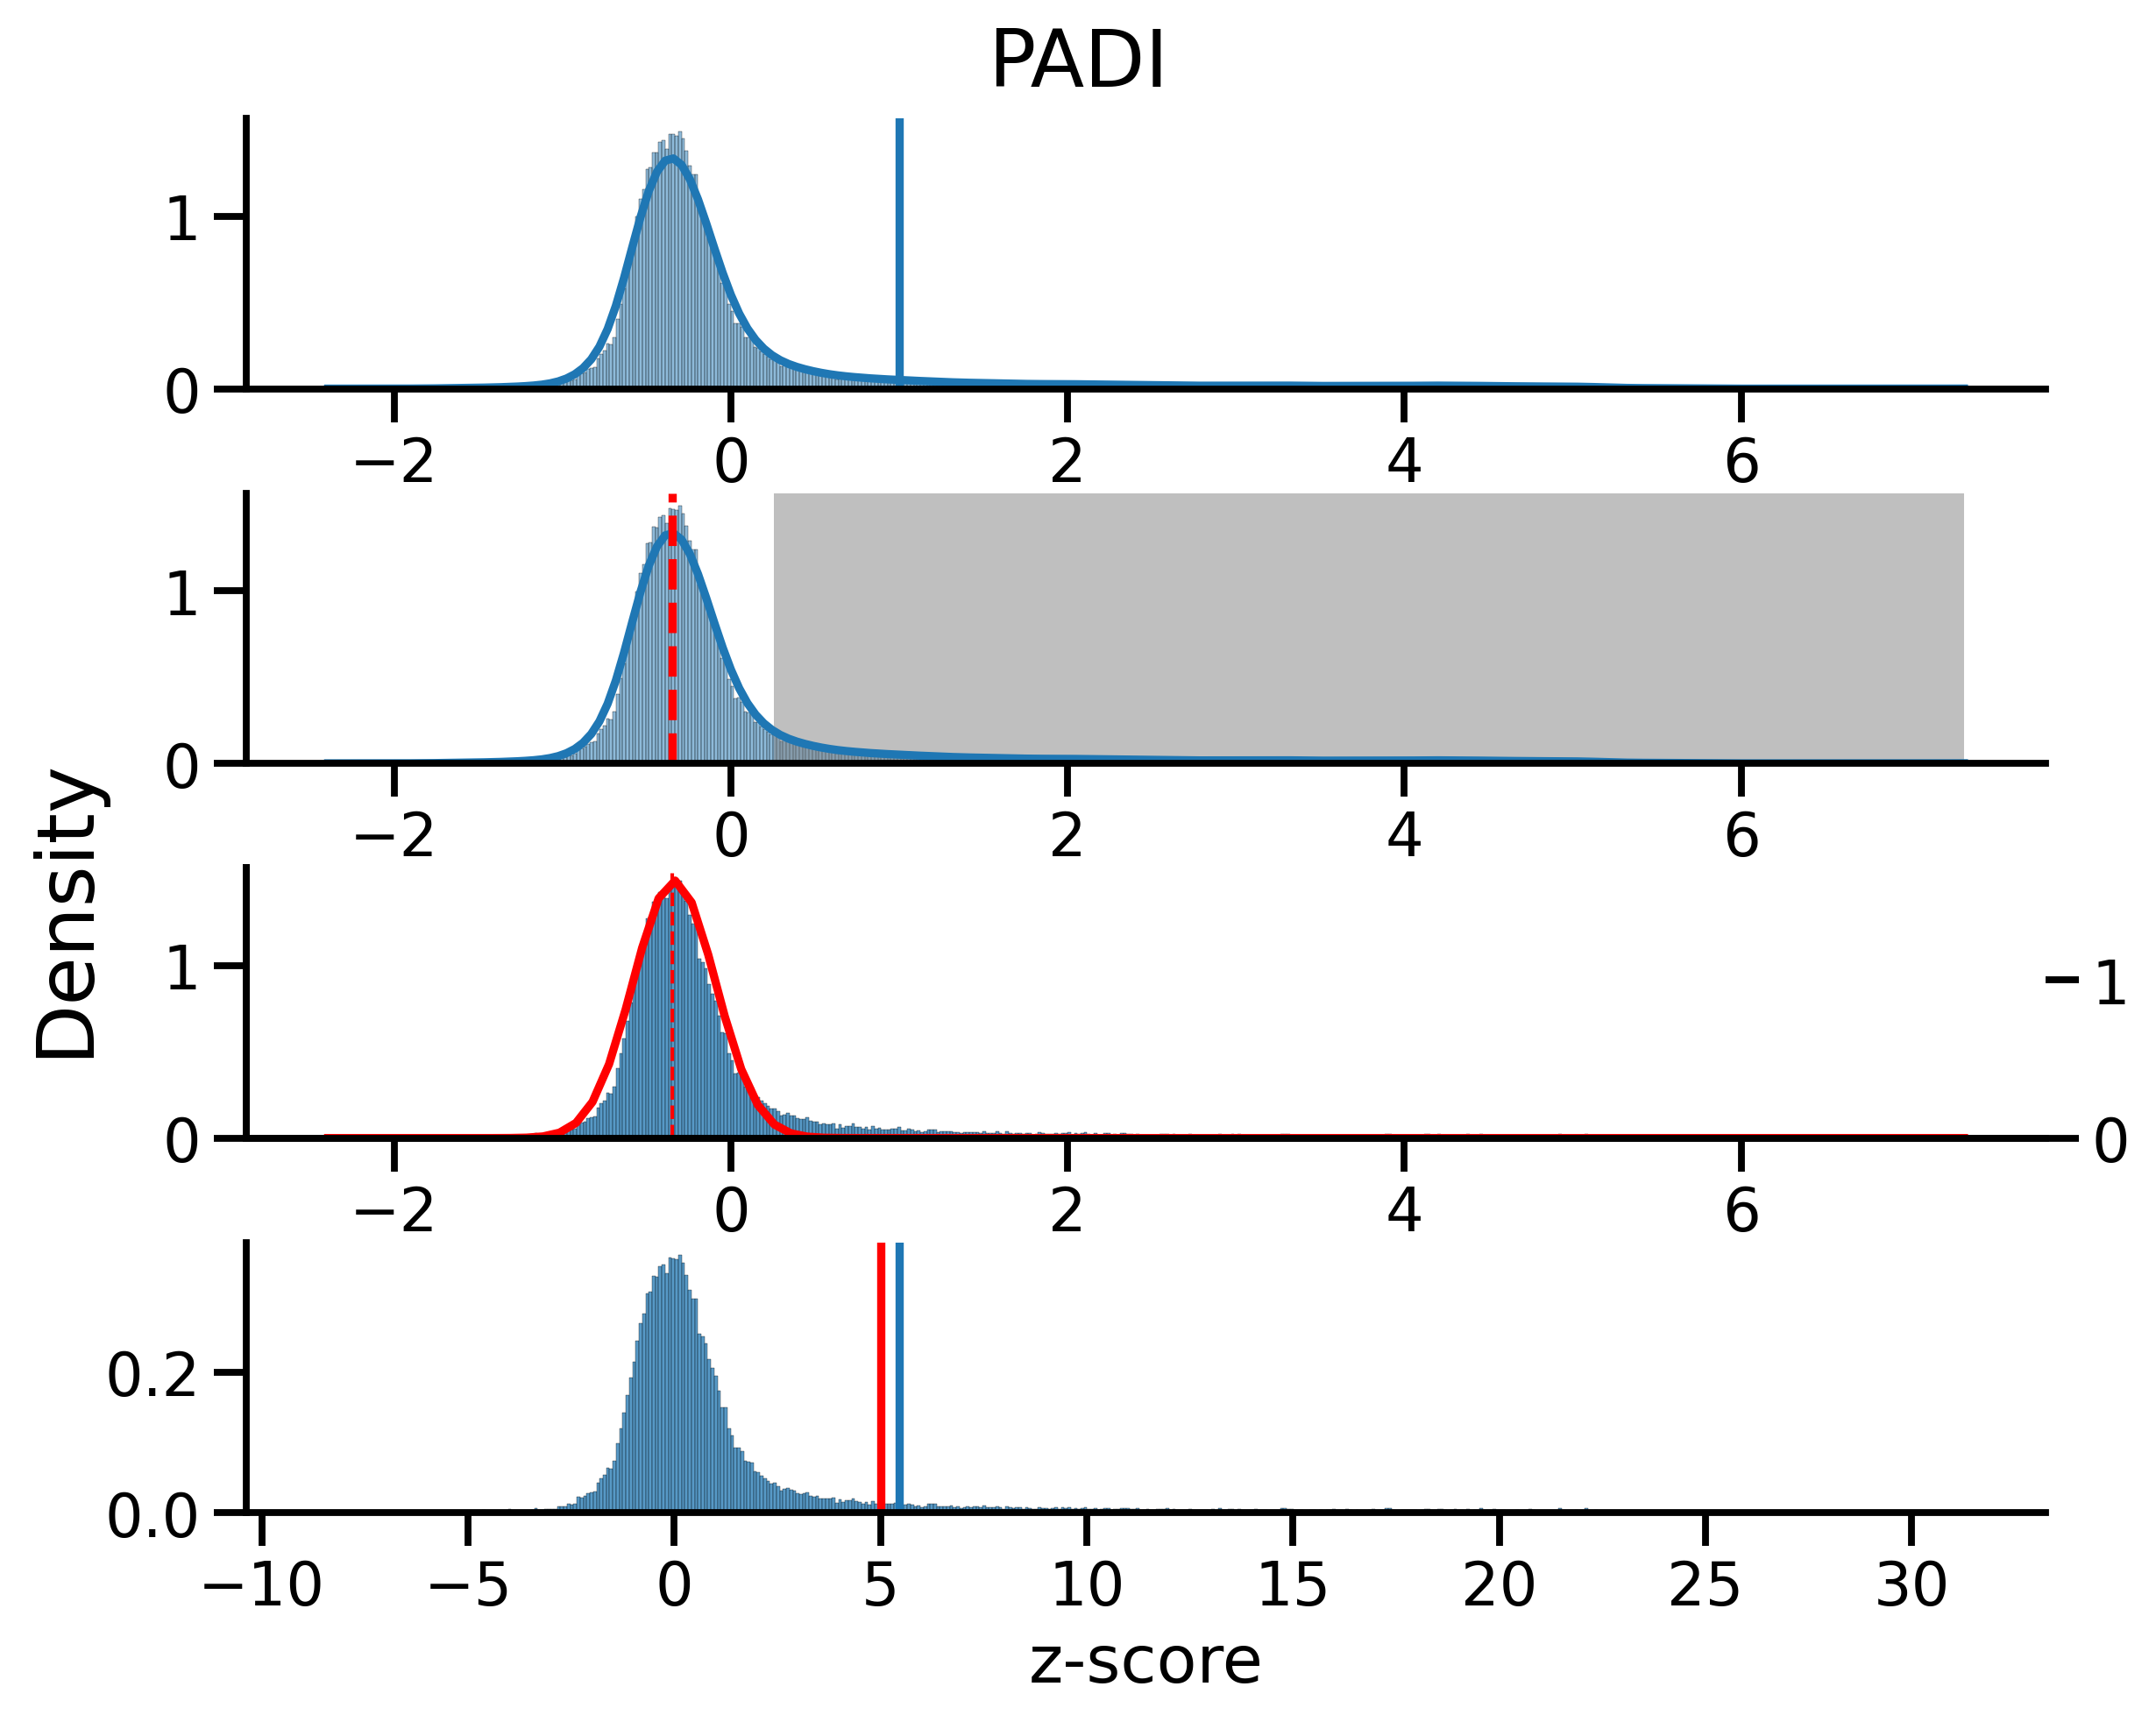

In [19]:
padi, padi_threshold = fit_inactive_gaussian_to_all_data(padi, 1, title = "PADI")
padi


/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_40199/1993253185.py:73: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(x, norm.pdf(x, mu, sigma), 'r-', label=f'Gaussian Fit\nμ={mu:.2f}, σ={sigma:.2f}', color = 'red')


23171.017034940316 7206.431711279177
New threshold:
10.661168528775548


seq         score screen  \
0      MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQA   50849.75654   gcn4   
1      EVYNRIESSTASTALQRQDLRYTFRSNARAASGQANANYQ   22153.46439   gcn4   
2      IESSTASTALQRQDLRYTFRSNARAASGQANANYQAFTAG   25911.89042   gcn4   
3      ASTALQRQDLRYTFRSNARAASGQANANYQAFTAGSALNG   22446.77365   gcn4   
4      QRQDLRYTFRSNARAASGQANANYQAFTAGSALNGPSLPA   51501.39821   gcn4   
...                                         ...           ...    ...   
20726  AKVDTEEEDKTMVDSTSLSWEDLFDFESYSTDLIASINPD  261829.75160   gcn4   
20727  STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR  261410.70530   gcn4   
20728  MTDSTPMFEYELTENNSKEWTSLFDTDIPVTTDDESLADK  152798.87030   gcn4   
20729  STDSTPMFEYQNLENNSKEWTSLFDNDIPVTTDNVSLADK  113197.55830   gcn4   
20730  NTDSTHMFEYWALEDNSKEWTSLFDNDIWVTTDDVSLADK  260621.08880   gcn4   

         z-score  
0       3.840838  
1      -0.141201  
2       0.380337  
3      -0.100500  
4       3.931263  
...          ...  
20726  33.117463  
20727  33.059314  
20728  17.987800  
20729  12.492527  
20730  32.949743  

[18944 rows x 4 columns]

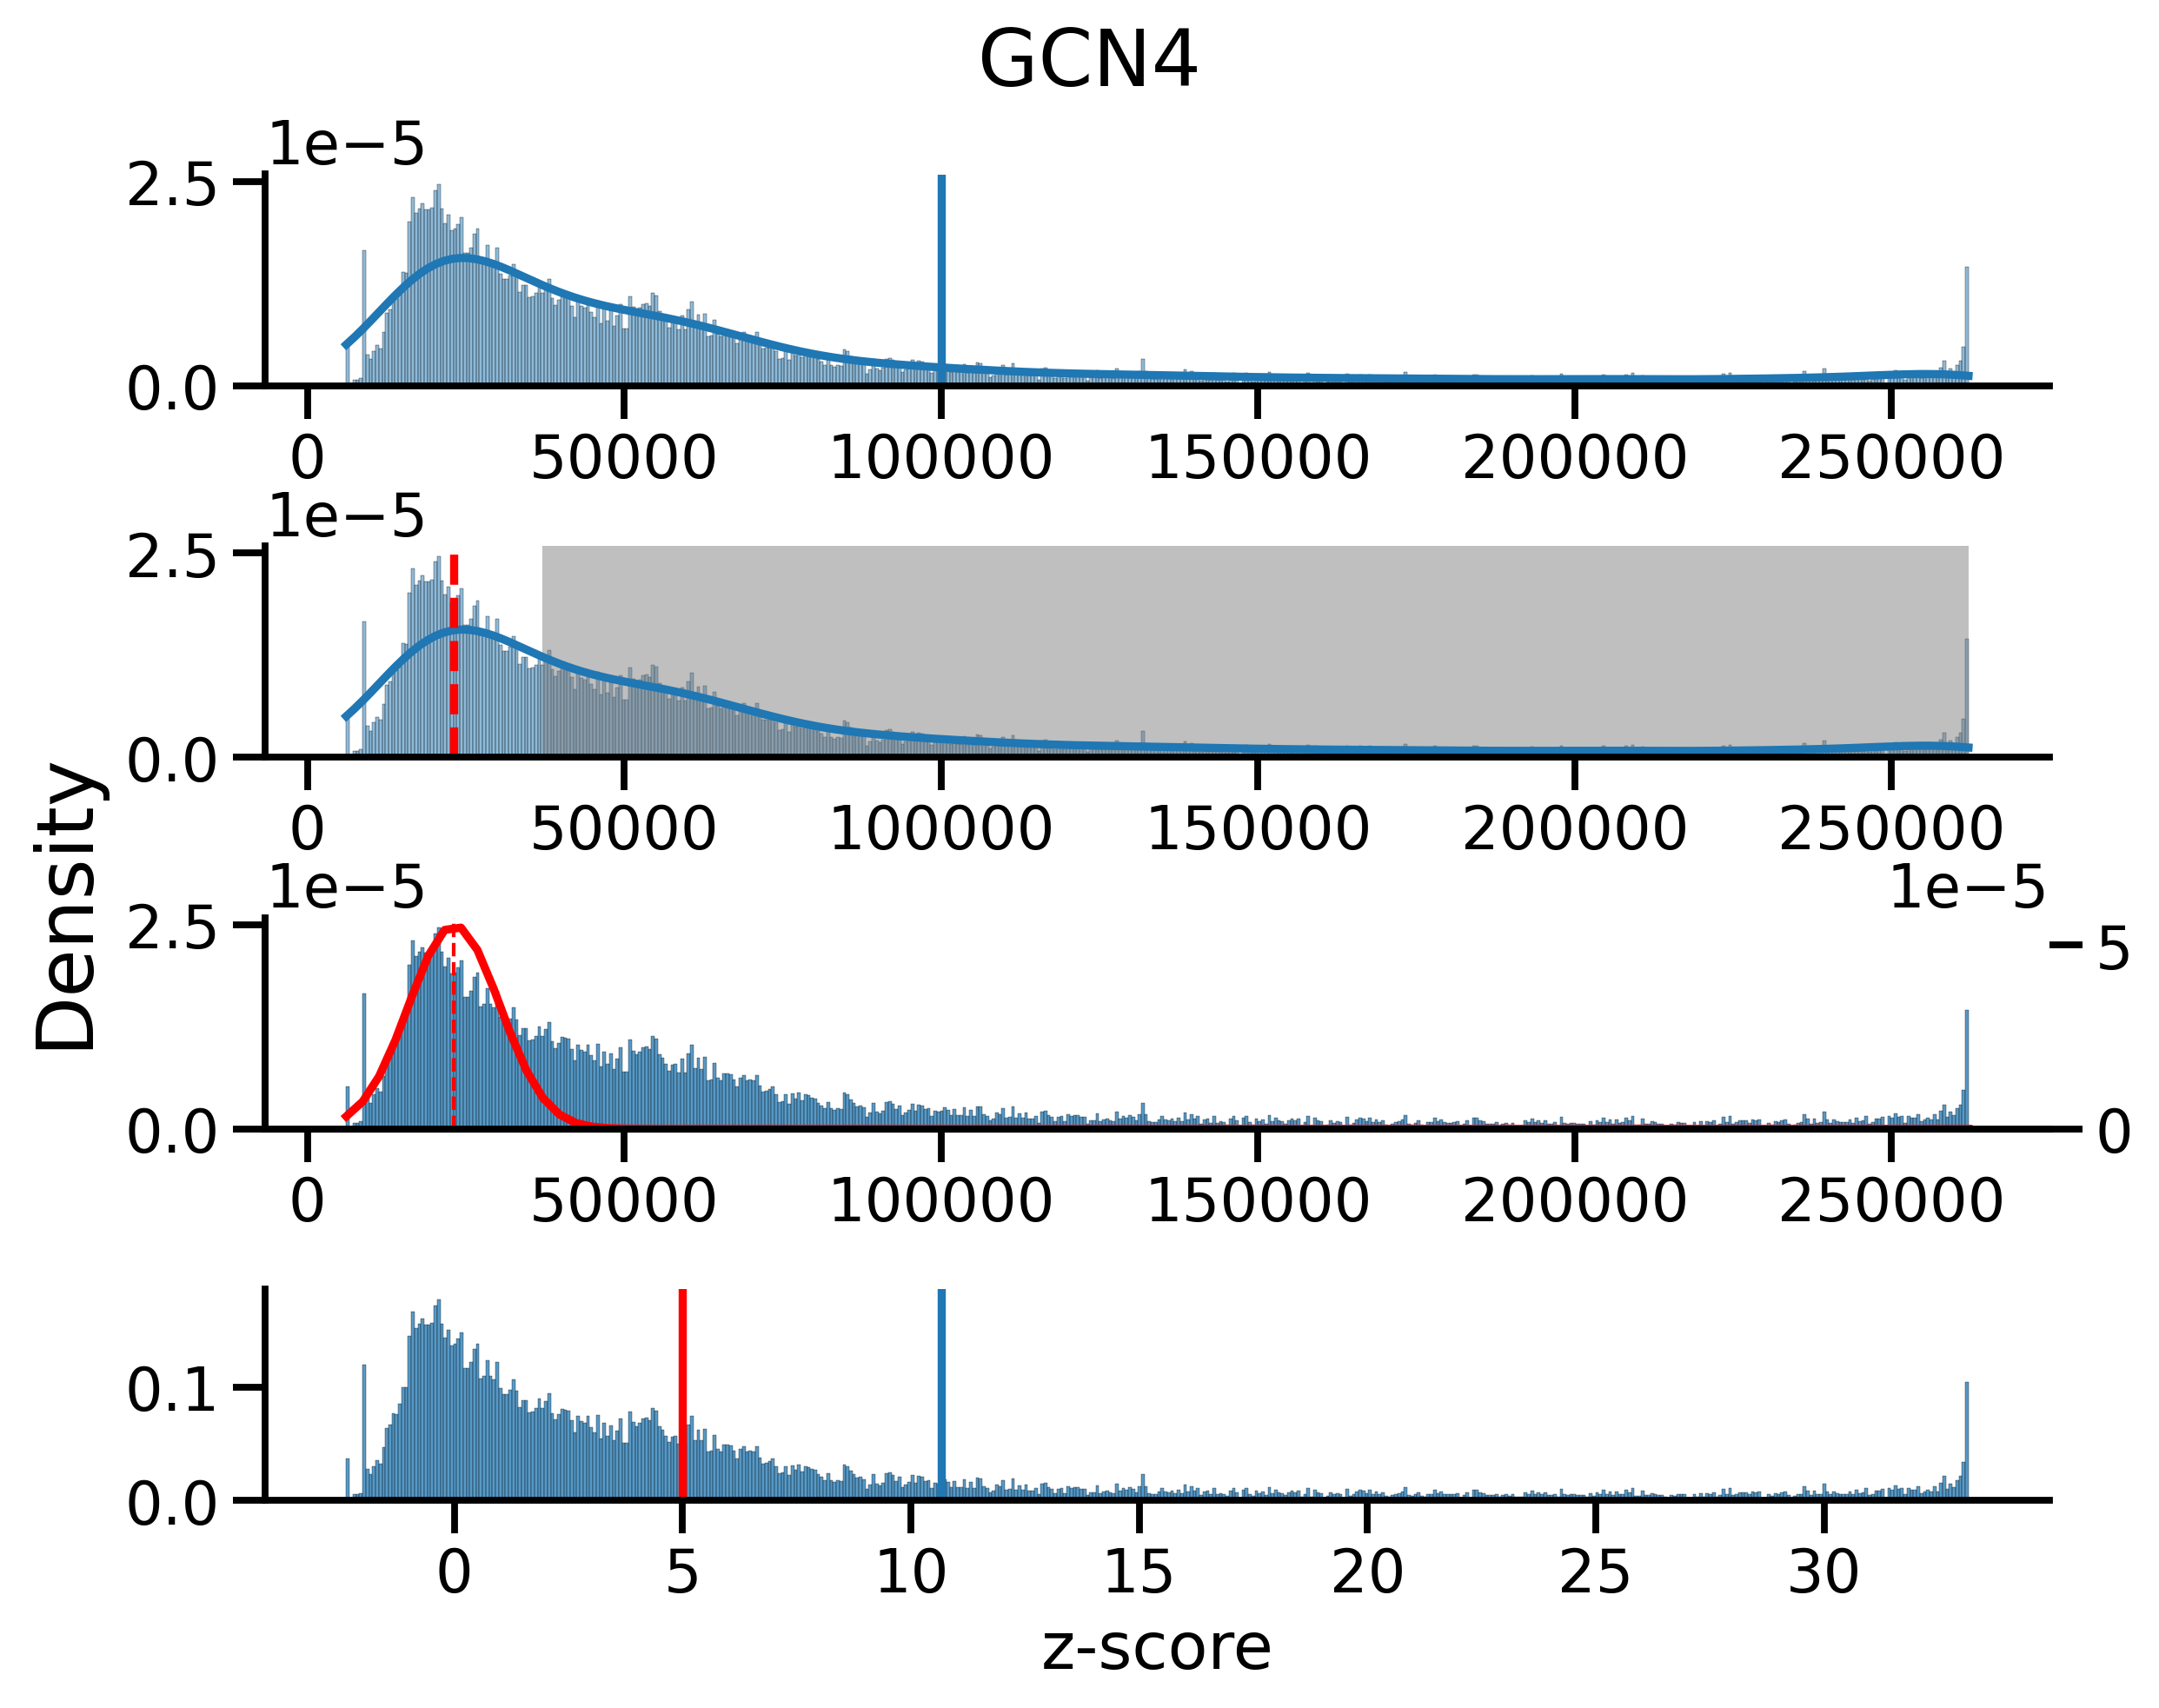

In [20]:
gcn4, gcn4_threshold = fit_inactive_gaussian_to_all_data(gcn4, 100000, title = "GCN4", supylabel_x = -0.01)
gcn4


/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_40199/1993253185.py:73: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(x, norm.pdf(x, mu, sigma), 'r-', label=f'Gaussian Fit\nμ={mu:.2f}, σ={sigma:.2f}', color = 'red')


24480.083230596727 12261.72269785474
New threshold:
-0.403702102271712


(                                            seq          score        screen  \
 0      AAAAAIACELRTDNYFEYPDLSILDALDNDSDETMSLIDE   25075.335066  controls_syn   
 1      AAAAASDHSDVNDIIELGGLSNRLYDFYSDLEDIENDIAV   42429.450978  controls_syn   
 2      AAADGASFSDDTDEDLYKYDPWDLPGLSVIKTDDPEWFFF  167550.966119  controls_syn   
 3      AAADGASFSDDTDEDLYKYDPWELPSKASFGEQEWYFFSP  109426.029848  controls_syn   
 4      AAADGPDCDTREFCELRDSLLWNESCFLLDDDKRFDVSEN   56143.316707  controls_syn   
 ...                                         ...            ...           ...   
 17265  YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS  254716.006477  controls_syn   
 17266  YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE  237618.847801  controls_syn   
 17267  YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS   46055.201492  controls_syn   
 17268  YYSEQSCYLNFPPLDMFPALPSDLSGWVESMLSELNNPAS  141711.824042  controls_syn   
 17269  YYSSLGVEPWDLDGLFEFSRLLVDLNMDGFKIDWDYEVAE  139134.166354  controls_syn   
 
          z-score  
 0    

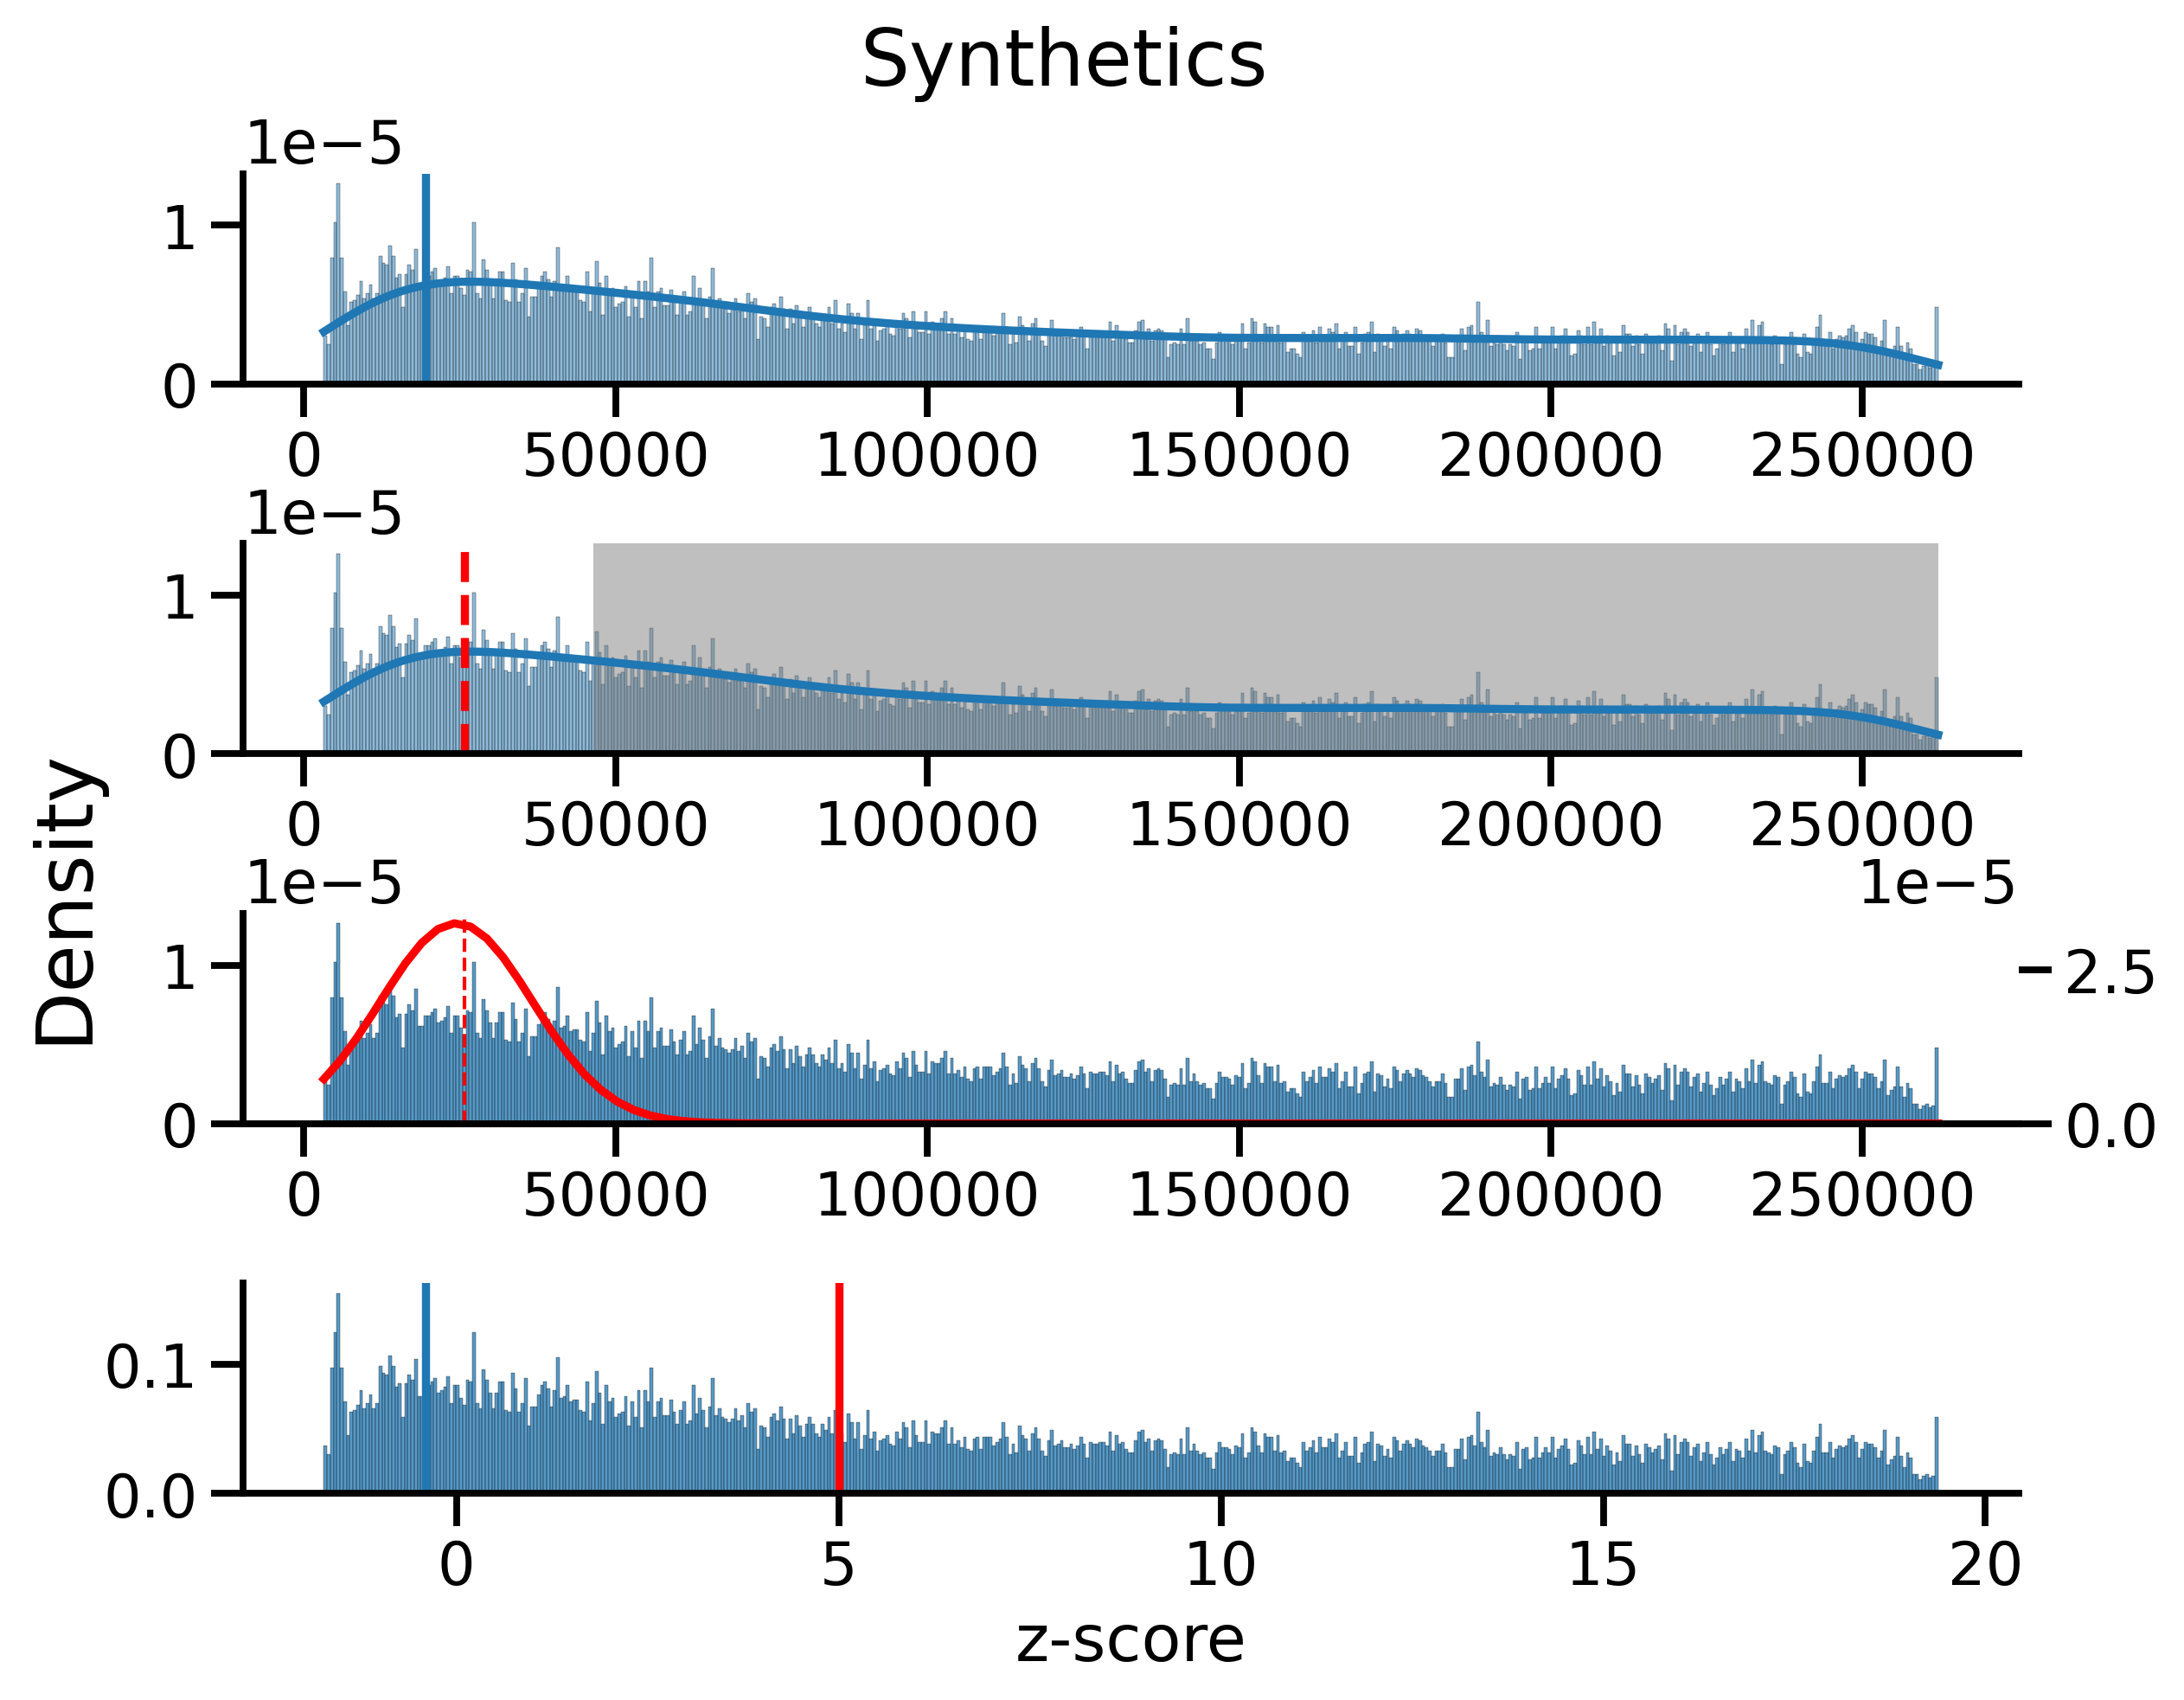

In [21]:
## This approach does not work for synthetics because too many are active
fit_inactive_gaussian_to_all_data(controls_syn, title = "Synthetics", active_threshold = 19530)

NameError: name 'mu' is not defined

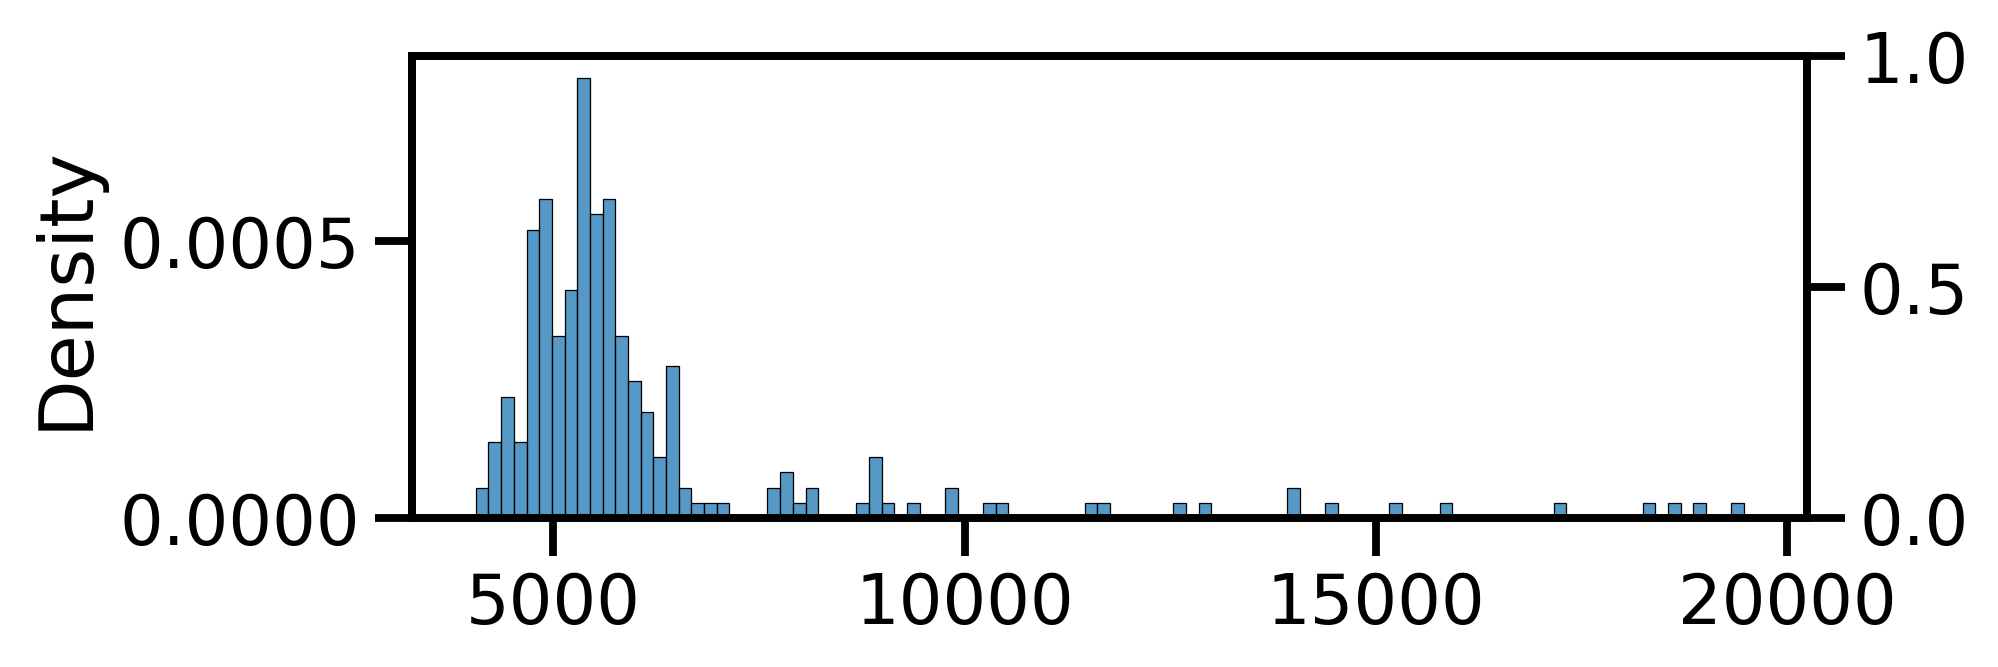

In [22]:
## Getting negative controls gaussian

fig, ax = plt.subplots(1,1, dpi = 300, figsize = (6, 2))

scores = np.array(negative_controls["score_controls"])

# # # Plot threshold

# # Fit a gaussian to the inactive scores
controls_syn_mu, controls_syn_sigma = norm.fit(scores)

# # Plot the histogram and fitted Gaussian
sns.histplot(scores, stat = 'density', bins = 100, ax=ax)
x = np.linspace(min(scores), max(scores), 100)
ax2 = ax.twinx()  # Update to use ax
ax2.plot(x, norm.pdf(x, controls_syn_mu, controls_syn_sigma), 'r-', label=f'Gaussian Fit\nμ={mu:.2f}, σ={sigma:.2f}', color = 'red')
ax2.set_ylim(0, None)
sns.despine()

# df["z-score"] = (df["score"] - mu) / sigma

# sns.histplot(df["z-score"], bins = 100, ax = axs[2])

plt.title("Negative Controls Sorted with Synthetics")

6236.6103793080165 2615.995228757202
New threshold:
5.081580224061556


/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_40199/1993253185.py:73: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(x, norm.pdf(x, mu, sigma), 'r-', label=f'Gaussian Fit\nμ={mu:.2f}, σ={sigma:.2f}', color = 'red')


seq          score        screen  \
0      AAAAAIACELRTDNYFEYPDLSILDALDNDSDETMSLIDE   25075.335066  controls_syn   
1      AAAAASDHSDVNDIIELGGLSNRLYDFYSDLEDIENDIAV   42429.450978  controls_syn   
2      AAADGASFSDDTDEDLYKYDPWDLPGLSVIKTDDPEWFFF  167550.966119  controls_syn   
3      AAADGASFSDDTDEDLYKYDPWELPSKASFGEQEWYFFSP  109426.029848  controls_syn   
4      AAADGPDCDTREFCELRDSLLWNESCFLLDDDKRFDVSEN   56143.316707  controls_syn   
...                                         ...            ...           ...   
17265  YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS  254716.006477  controls_syn   
17266  YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE  237618.847801  controls_syn   
17267  YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS   46055.201492  controls_syn   
17268  YYSEQSCYLNFPPLDMFPALPSDLSGWVESMLSELNNPAS  141711.824042  controls_syn   
17269  YYSSLGVEPWDLDGLFEFSRLLVDLNMDGFKIDWDYEVAE  139134.166354  controls_syn   

         z-score  
0       7.201360  
1      13.835209  
2      61.664622  
3      39.445569  
4      19.077522  
...          ...  
17265  94.984652  
17266  88.449029  
17267  15.221202  
17268  51.787256  
17269  50.801911  

[17270 rows x 4 columns]

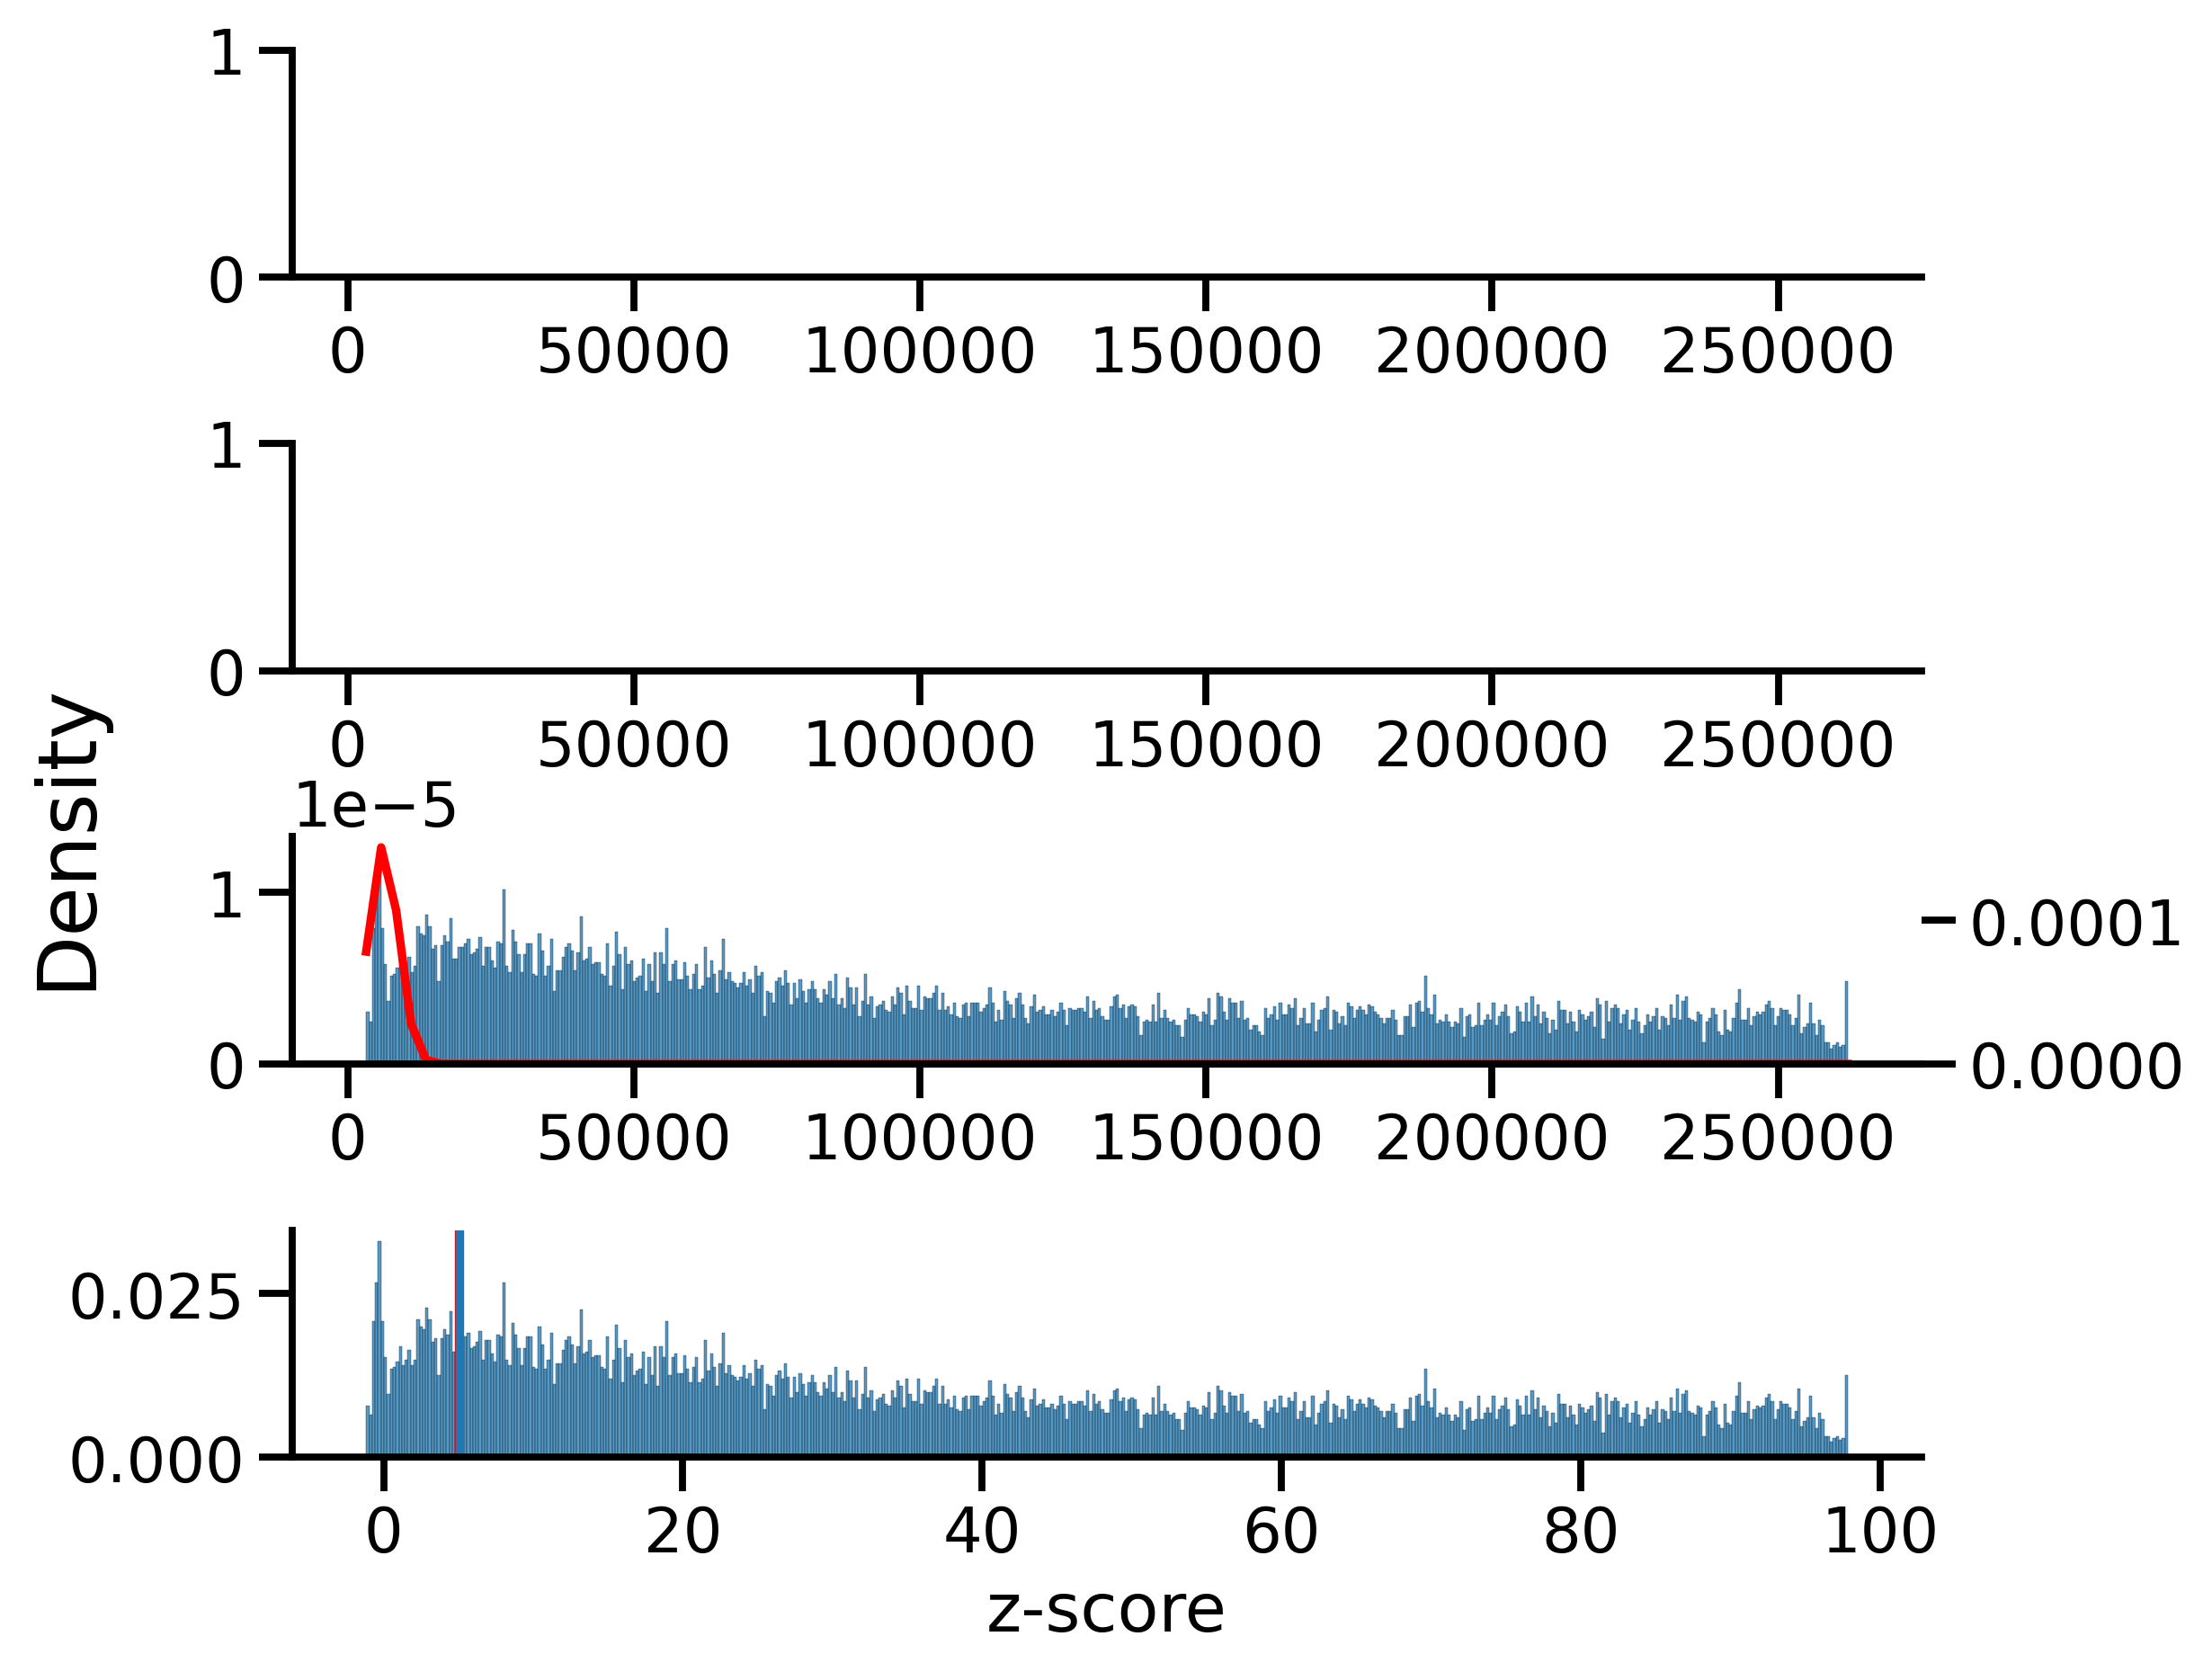

In [23]:
controls_syn, controls_syn_threshold = fit_inactive_gaussian_to_all_data(controls_syn, mu = controls_syn_mu, sigma = controls_syn_sigma, active_threshold= 19530)
controls_syn

In [24]:
palette = sns.color_palette('colorblind', 3)


Text(0.5, 1.02, '40-mer Ratio Screens')

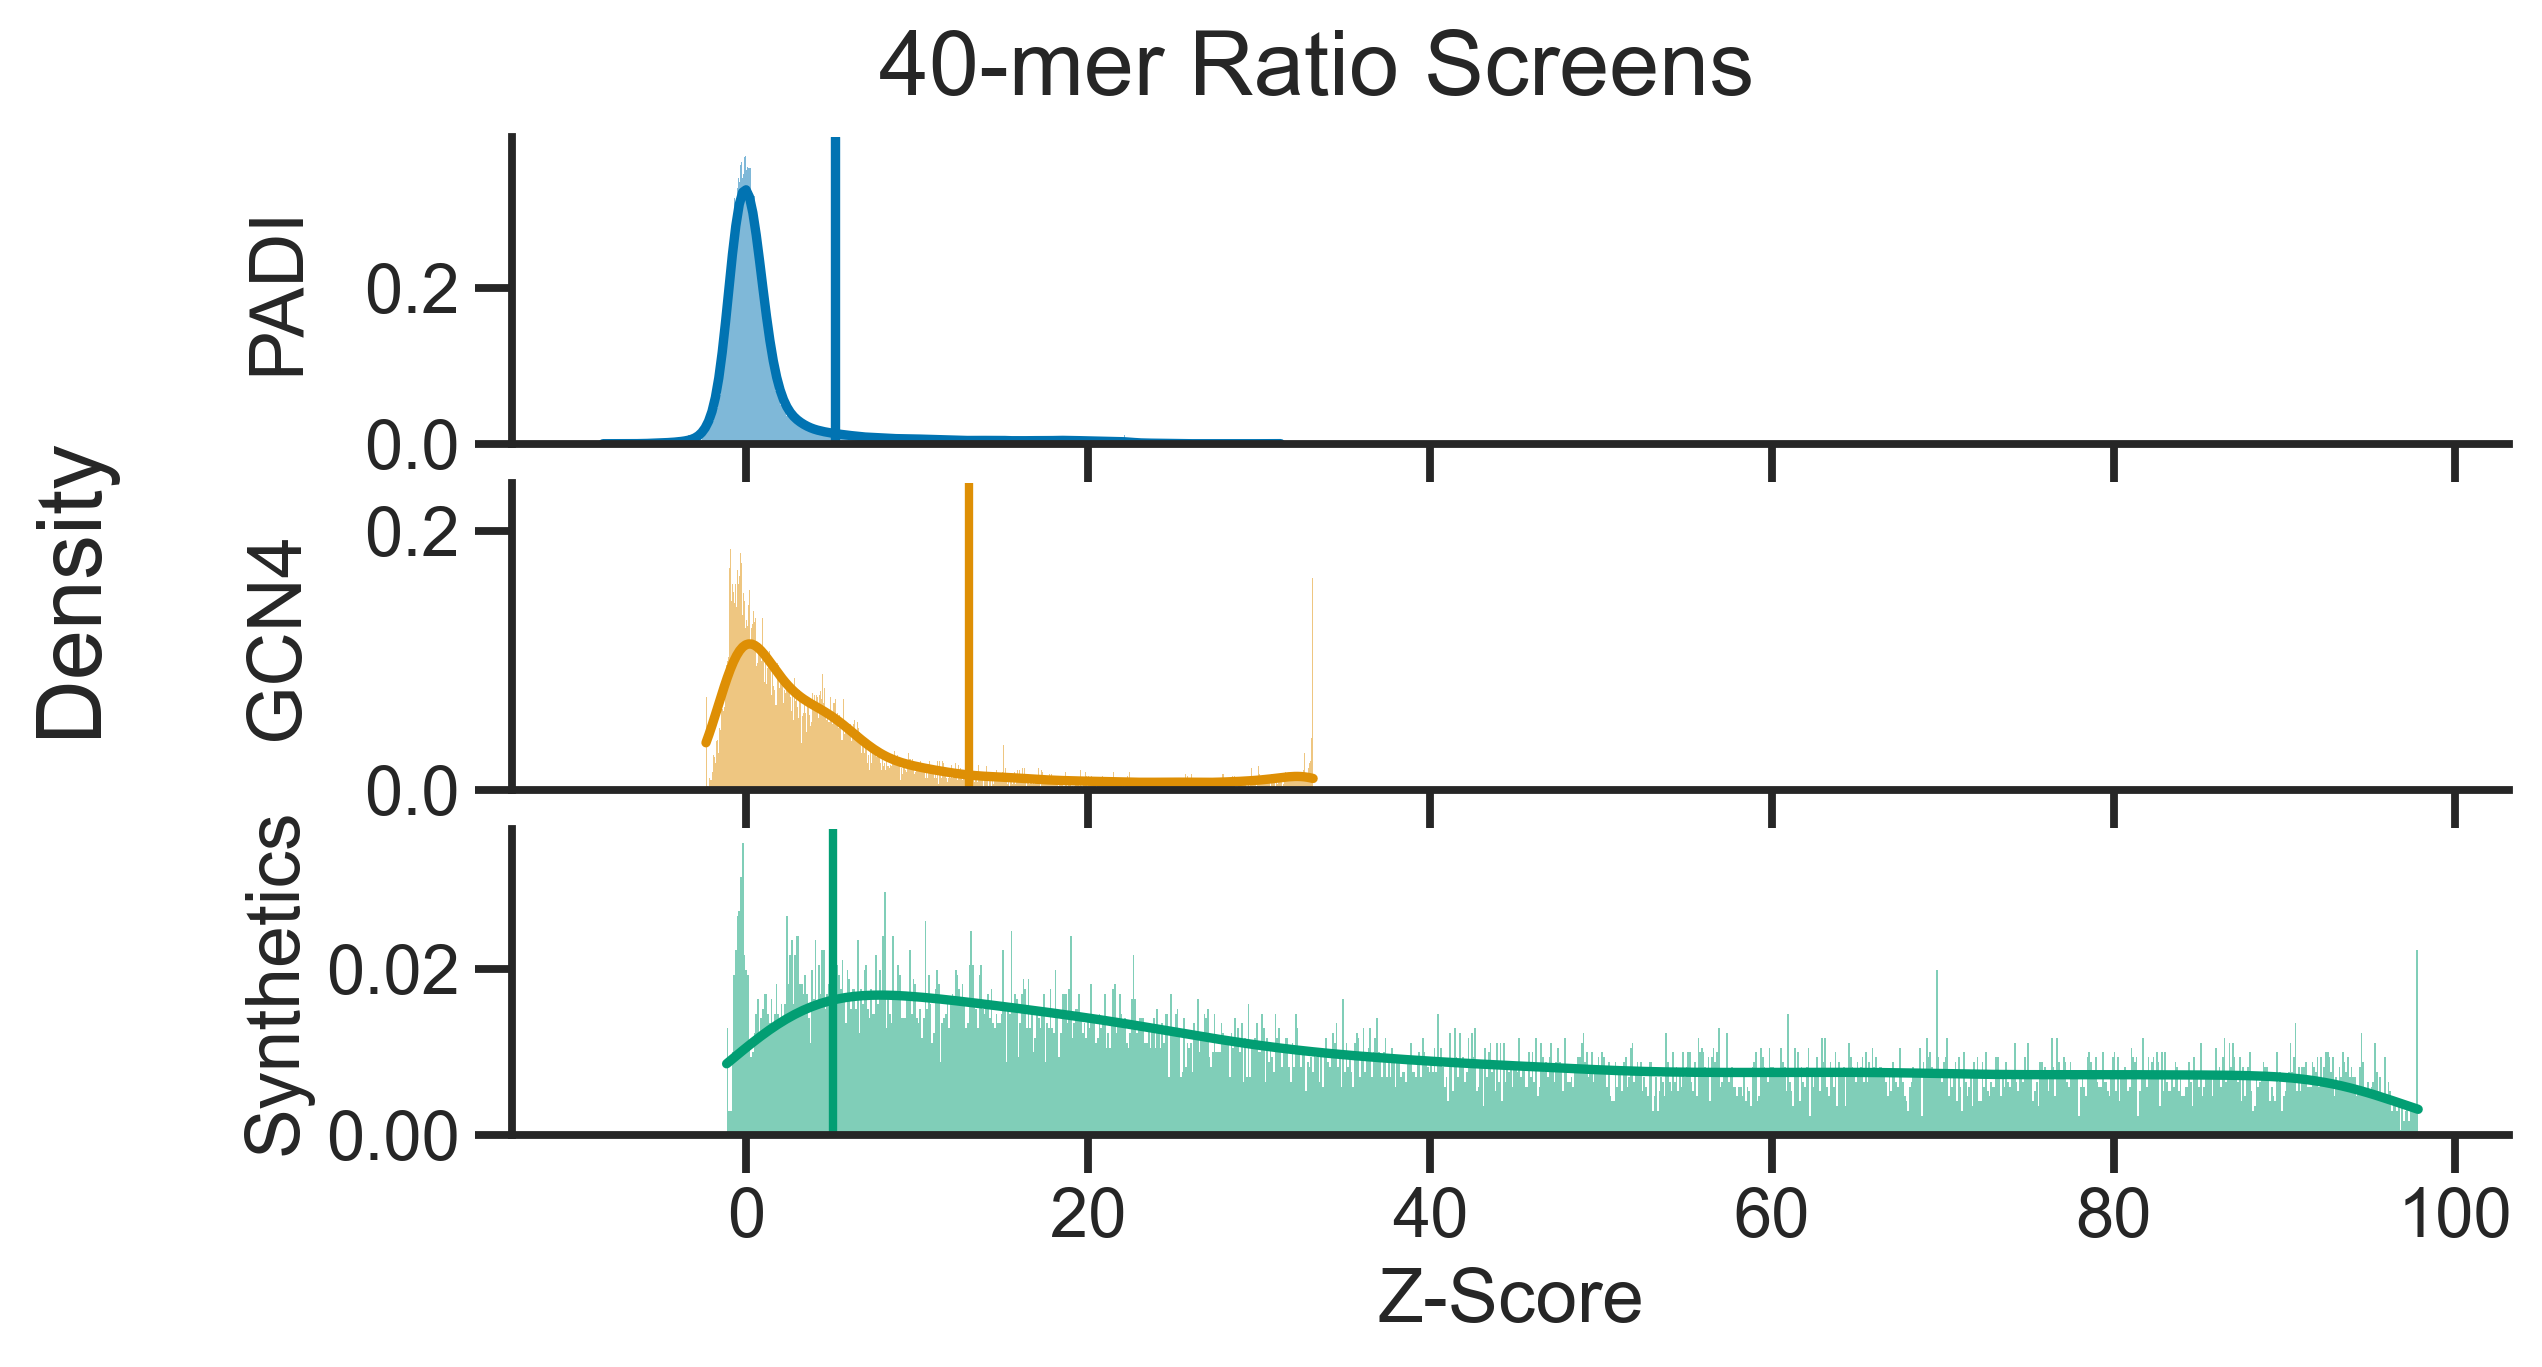

In [25]:
sns.set_context('talk')
sns.set_style('ticks')

fig, axs = plt.subplots(3, 1, sharex = True, figsize = (8, 4), dpi = 300)
sns.histplot(padi["z-score"], ax = axs[0], stat = 'density', bins = 1000, edgecolor = 'none', kde = True, color = palette[0])
sns.histplot(gcn4["z-score"], ax = axs[1], stat = 'density', bins = 1000, edgecolor = 'none', kde = True, color = palette[1])
sns.histplot(controls_syn["z-score"], ax = axs[2], stat = 'density', bins = 1000, edgecolor = 'none', kde = True, color = palette[2])

axs[0].set_ylabel("PADI")
axs[0].axvline(5.185140745551774, color = palette[0])

axs[1].set_ylabel("GCN4")
axs[1].axvline(13.002061450937955, color = palette[1], lw = 2)

axs[2].set_ylabel("Synthetics")
axs[2].axvline(5.081580224061556, color = palette[2], lw = 2)

fig.supylabel("Density", ha = 'right', va = 'bottom', x = -0.001)

sns.despine()
fig.tight_layout(pad = 0)

for ax in axs:
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.set_xlabel("")

axs[2].set_xlabel("Z-Score")
fig.suptitle("40-mer Ratio Screens", va = 'bottom', y = 1.02)

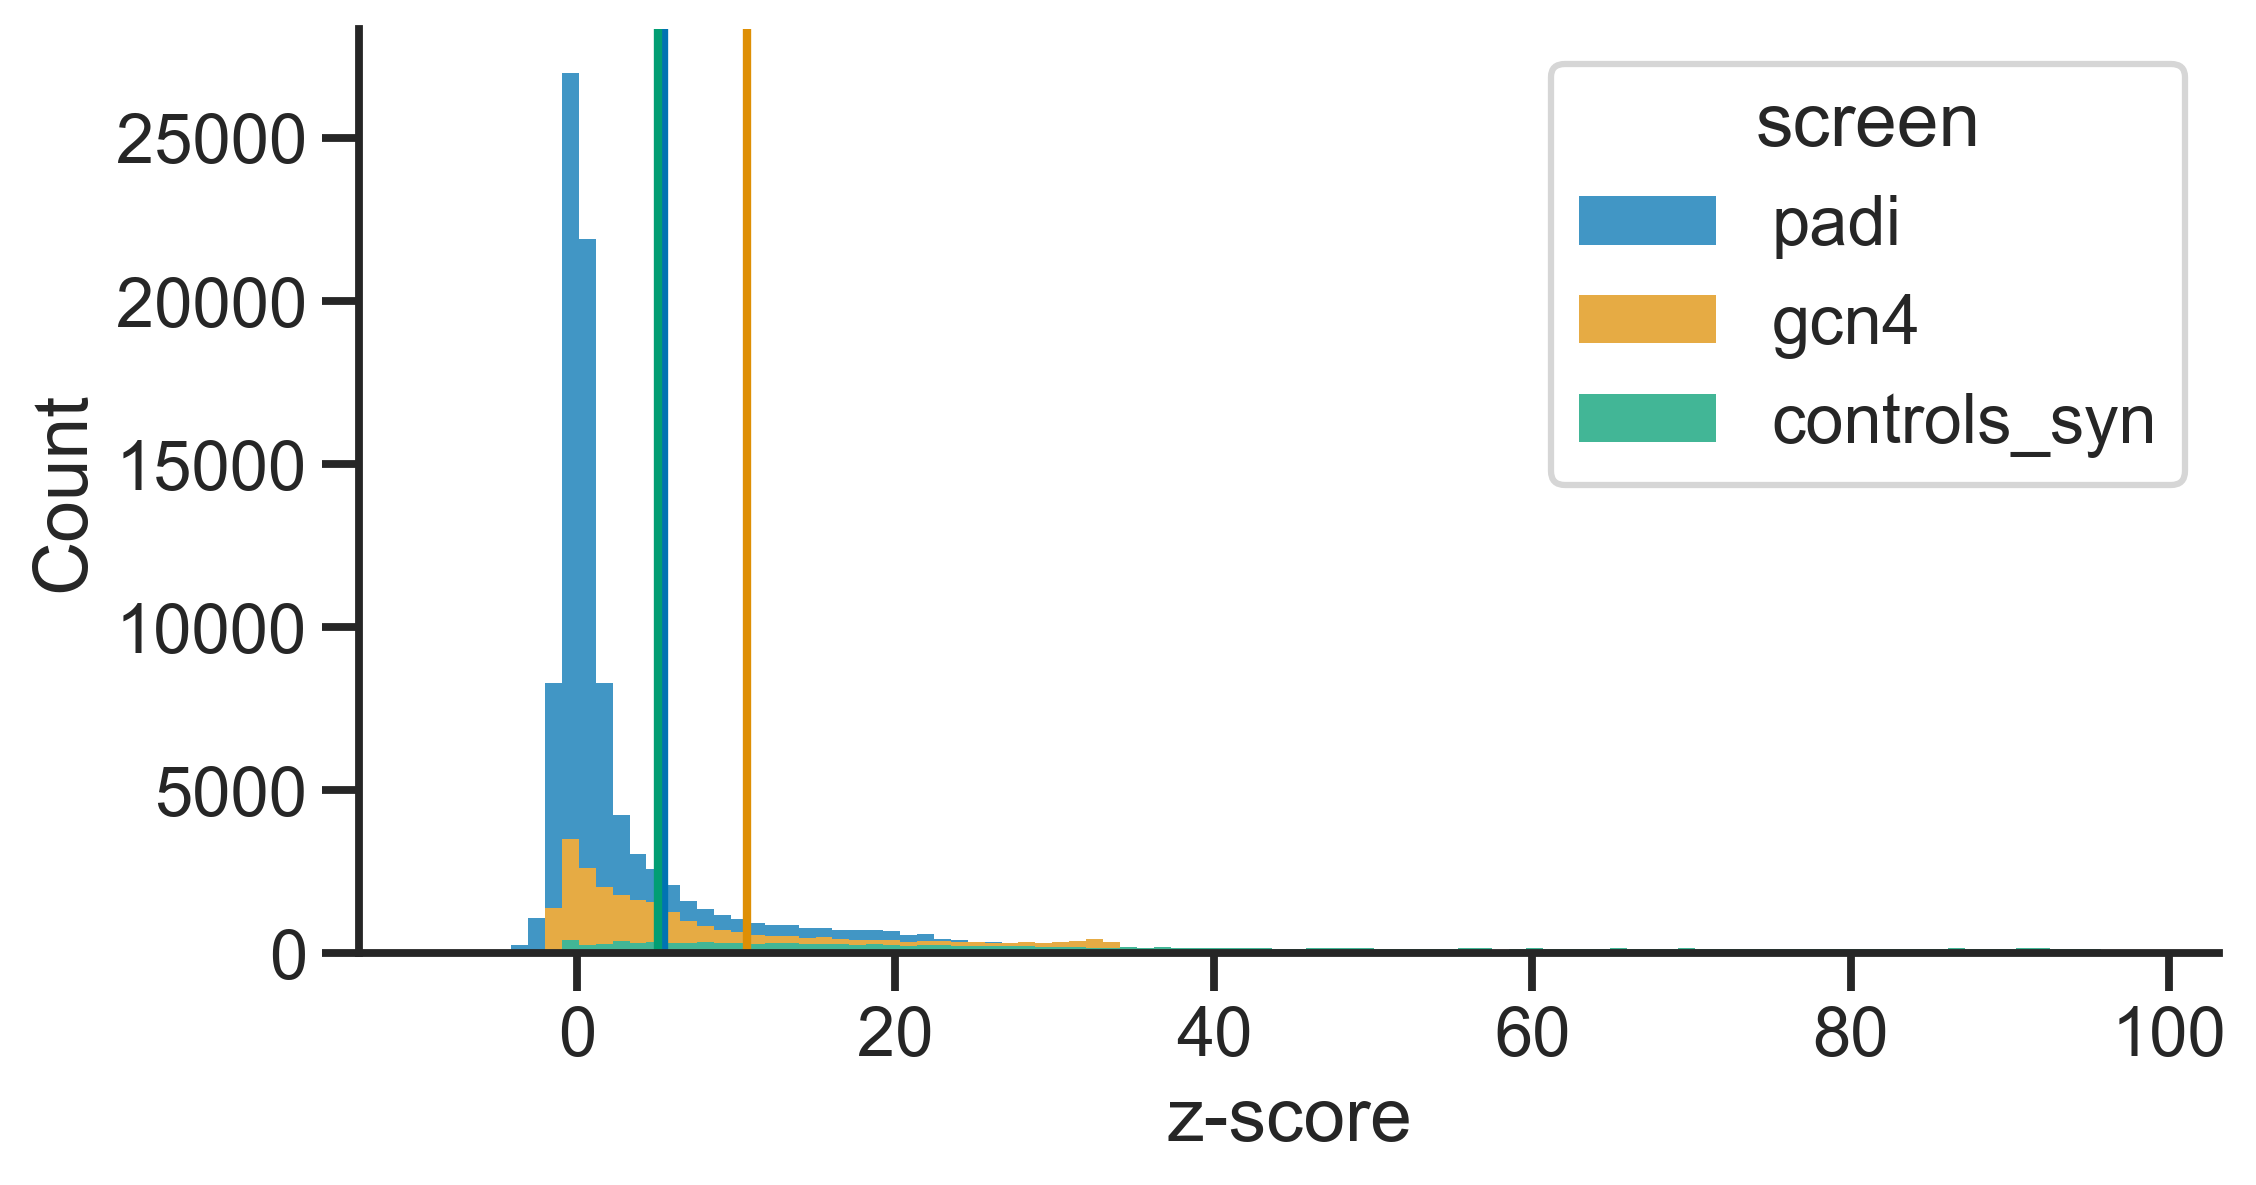

In [26]:
combined = pd.concat([padi, gcn4, controls_syn])
plt.figure(dpi = 300, figsize = (8, 4))
sns.histplot(data = combined, x = "z-score", hue = "screen", multiple='stack', bins = 100, palette = palette, edgecolor = 'none')
plt.axvline(padi_threshold, color = palette[0], lw = 2)
plt.axvline(gcn4_threshold, color = palette[1], lw = 2)
plt.axvline(controls_syn_threshold, color = palette[2], lw = 2)
sns.despine()

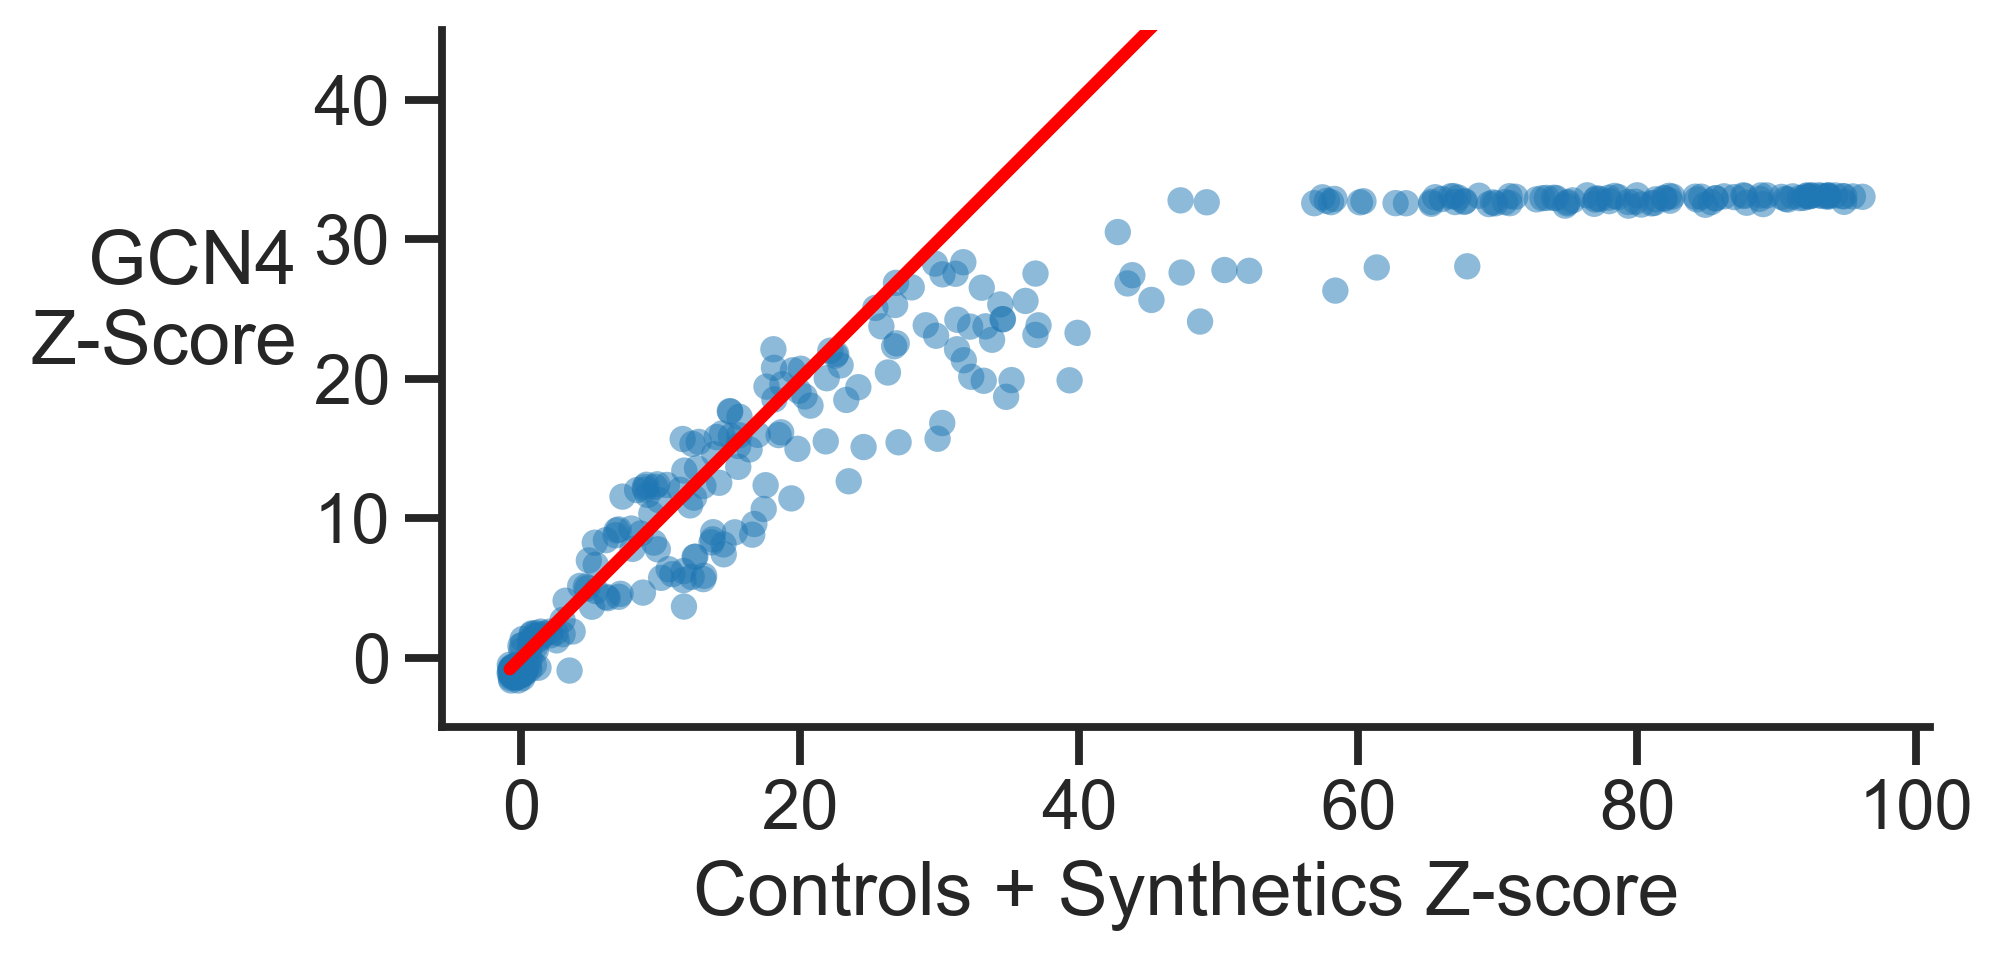

In [27]:
gcn4_controls_syn = pd.merge(gcn4, controls_syn, on = "seq")
plt.figure(dpi = 300)
sns.scatterplot(data = gcn4_controls_syn, x = "z-score_y", y = "z-score_x", edgecolor = 'none', alpha = 0.5, s = 40)
plt.plot([gcn4_controls_syn["z-score_y"].min(), gcn4_controls_syn["z-score_y"].max()], 
         [gcn4_controls_syn["z-score_y"].min(), gcn4_controls_syn["z-score_y"].max()], 
         color='red', linestyle='solid', lw = 3)
sns.despine()
plt.ylim(-5, 45)
plt.xlabel("Controls + Synthetics Z-score")
plt.ylabel("GCN4\nZ-Score", rotation = 0, ha = 'right')
plt.gca().set_aspect('equal')
#plt.legend()

In [ ]:
# FOR Those with multiple tiles: if measured in both gcn4 and controls_syn, keep one measured in controls_syn
combined_duplic_removed = combined.sort_values(by = "screen").drop_duplicates(subset="seq", keep="first")
combined_duplic_removed

seq          score        screen  \
17269  YYSSLGVEPWDLDGLFEFSRLLVDLNMDGFKIDWDYEVAE  139134.166354  controls_syn   
5763   HLEDCSGENDLFHMSAAFSWDSQFDGATNWSLEPGNELSS  141914.090200  controls_syn   
5762   HLDVDLFADVEIDDPPQIDFDEVLSLVDDGQNPSSCVESF  234910.365351  controls_syn   
5761   HLDSSNSFDAAASGDSDDDYLFDTSVLRFSNDDDGDLYLK   25644.408028  controls_syn   
5760   HLDFPDMFDDALDLDAYDLGSLLSDIDSPMDFKDDMPTNY  171371.783296  controls_syn   
...                                         ...            ...           ...   
35599  PLQPLTYLHNQNLCSPPVIQNQIDPFMDHRLYGGGNFQEQ       0.075656          padi   
35598  NFPIDCSPSSPLQPLTYLHNQNLCSPPVIQNQIDPFMDHR       0.004634          padi   
35597  RNLRGPKAKTNFPIDCSPSSPLQPLTYLHNQNLCSPPVIQ      -0.131899          padi   
35607  HAIKRYPRTPPVAPEDCHSDCDSSSSVIDDGDDIASSSSR      -0.548758          padi   
53155  PGFRFHPTDEELVRYYLKRKVCNKPFKFDAISVTDIYKSE      -0.554917          padi   

         z-score  
17269  50.801911  
5763   51.864575  
5762   87.413674  
5761    7.418896  
5760   63.125181  
...          ...  
35599   1.680619  
35598   1.390733  
35597   0.833455  
35607  -0.868016  
53155  -0.893153  

[104190 rows x 4 columns]

In [ ]:
combined_duplic_removed["charge"] = combined_duplic_removed["seq"].str.count("R") + combined_duplic_removed["seq"].str.count("K") - combined_duplic_removed["seq"].str.count("D") - combined_duplic_removed["seq"].str.count("#")
combined_duplic_removed

seq          score        screen  \
17269  YYSSLGVEPWDLDGLFEFSRLLVDLNMDGFKIDWDYEVAE  139134.166354  controls_syn   
5763   HLEDCSGENDLFHMSAAFSWDSQFDGATNWSLEPGNELSS  141914.090200  controls_syn   
5762   HLDVDLFADVEIDDPPQIDFDEVLSLVDDGQNPSSCVESF  234910.365351  controls_syn   
5761   HLDSSNSFDAAASGDSDDDYLFDTSVLRFSNDDDGDLYLK   25644.408028  controls_syn   
5760   HLDFPDMFDDALDLDAYDLGSLLSDIDSPMDFKDDMPTNY  171371.783296  controls_syn   
...                                         ...            ...           ...   
35599  PLQPLTYLHNQNLCSPPVIQNQIDPFMDHRLYGGGNFQEQ       0.075656          padi   
35598  NFPIDCSPSSPLQPLTYLHNQNLCSPPVIQNQIDPFMDHR       0.004634          padi   
35597  RNLRGPKAKTNFPIDCSPSSPLQPLTYLHNQNLCSPPVIQ      -0.131899          padi   
35607  HAIKRYPRTPPVAPEDCHSDCDSSSSVIDDGDDIASSSSR      -0.548758          padi   
53155  PGFRFHPTDEELVRYYLKRKVCNKPFKFDAISVTDIYKSE      -0.554917          padi   

         z-score  charge  
17269  50.801911      -4  
5763   51.864575      -4  
5762   87.413674      -9  
5761    7.418896      -9  
5760   63.125181     -11  
...          ...     ...  
35599   1.680619      -1  
35598   1.390733      -2  
35597   0.833455       3  
35607  -0.868016      -3  
53155  -0.893153       5  

[104190 rows x 5 columns]

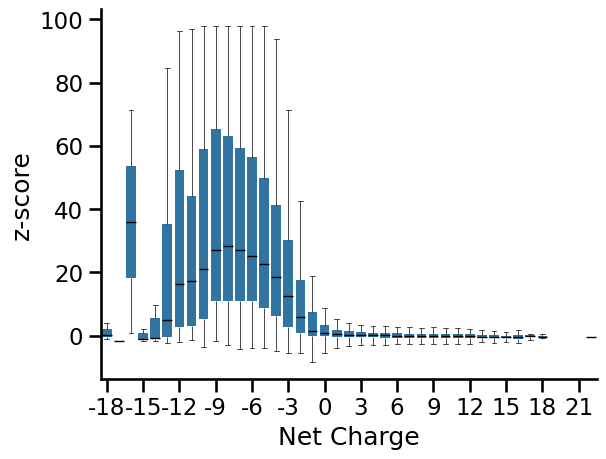

In [ ]:
order = np.arange(min(combined_duplic_removed["charge"]), max(combined_duplic_removed["charge"]) + 1)
ax = sns.boxplot(x= "charge",y="z-score",data=combined_duplic_removed,
        fliersize = 0.1, 
        order = order, 
        boxprops = {'edgecolor': "none"},
        flierprops = {'alpha' : 1, 'color' : "black", 'lw' : 0, 'markeredgewidth': 0},
        whiskerprops={'color': 'black', 'lw' : 0.5},  # whiskers set to black
        capprops={'color': 'black', 'lw' : 0.5},      # caps set to black
        medianprops={'color': 'black', 'lw' : 1})   # median line set to black) 
xticks = ax.get_xticks()
ax.set_xticks(xticks[::len(xticks) // 12])  
ax.set_xlabel("Net Charge")
sns.despine()

# 53-mer libraries

In [ ]:
# Venn diagram of overlapping sequences

In [ ]:
sanborn_sheets = pd.read_excel("../data/elife-68068-fig1-data1-v3.xlsx", sheet_name=None)
sanborn_dfs = {sheet_name: sanborn_sheets[sheet_name] for sheet_name in sanborn_sheets.keys()}

In [ ]:
sanborn_dfs.keys()

dict_keys(['TF sequences, see Fig 1', 'TF tiles, see Fig 1', 'AD mutants, see Fig 2', '53 aa mutants, see Fig 2,4,7', 'cAD muts and 9mers, see Fig 3,4', 'Nuclear proteins, see Fig 7'])

<Axes: xlabel='activation', ylabel='Z score'>

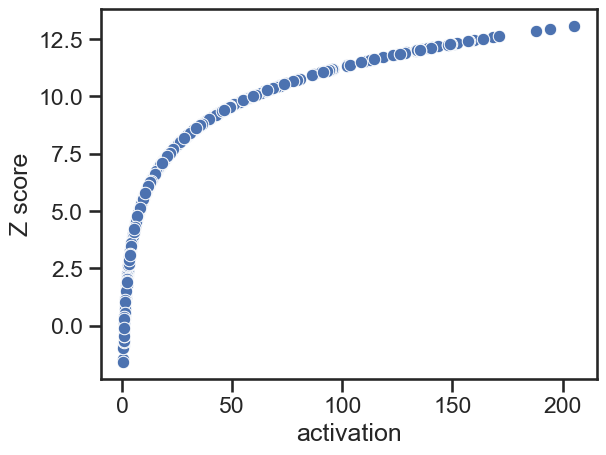

In [ ]:
sns.scatterplot(data = sanborn_dfs['TF tiles, see Fig 1'], y  = "Z score", x = "activation")

<Axes: xlabel='Z score', ylabel='Count'>

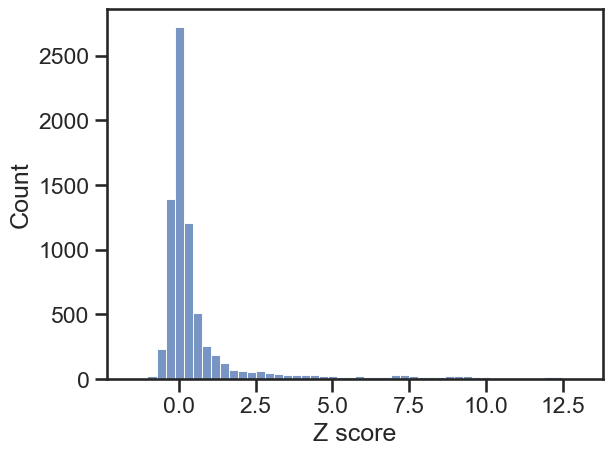

In [ ]:
sns.histplot(sanborn_dfs['TF tiles, see Fig 1']["Z score"], bins = 50)

<Axes: xlabel='activation', ylabel='Count'>

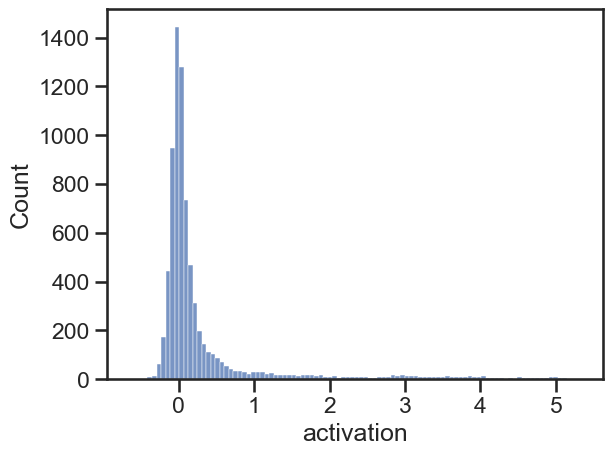

In [ ]:
sns.histplot(np.log(sanborn_dfs['TF tiles, see Fig 1']["activation"]), bins = 100)


In [ ]:
sanborn_TF_tiles = sanborn_dfs['TF tiles, see Fig 1']
sanborn_TF_tiles = sanborn_TF_tiles[["protein sequence", "Z score"]]
sanborn_TF_tiles

protein sequence    Z score
0     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...   9.943363
1     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...   9.921760
2     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...  10.223345
3     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...  10.453645
4     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...   9.840524
...                                                 ...        ...
7642  YSNSISNSNSNSTGNLNSSYFNSLNIDSMLDDYVSSDLLLNDDDDD...   8.613270
7643  NNSINATPIVDNSSGSQLPNGFDRGQANNTPFPGYFGGLDLFDYDF...  11.079952
7644  SGSNINNNDNVKLPSNFKNYYDPPMSSLDISMDVPDIFGSLDFFDY...  12.272715
7645  EVDMTPADALDDFDLEMLGDVESPSPGMTHDPVSYGALDVDDFEFE...  11.874446
7646  PADALDDFDLDMLGSDALDDFDLDMLGSDALDDFDLDMLGSDALDD...  12.036778

[7647 rows x 2 columns]

In [ ]:
sanborn_AD_muts = sanborn_dfs['AD mutants, see Fig 2']
sanborn_AD_muts = sanborn_AD_muts[["protein sequence", "Z score"]]
sanborn_AD_muts

protein sequence    Z score
0     DGNNSKPLSPGWTDQTGYNAFGITTGMFNTTTMDDVYNYLFDDEDT...   9.656380
1     DGNNSKPLSPGWTDQTAYNGFGITTGMFNTTTMDDVYNYLFDDEDT...   8.770923
2     DGNNSKPLSPGWTAQTAYNAFGITTGMFNTTTMDDVYNYLFDDEDT...   8.238475
3     DGNNSKPLSPGWTGQTAYNAFGITTGMFNTTTMDDVYNYLFDDEDT...   8.344768
4     AGNNSKPLSPGWTDQTAYNAFGITTGMFNTTTMDDVYNYLFDDEDT...        NaN
...                                                 ...        ...
2903  VTNRGNTNLYDHAVTPEILLEQLAYVDNFIPSLDNEFSNVDWNVNT...   8.414937
2904  NNNNKNNINNINNNNSNNFSATSFNLGTLDEFVNNGDLEDLYSILW...  12.430035
2905  SSENGNENENEQDSLALDDLDRAFELVEGMDMDWMMPSHAHHSPAT...   8.975898
2906  SYAIPENELLDEDTMNFISSLKNDLSNISNSLPFEYPHEIAEAIRS...   9.755846
2907  NDVTNSADSTNIKPSPSSSVDNLNDYLTDINSLAWGVNSLNDEFWT...  12.080359

[2908 rows x 2 columns]

In [ ]:
sanborn_53AA_muts = sanborn_dfs['53 aa mutants, see Fig 2,4,7']
sanborn_53AA_muts = sanborn_53AA_muts[["protein sequence", "Z score"]]
sanborn_53AA_muts

protein sequence   Z score
0     SENQPEFVEFQELLENETLGNELLETTAVLKEFELLHEESVSATAT...  4.545554
1     SDNQPDFVDFQDLLDNDTLGNDLLDTTAVLKDFDLLHDDSVSATAT...  6.509113
2     LPHFPIIHPSLLELELESLQRYTNEEGYEEAENAQLFERLSQGTEK...  3.488982
3     LPHFPIIHPSLLDLDLDSLQRYTNDDGYDDADNAQLFDRLSQGTDK...  4.696363
4     MMEEFSYEHEFNTHFATELEYLQHEQQQQQQQQHEQQHNQQQQPQP...  3.550498
...                                                 ...       ...
2967  YNPNYDTLSISSTCAVRKGNSLECSKEYFTDHELNYMSLEPRVERG... -0.032684
2968  QCADIDNPRRFLIRSLKDNSKNAYPKDVTKLFRRVYMIPFFGTSKS... -0.637923
2969  GFSWKLGDINAMKTAAVHCESGKLPDPSKLVALLLLSRLSNKEAIK... -0.424991
2970  RAAYNSASALDCWTEAPSIRVRAPEMYPGCGGTATAQSQMIQDVVK...  0.320329
2971  FDVAPSQSQSRRTLISRDTPDPAREIAIQPLSNNFQVDTYETRMTR... -0.056757

[2972 rows x 2 columns]

In [ ]:
sanborn_nuc_prots = sanborn_dfs['Nuclear proteins, see Fig 7']
sanborn_nuc_prots = sanborn_nuc_prots[["protein sequence", "Z score"]]
sanborn_nuc_prots

protein sequence   Z score
0     MNEEPMKCNINGEVADFSWQEIFEEHVKPLEFPLADVDTVINNQLH...  7.468722
1     LDDQYDQIINGYENYEEELEEDEEQNYQPFDMSAERSDFESMLDDF...  6.951727
2     LTETVELLDVSTSEFHWNDMDASIEDTYDYAKEAELFLEQEFGEVL...  6.736268
3     KSHYDLYGDDNGAASSGGANGFGDEDFMNFFNNFFNNGSHDGNNFP...  6.669404
4     TTVASQSPHATATEKEPVPAVVDDPLENMFGDYSNEPFNTNFDDEF...  6.557191
...                                                 ...       ...
2066  LLGAPWGCGADIWSTACLIFELITGDFLFEPDEGHSYTKDDDHIAQ... -0.200263
2067  QVLRLFIWIESKVDTLPVESLVSIFENSQFSGSEEIDSVDNIKIDT... -0.219305
2068  QRDPVYLGHLLYELTMHMEDFYALLIKLENDDDDDHDTASKALPSV... -0.223576
2069  EYCIGTTLNHPNIIETIEIVYENDRILQVMEYCEYDLFAIVMSNKM... -0.285937
2070  CLQDPVHEVRQSCFALLGDIVYFFNSELVIGNLEDFLKLIGTEIMH... -0.611351

[2071 rows x 2 columns]

In [ ]:
sanborn = pd.concat([sanborn_TF_tiles, sanborn_AD_muts, sanborn_AD_muts, sanborn_53AA_muts, sanborn_nuc_prots]).drop_duplicates().dropna()
sanborn = sanborn.rename(columns = {"protein sequence" : "seq", "Z score" : "score"})
sanborn["screen"] = "sanborn"
sanborn

seq      score   screen
0     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...   9.943363  sanborn
1     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...   9.921760  sanborn
2     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...  10.223345  sanborn
3     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...  10.453645  sanborn
4     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...   9.840524  sanborn
...                                                 ...        ...      ...
2066  LLGAPWGCGADIWSTACLIFELITGDFLFEPDEGHSYTKDDDHIAQ...  -0.200263  sanborn
2067  QVLRLFIWIESKVDTLPVESLVSIFENSQFSGSEEIDSVDNIKIDT...  -0.219305  sanborn
2068  QRDPVYLGHLLYELTMHMEDFYALLIKLENDDDDDHDTASKALPSV...  -0.223576  sanborn
2069  EYCIGTTLNHPNIIETIEIVYENDRILQVMEYCEYDLFAIVMSNKM...  -0.285937  sanborn
2070  CLQDPVHEVRQSCFALLGDIVYFFNSELVIGNLEDFLKLIGTEIMH...  -0.611351  sanborn

[15056 rows x 3 columns]

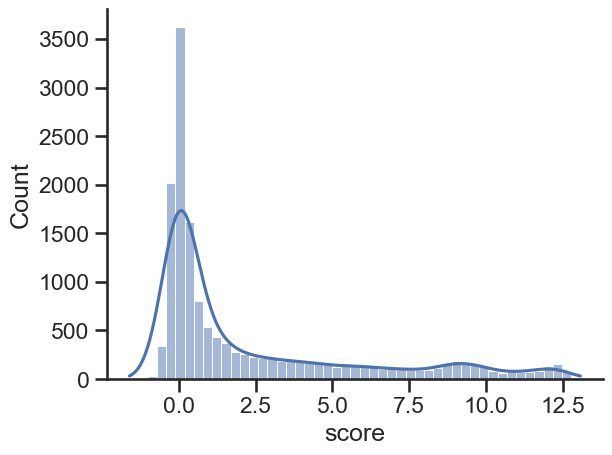

In [ ]:
ax = sns.histplot(sanborn["score"], kde = True)
sns.despine()

0.03406896259424513 0.2645321491585232
New threshold:
13.102116504292132


/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_7815/1993253185.py:73: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(x, norm.pdf(x, mu, sigma), 'r-', label=f'Gaussian Fit\nμ={mu:.2f}, σ={sigma:.2f}', color = 'red')


(                                                    seq      score   screen  \
 0     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...   9.943363  sanborn   
 1     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...   9.921760  sanborn   
 2     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...  10.223345  sanborn   
 3     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...  10.453645  sanborn   
 4     SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...   9.840524  sanborn   
 ...                                                 ...        ...      ...   
 2066  LLGAPWGCGADIWSTACLIFELITGDFLFEPDEGHSYTKDDDHIAQ...  -0.200263  sanborn   
 2067  QVLRLFIWIESKVDTLPVESLVSIFENSQFSGSEEIDSVDNIKIDT...  -0.219305  sanborn   
 2068  QRDPVYLGHLLYELTMHMEDFYALLIKLENDDDDDHDTASKALPSV...  -0.223576  sanborn   
 2069  EYCIGTTLNHPNIIETIEIVYENDRILQVMEYCEYDLFAIVMSNKM...  -0.285937  sanborn   
 2070  CLQDPVHEVRQSCFALLGDIVYFFNSELVIGNLEDFLKLIGTEIMH...  -0.611351  sanborn   
 
         z-score  
 0     37.459697  


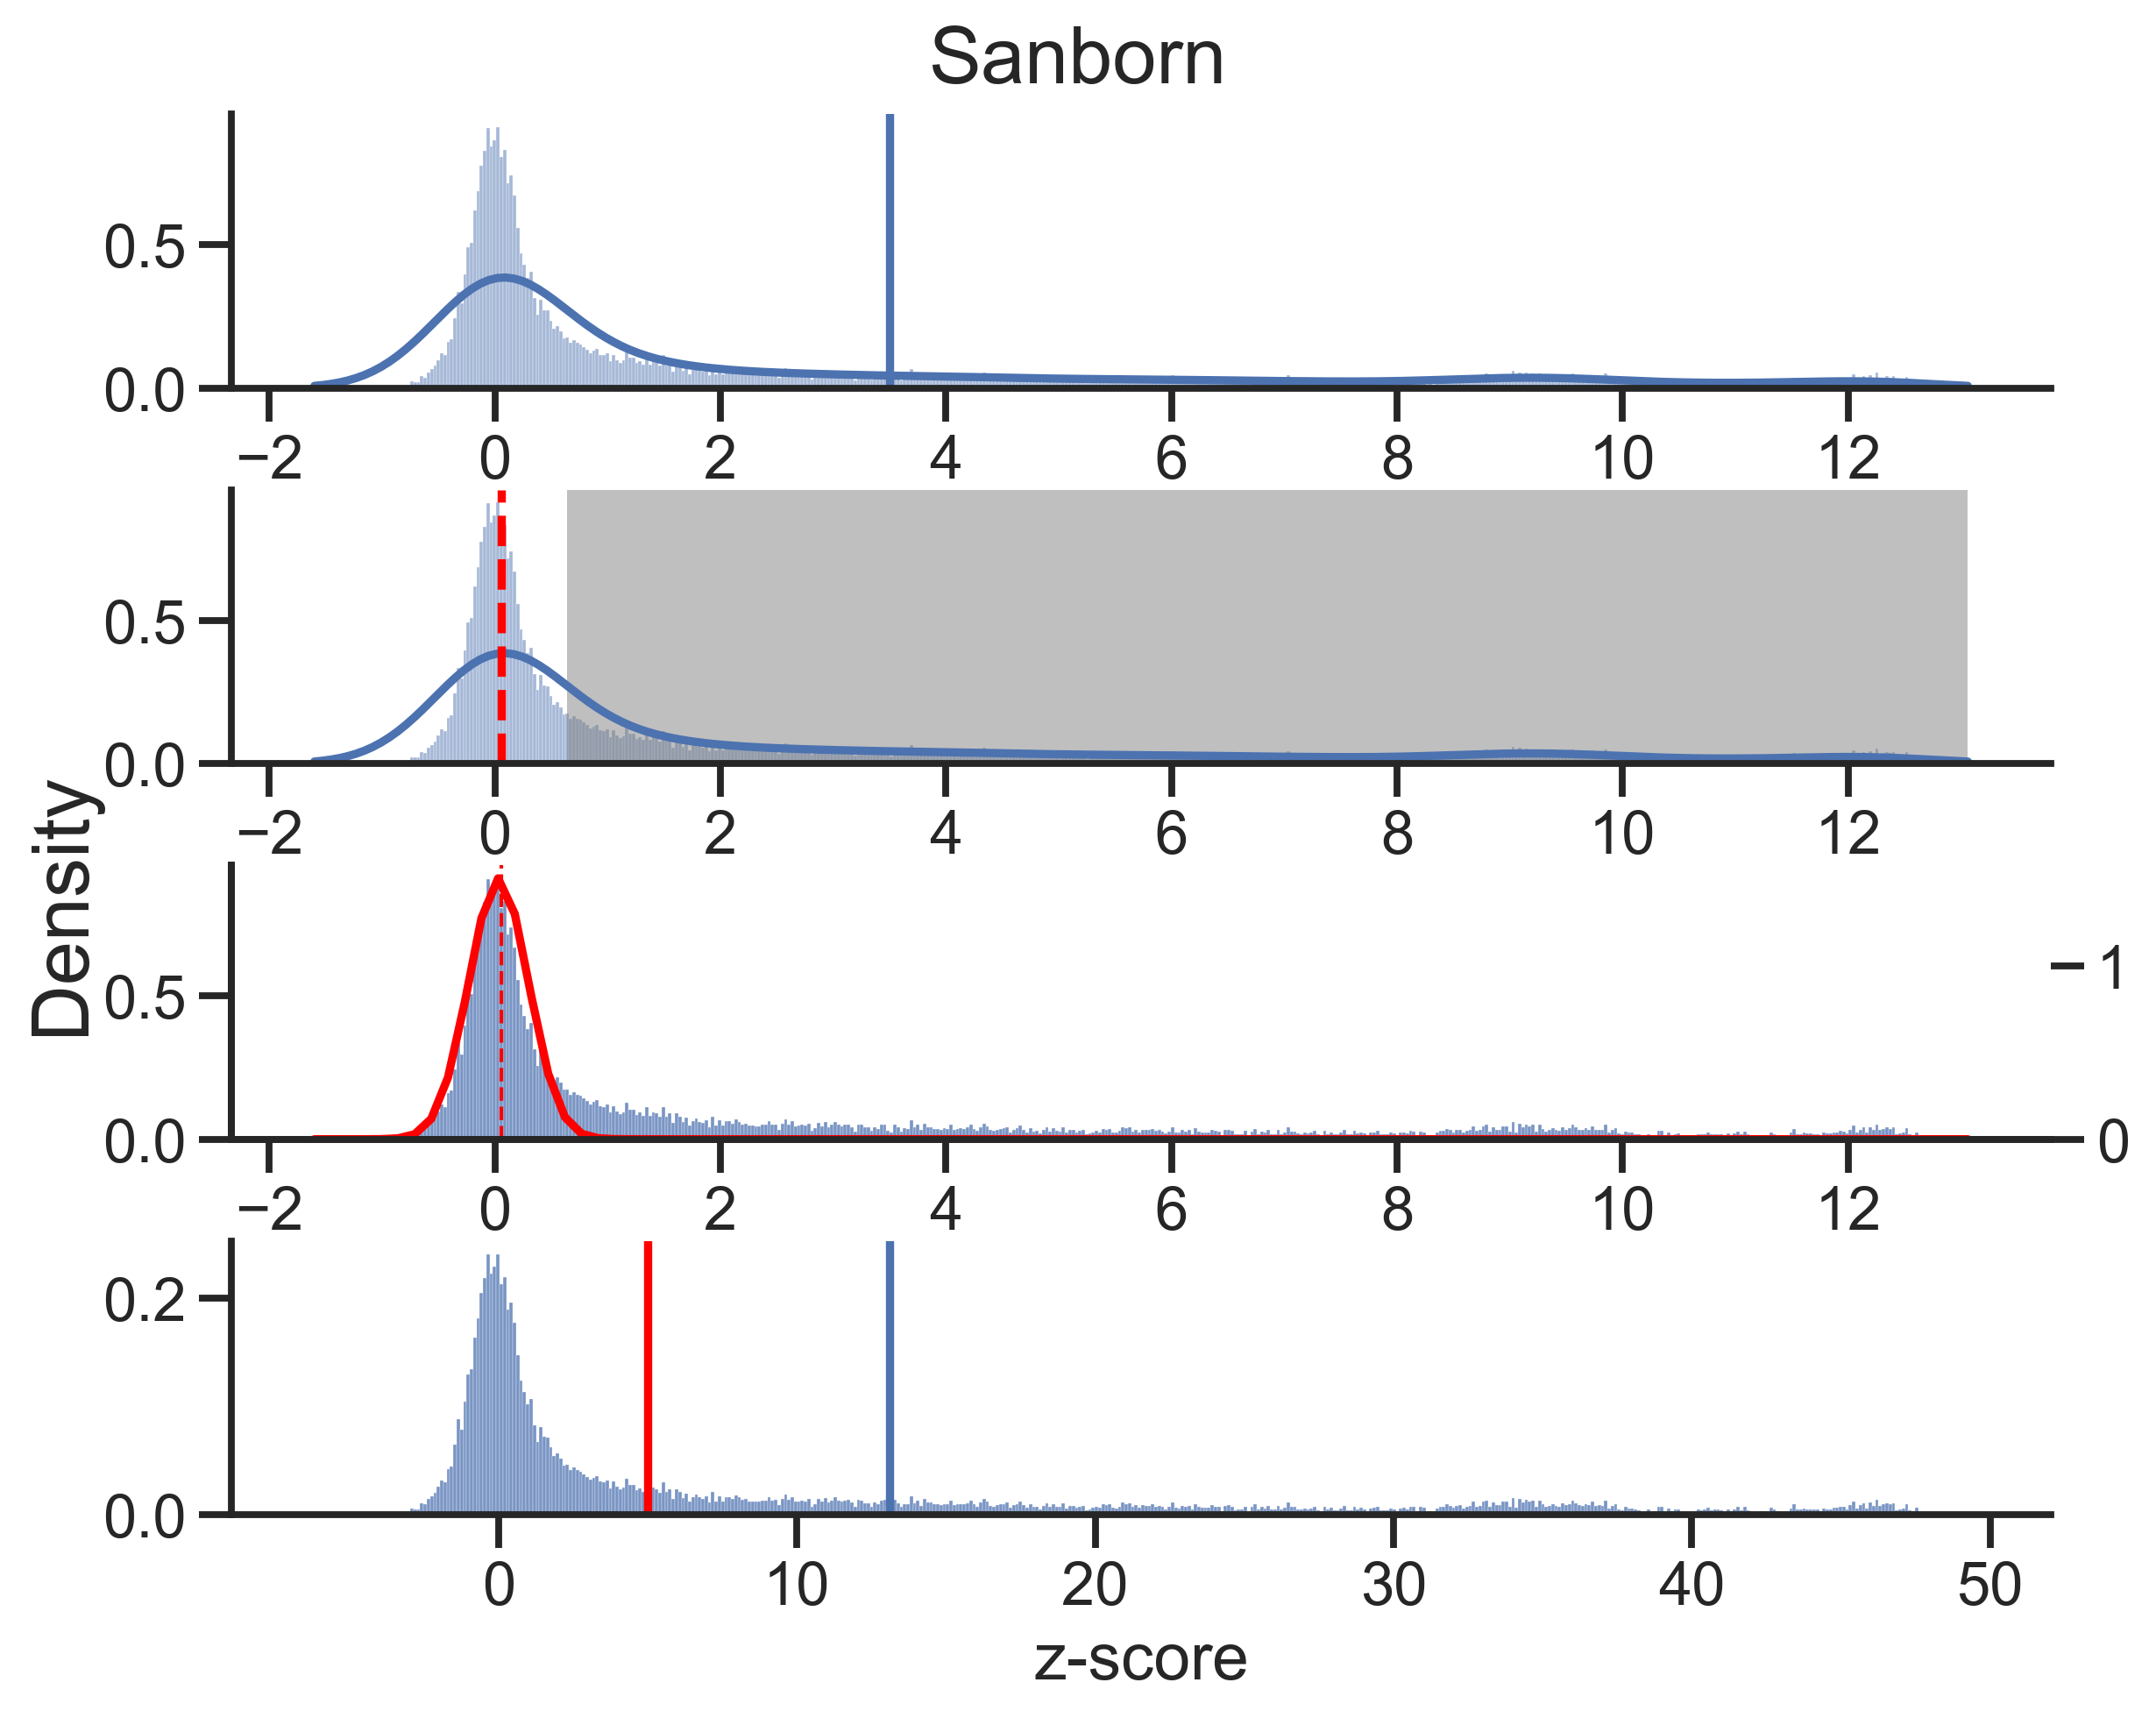

In [ ]:
fit_inactive_gaussian_to_all_data(sanborn, 3.5, title = "Sanborn")

In [ ]:
hummel = pd.read_excel("../data/hummel_1-s2.0-S2405471224001510-mmc5.xlsx", skiprows = 2)
hummel 

Unique_tile_ID        Locus  Tile_position_in_parent_protein  \
0           YGL245W_3014      YGL245W                              612   
1       AT5G18230.4_2190  AT5G18230.4                              195   
2       AT3G16570.1_4102  AT3G16570.1                               32   
3           YGL245W_3077      YGL245W                              614   
4       AT5G37340.2_2379  AT5G37340.2                              429   
...                  ...          ...                              ...   
17548  AT3G12320.1_11883  AT3G12320.1                              128   
17549       YEL040W_1484      YEL040W                              167   
17550    AT5G64910.2_188  AT5G64910.2                              168   
17551   AT2G40120.1_4890  AT2G40120.1                              116   
17552    AT1G50780.1_367  AT1G50780.1                              266   

                                                     DNA  \
0      TTAGCTGATACTAAAGATGTCGTCCCTGTTGATTTAGTTGACTTCG...   
1      GATGAATTAAGTCCAGAACAAGTAAATGACGTCAAAGATTTTCTGG...   
2      CAATCCACCGAATTCGCCGGAGATTTCCCTCCATTCGAAACAGAGT...   
3      GATACTAAAGATGTCGTCCCTGTTGATTTAGTTGACTTCGACCATT...   
4      AGCTTAGAACAGGAATGGACATTGATTCTTGATGACGAATTAGCGA...   
...                                                  ...   
17548  AGGGAAGTCCCTATGTTCCATTGTCATGACATGTCTTTCAAGGAGG...   
17549  CTTGATTACGAATTCGTCGGTGCTGATCTAGAAACTGCTCAAACCA...   
17550  AAAACGACCAAGGCGCAAGCATCTGAGCCTGAGTACTTCGAAGAGA...   
17551  TATCCAGAGTGGAGCGAGTTTTACTTGCACAATGAGACTGAAGATG...   
17552  GAGGATCAGAGCTTTTGGGAAAACCTAGATGTCGACGACGTGTTTG...   

                                                 protein  \
0      LADTKDVVPVDLVDFDHLITKDRLEEDESFEDFLTPQTEFHTDAIA...   
1      DELSPEQVNDVKDFLDDYVERNQDDFDEFSDVDELYSTLPLDEVEG...   
2      QSTEFAGDFPPFETECRGTIAECSVSAALGDGGDLFYGGGEMGEEF...   
3      DTKDVVPVDLVDFDHLITKDRLEEDESFEDFLTPQTEFHTDAIADL...   
4      SLEQEWTLILDDELANSFISPVTDDIKDDHQLTFEEYERSWEQNEE...   
...                                                  ...   
17548  REVPMFHCHDMSFKEEAPFTISDLSEENMLDSNYGDELSSEEFVLQ...   
17549  LDYEFVGADLETAQTNFYWESVLNYTNSANISTTDTFENYHTYELD...   
17550  KTTKAQASEPEYFEEKRNLEDLWKATFSVGTEWDQQDALNEFNWDF...   
17551  YPEWSEFYLHNETEDEDEFMSPAFRESDCFILPENAEDKFITDNQF...   
17552  EDQSFWENLDVDDVFGLFNDDTNLEVPLQDHSSTNEEDEFMIDISE...   

       Predicted_activation_PADDLE  Z-score_PADDLE  Activity_1mil_GFP_sort  \
0                        24.242592        7.822235               338.00000   
1                        46.395610        9.414828               338.00000   
2                        36.852043        8.849788               338.00000   
3                        24.079853        7.805709               338.00000   
4                        45.142406        9.347643               338.00000   
...                            ...             ...                     ...   
17548                    19.945688        7.343549             12773.62002   
17549                    31.481344        8.463312             12830.49091   
17550                    87.474810       10.970746             12969.29369   
17551                    34.360504        8.678030             12972.91370   
17552                    76.437040       10.639801             13147.22313   

       reads_1mil_GFP_sort  Activity_500k_GFP_sort  reads_500k_GFP_sort  \
0                       22                     NaN                  NaN   
1                       23               338.00000                 19.0   
2                       36                     NaN                  NaN   
3                       13                     NaN                  NaN   
4                       19                     NaN                  NaN   
...                    ...                     ...                  ...   
17548                   40              1458.00000                 39.0   
17549                   16                     NaN                  NaN   
17550                  348                     NaN                 

In [ ]:
hummel.dropna(subset = "Activity_1mil_GFP_sort")

Unique_tile_ID        Locus  Tile_position_in_parent_protein  \
0           YGL245W_3014      YGL245W                              612   
1       AT5G18230.4_2190  AT5G18230.4                              195   
2       AT3G16570.1_4102  AT3G16570.1                               32   
3           YGL245W_3077      YGL245W                              614   
4       AT5G37340.2_2379  AT5G37340.2                              429   
...                  ...          ...                              ...   
17548  AT3G12320.1_11883  AT3G12320.1                              128   
17549       YEL040W_1484      YEL040W                              167   
17550    AT5G64910.2_188  AT5G64910.2                              168   
17551   AT2G40120.1_4890  AT2G40120.1                              116   
17552    AT1G50780.1_367  AT1G50780.1                              266   

                                                     DNA  \
0      TTAGCTGATACTAAAGATGTCGTCCCTGTTGATTTAGTTGACTTCG...   
1      GATGAATTAAGTCCAGAACAAGTAAATGACGTCAAAGATTTTCTGG...   
2      CAATCCACCGAATTCGCCGGAGATTTCCCTCCATTCGAAACAGAGT...   
3      GATACTAAAGATGTCGTCCCTGTTGATTTAGTTGACTTCGACCATT...   
4      AGCTTAGAACAGGAATGGACATTGATTCTTGATGACGAATTAGCGA...   
...                                                  ...   
17548  AGGGAAGTCCCTATGTTCCATTGTCATGACATGTCTTTCAAGGAGG...   
17549  CTTGATTACGAATTCGTCGGTGCTGATCTAGAAACTGCTCAAACCA...   
17550  AAAACGACCAAGGCGCAAGCATCTGAGCCTGAGTACTTCGAAGAGA...   
17551  TATCCAGAGTGGAGCGAGTTTTACTTGCACAATGAGACTGAAGATG...   
17552  GAGGATCAGAGCTTTTGGGAAAACCTAGATGTCGACGACGTGTTTG...   

                                                 protein  \
0      LADTKDVVPVDLVDFDHLITKDRLEEDESFEDFLTPQTEFHTDAIA...   
1      DELSPEQVNDVKDFLDDYVERNQDDFDEFSDVDELYSTLPLDEVEG...   
2      QSTEFAGDFPPFETECRGTIAECSVSAALGDGGDLFYGGGEMGEEF...   
3      DTKDVVPVDLVDFDHLITKDRLEEDESFEDFLTPQTEFHTDAIADL...   
4      SLEQEWTLILDDELANSFISPVTDDIKDDHQLTFEEYERSWEQNEE...   
...                                                  ...   
17548  REVPMFHCHDMSFKEEAPFTISDLSEENMLDSNYGDELSSEEFVLQ...   
17549  LDYEFVGADLETAQTNFYWESVLNYTNSANISTTDTFENYHTYELD...   
17550  KTTKAQASEPEYFEEKRNLEDLWKATFSVGTEWDQQDALNEFNWDF...   
17551  YPEWSEFYLHNETEDEDEFMSPAFRESDCFILPENAEDKFITDNQF...   
17552  EDQSFWENLDVDDVFGLFNDDTNLEVPLQDHSSTNEEDEFMIDISE...   

       Predicted_activation_PADDLE  Z-score_PADDLE  Activity_1mil_GFP_sort  \
0                        24.242592        7.822235               338.00000   
1                        46.395610        9.414828               338.00000   
2                        36.852043        8.849788               338.00000   
3                        24.079853        7.805709               338.00000   
4                        45.142406        9.347643               338.00000   
...                            ...             ...                     ...   
17548                    19.945688        7.343549             12773.62002   
17549                    31.481344        8.463312             12830.49091   
17550                    87.474810       10.970746             12969.29369   
17551                    34.360504        8.678030             12972.91370   
17552                    76.437040       10.639801             13147.22313   

       reads_1mil_GFP_sort  Activity_500k_GFP_sort  reads_500k_GFP_sort  \
0                       22                     NaN                  NaN   
1                       23               338.00000                 19.0   
2                       36                     NaN                  NaN   
3                       13                     NaN                  NaN   
4                       19                     NaN                  NaN   
...                    ...                     ...                  ...   
17548                   40              1458.00000                 39.0   
17549                   16                     NaN                  NaN   
17550                  348                     NaN                 

In [ ]:
hummel.dropna(subset = "Activity_500k_GFP_sort")

Unique_tile_ID        Locus  Tile_position_in_parent_protein  \
1       AT5G18230.4_2190  AT5G18230.4                              195   
6       AT5G64910.2_2433  AT5G64910.2                              162   
8           YKL143W_1910      YKL143W                              217   
11          YJR074W_3159      YJR074W                               75   
17      AT5G22760.1_3523  AT5G22760.1                             1439   
...                  ...          ...                              ...   
17546    AT1G50780.1_441  AT1G50780.1                              252   
17547    AT1G50780.1_542  AT1G50780.1                              246   
17548  AT3G12320.1_11883  AT3G12320.1                              128   
17551   AT2G40120.1_4890  AT2G40120.1                              116   
17552    AT1G50780.1_367  AT1G50780.1                              266   

                                                     DNA  \
1      GATGAATTAAGTCCAGAACAAGTAAATGACGTCAAAGATTTTCTGG...   
6      AGAGCCAAGAAGCGAGCCAAAACGACCAAGGCGCAAGCATCTGAGC...   
8      CTAGGGAGCGGTGAAGCAAAAGATGAAGACGAATTCGAGGATGAGT...   
11     GAAGAATTCGAAGATGGACTAGCCACCAATGAAAGCATTATCGTGG...   
17     GATGCATCTGGCAATAGCAACAACATGAATGAAGGCGAGCTTATGT...   
...                                                  ...   
17546  ATTGTACCCCAAGAAACACAAACACAACCGATGTTCTCTGAGGAGG...   
17547  GAGGAGAAGAACAGAATGATTGTACCCCAAGAAACACAAACACAAC...   
17548  AGGGAAGTCCCTATGTTCCATTGTCATGACATGTCTTTCAAGGAGG...   
17551  TATCCAGAGTGGAGCGAGTTTTACTTGCACAATGAGACTGAAGATG...   
17552  GAGGATCAGAGCTTTTGGGAAAACCTAGATGTCGACGACGTGTTTG...   

                                                 protein  \
1      DELSPEQVNDVKDFLDDYVERNQDDFDEFSDVDELYSTLPLDEVEG...   
6      RAKKRAKTTKAQASEPEYFEEKRNLEDLWKATFSVGTEWDQQDALN...   
8      LGSGEAKDEDEFEDEFDEWDIDNVENFEDENYVKEMAQFDNIENLE...   
11     EEFEDGLATNESIIVDLLETVDKSDLKEAWQFHVEDLTELNGTTKW...   
17     DASGNSNNMNEGELMFDYEDMEFEPQTYFSLTELLTTDDSGQCDGY...   
...                                                  ...   
17546  IVPQETQTQPMFSEEDQSFWENLDVDDVFGLFNDDTNLEVPLQDHS...   
17547  EEKNRMIVPQETQTQPMFSEEDQSFWENLDVDDVFGLFNDDTNLEV...   
17548  REVPMFHCHDMSFKEEAPFTISDLSEENMLDSNYGDELSSEEFVLQ...   
17551  YPEWSEFYLHNETEDEDEFMSPAFRESDCFILPENAEDKFITDNQF...   
17552  EDQSFWENLDVDDVFGLFNDDTNLEVPLQDHSSTNEEDEFMIDISE...   

       Predicted_activation_PADDLE  Z-score_PADDLE  Activity_1mil_GFP_sort  \
1                        46.395610        9.414828               338.00000   
6                        44.819000        9.330002               338.00000   
8                        28.912490        8.254461               338.00000   
11                       23.846510        7.781817               338.00000   
17                       38.922770        8.983920               338.00000   
...                            ...             ...                     ...   
17546                    72.636330       10.514664             12709.88009   
17547                    68.433680       10.368431             12759.73726   
17548                    19.945688        7.343549             12773.62002   
17551                    34.360504        8.678030             12972.91370   
17552                    76.437040       10.639801             13147.22313   

       reads_1mil_GFP_sort  Activity_500k_GFP_sort  reads_500k_GFP_sort  \
1                       23              338.000000                 19.0   
6                       12             1458.000000                 24.0   
8                       15             1458.000000                 17.0   
11                      15             1458.000000                 57.0   
17                      23             1247.101665                194.0   
...                    ...                     ...                  ...   
17546                10280            12352.671200              12850.0   
17547                 4967            13850.730840               7052.0   
17548                   40             1458.000000                 

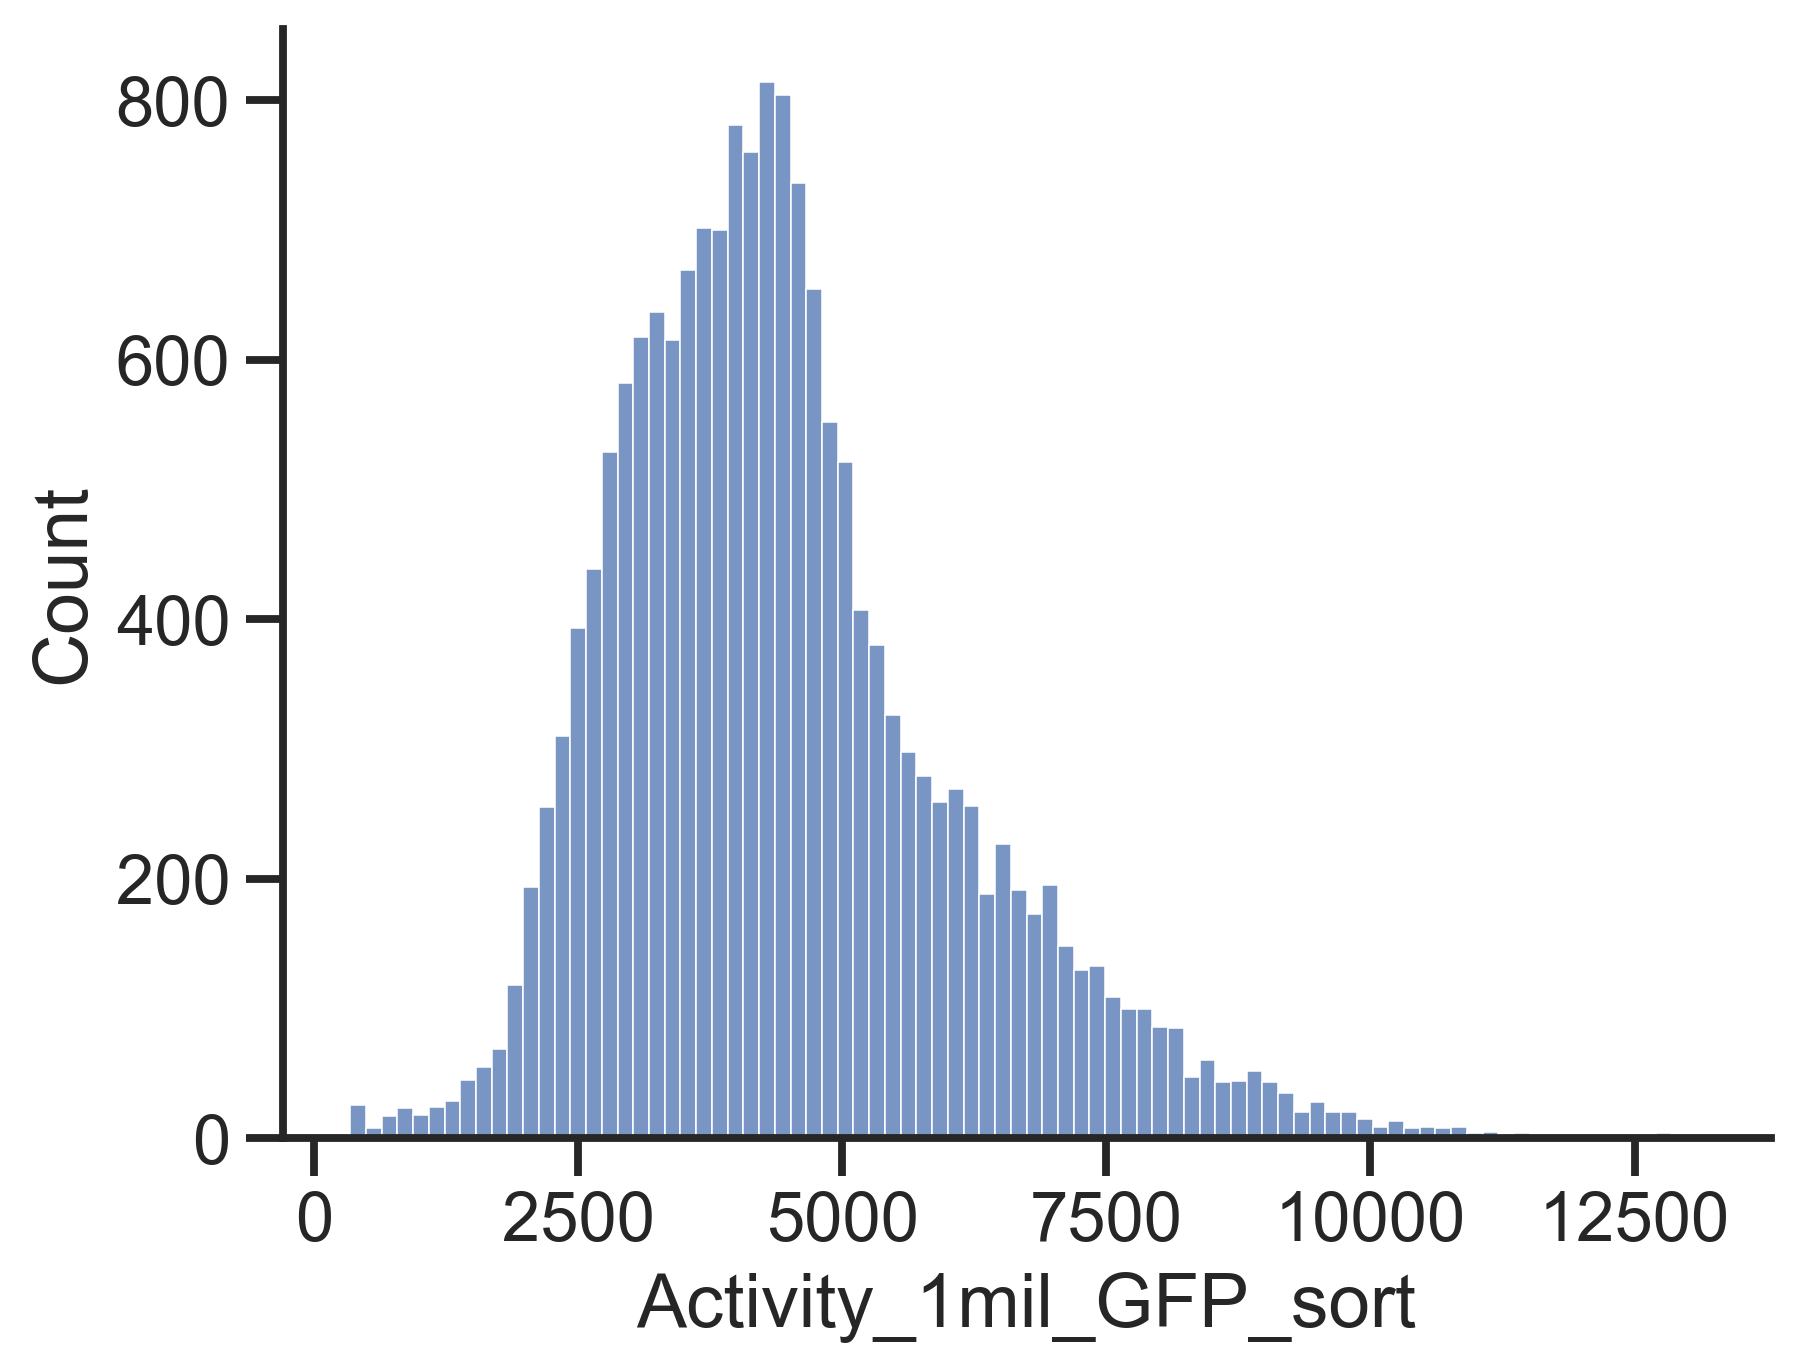

In [ ]:
plt.figure(dpi = 300)
sns.histplot(hummel["Activity_1mil_GFP_sort"])
sns.despine()

<Axes: xlabel='log2_activity', ylabel='Count'>

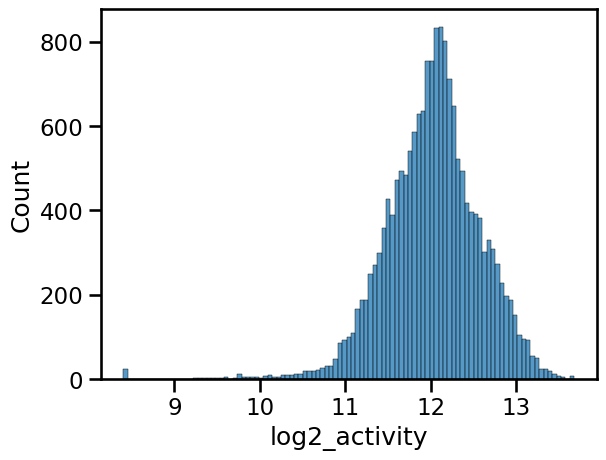

In [ ]:
sns.histplot(hummel["log2_activity"])

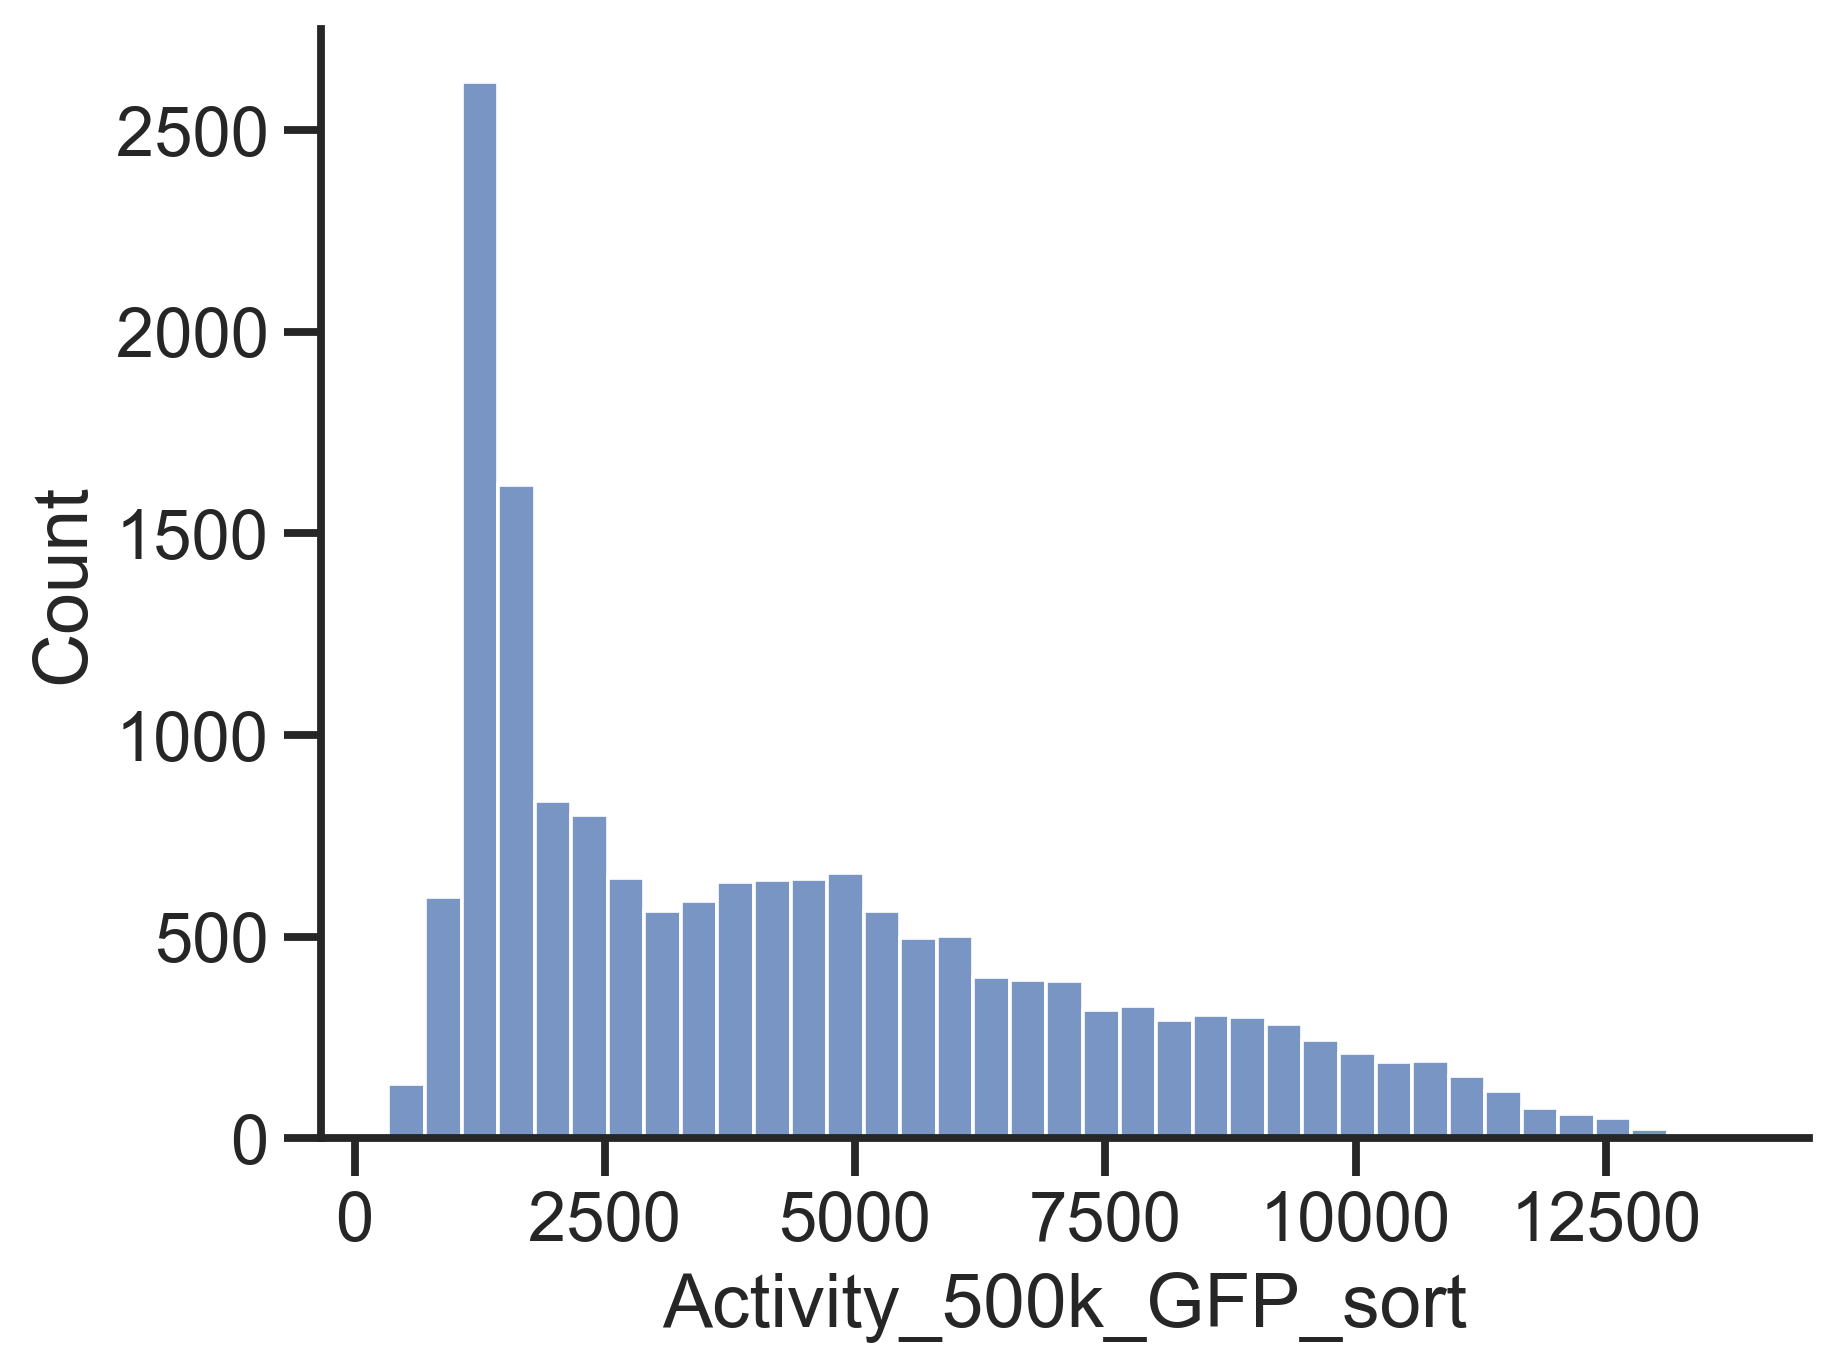

In [ ]:
plt.figure(dpi = 300)
sns.histplot(hummel["Activity_500k_GFP_sort"])
sns.despine()

In [ ]:
hummel = hummel.rename(columns = {"protein" : "seq", "Activity_500k_GFP_sort" : "score"})
hummel["screen"] = "hummel"
hummel = hummel[["seq", "score", "screen"]]
hummel = hummel.dropna().drop_duplicates()
hummel

seq         score  screen
1      DELSPEQVNDVKDFLDDYVERNQDDFDEFSDVDELYSTLPLDEVEG...    338.000000  hummel
6      RAKKRAKTTKAQASEPEYFEEKRNLEDLWKATFSVGTEWDQQDALN...   1458.000000  hummel
8      LGSGEAKDEDEFEDEFDEWDIDNVENFEDENYVKEMAQFDNIENLE...   1458.000000  hummel
11     EEFEDGLATNESIIVDLLETVDKSDLKEAWQFHVEDLTELNGTTKW...   1458.000000  hummel
17     DASGNSNNMNEGELMFDYEDMEFEPQTYFSLTELLTTDDSGQCDGY...   1247.101665  hummel
...                                                  ...           ...     ...
17546  IVPQETQTQPMFSEEDQSFWENLDVDDVFGLFNDDTNLEVPLQDHS...  12352.671200  hummel
17547  EEKNRMIVPQETQTQPMFSEEDQSFWENLDVDDVFGLFNDDTNLEV...  13850.730840  hummel
17548  REVPMFHCHDMSFKEEAPFTISDLSEENMLDSNYGDELSSEEFVLQ...   1458.000000  hummel
17551  YPEWSEFYLHNETEDEDEFMSPAFRESDCFILPENAEDKFITDNQF...    435.444130  hummel
17552  EDQSFWENLDVDDVFGLFNDDTNLEVPLQDHSSTNEEDEFMIDISE...  13489.528610  hummel

[16884 rows x 3 columns]

/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_7815/1993253185.py:73: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(x, norm.pdf(x, mu, sigma), 'r-', label=f'Gaussian Fit\nμ={mu:.2f}, σ={sigma:.2f}', color = 'red')


1349.5852240017698 287.5254412547986
New threshold:
-4.681621278893715


(                                                     seq         score  \
 1      DELSPEQVNDVKDFLDDYVERNQDDFDEFSDVDELYSTLPLDEVEG...    338.000000   
 6      RAKKRAKTTKAQASEPEYFEEKRNLEDLWKATFSVGTEWDQQDALN...   1458.000000   
 8      LGSGEAKDEDEFEDEFDEWDIDNVENFEDENYVKEMAQFDNIENLE...   1458.000000   
 11     EEFEDGLATNESIIVDLLETVDKSDLKEAWQFHVEDLTELNGTTKW...   1458.000000   
 17     DASGNSNNMNEGELMFDYEDMEFEPQTYFSLTELLTTDDSGQCDGY...   1247.101665   
 ...                                                  ...           ...   
 17546  IVPQETQTQPMFSEEDQSFWENLDVDDVFGLFNDDTNLEVPLQDHS...  12352.671200   
 17547  EEKNRMIVPQETQTQPMFSEEDQSFWENLDVDDVFGLFNDDTNLEV...  13850.730840   
 17548  REVPMFHCHDMSFKEEAPFTISDLSEENMLDSNYGDELSSEEFVLQ...   1458.000000   
 17551  YPEWSEFYLHNETEDEDEFMSPAFRESDCFILPENAEDKFITDNQF...    435.444130   
 17552  EDQSFWENLDVDDVFGLFNDDTNLEVPLQDHSSTNEEDEFMIDISE...  13489.528610   
 
        screen    z-score  
 1      hummel  -3.518246  
 6      hummel   0.377062  
 8      hummel

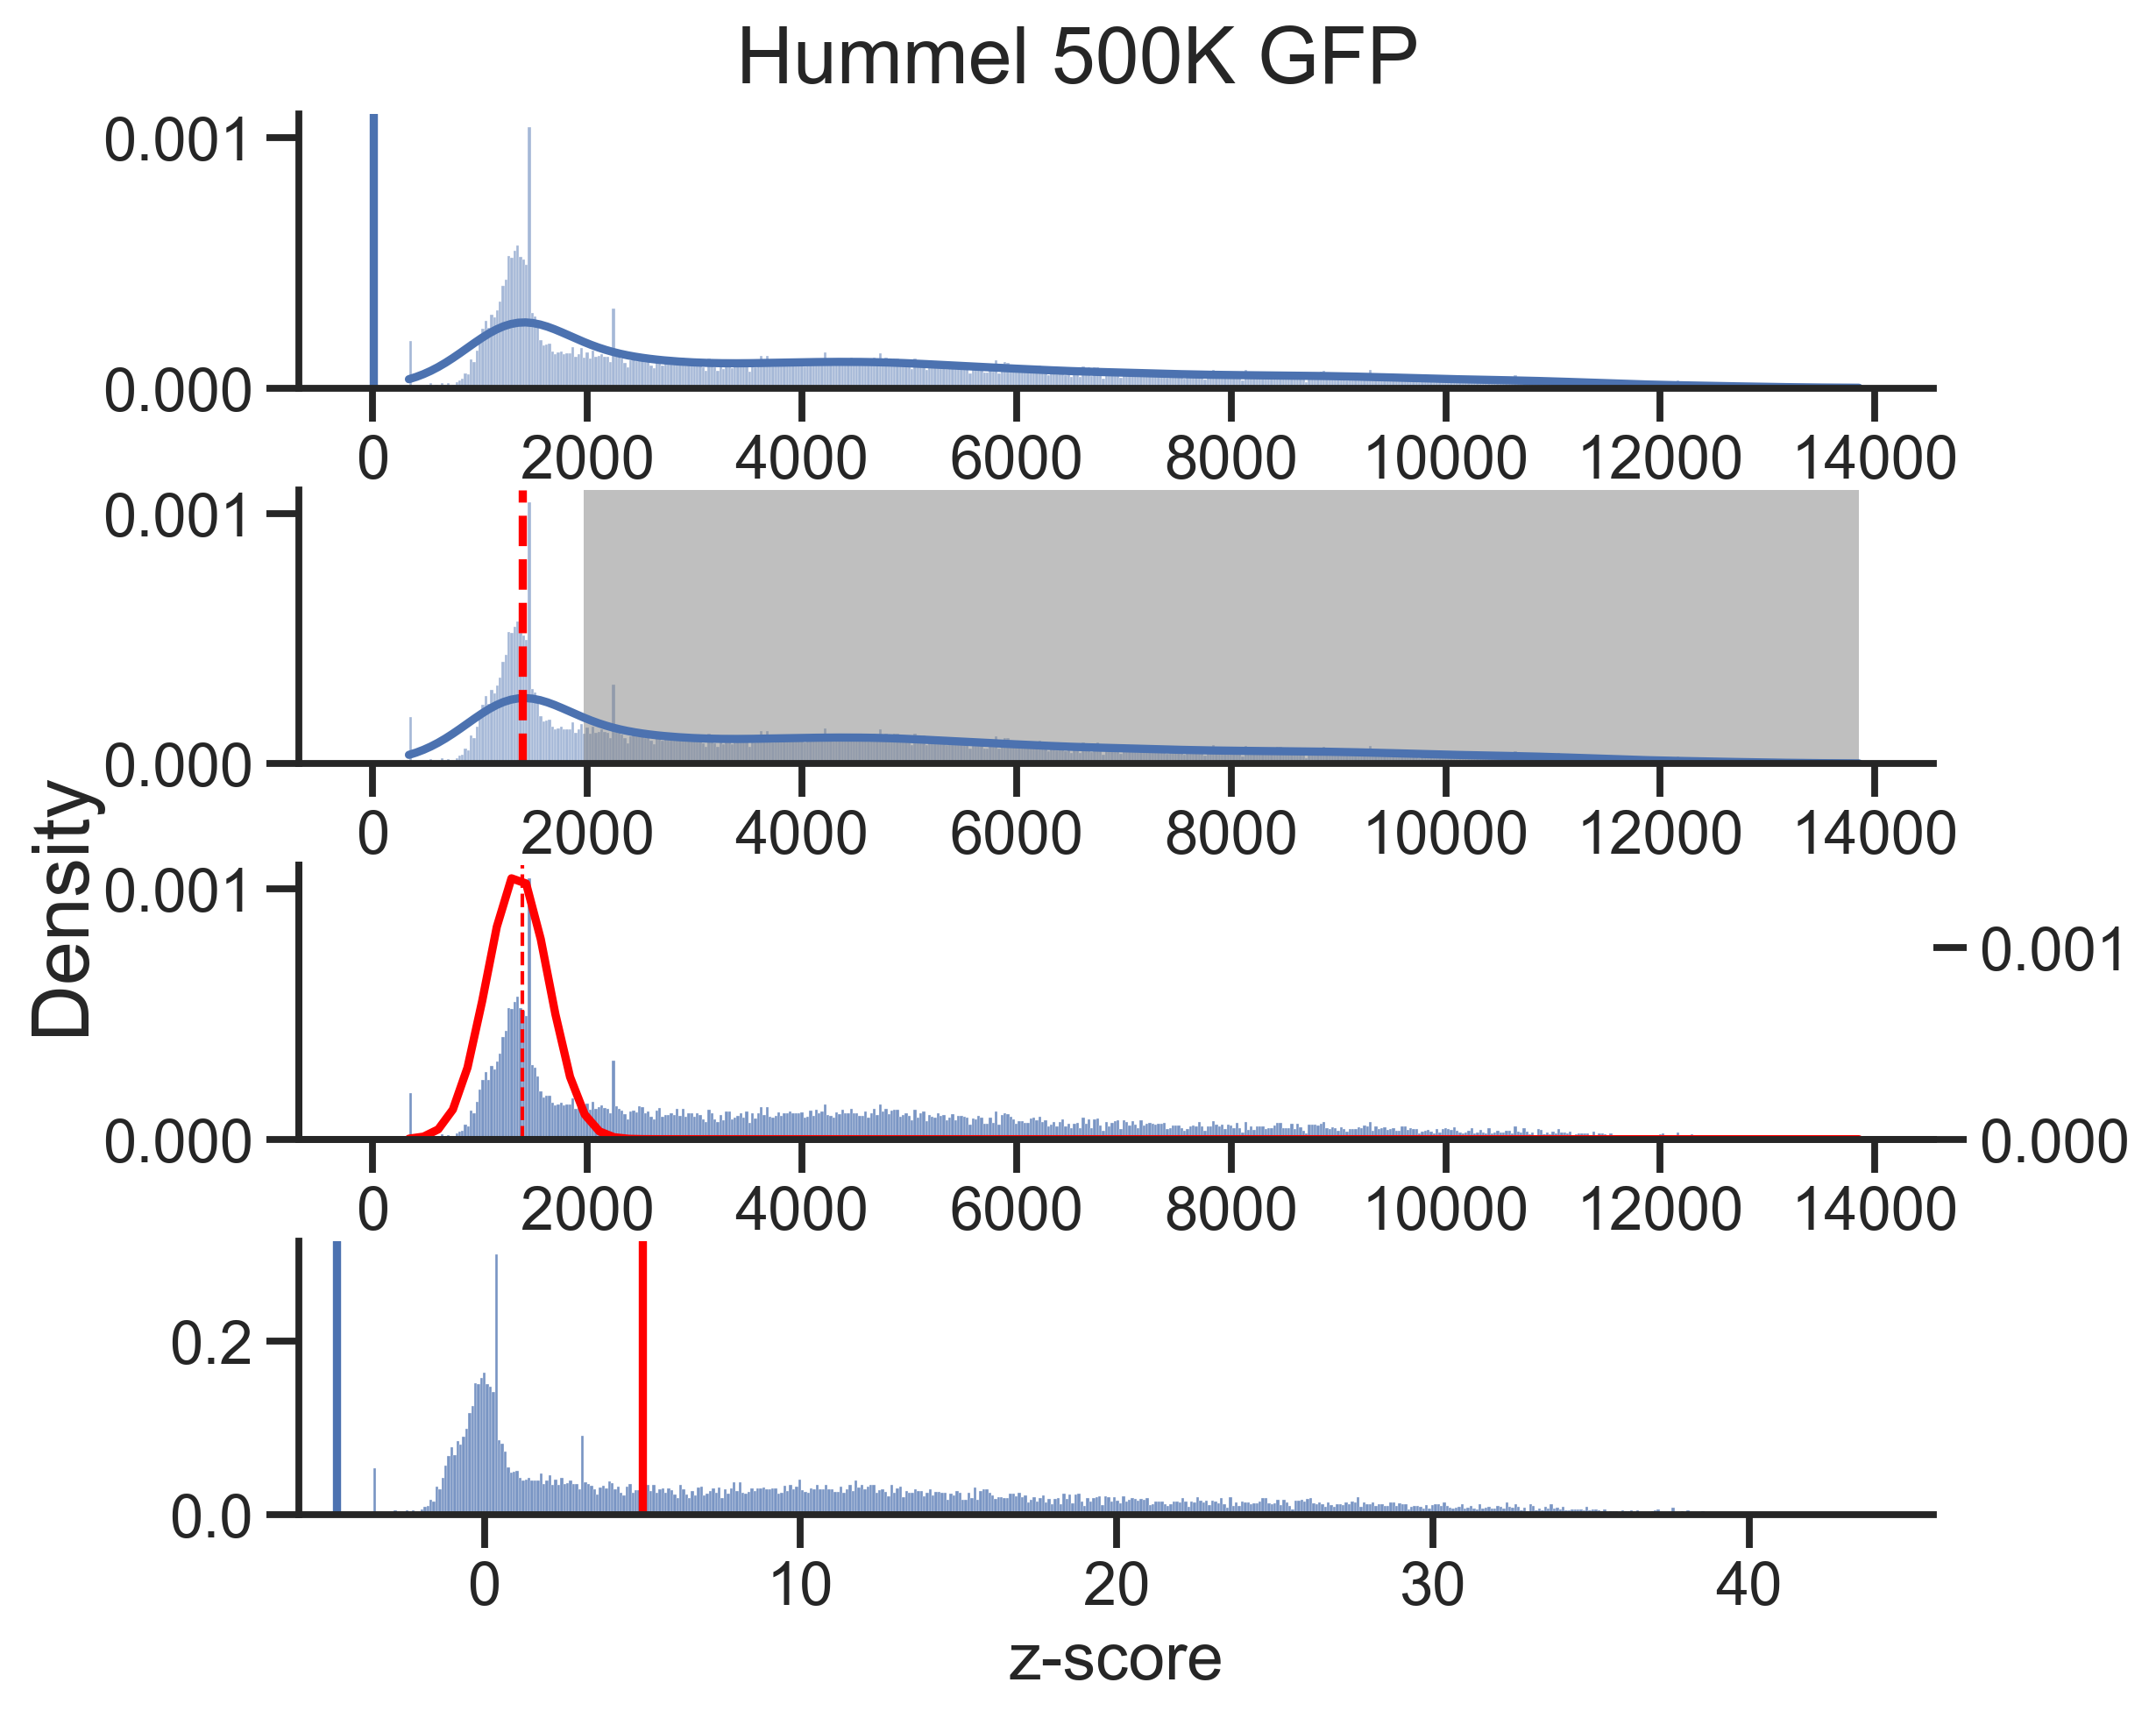

In [ ]:
fit_inactive_gaussian_to_all_data(hummel, 3.5, title = "Hummel 500K GFP")

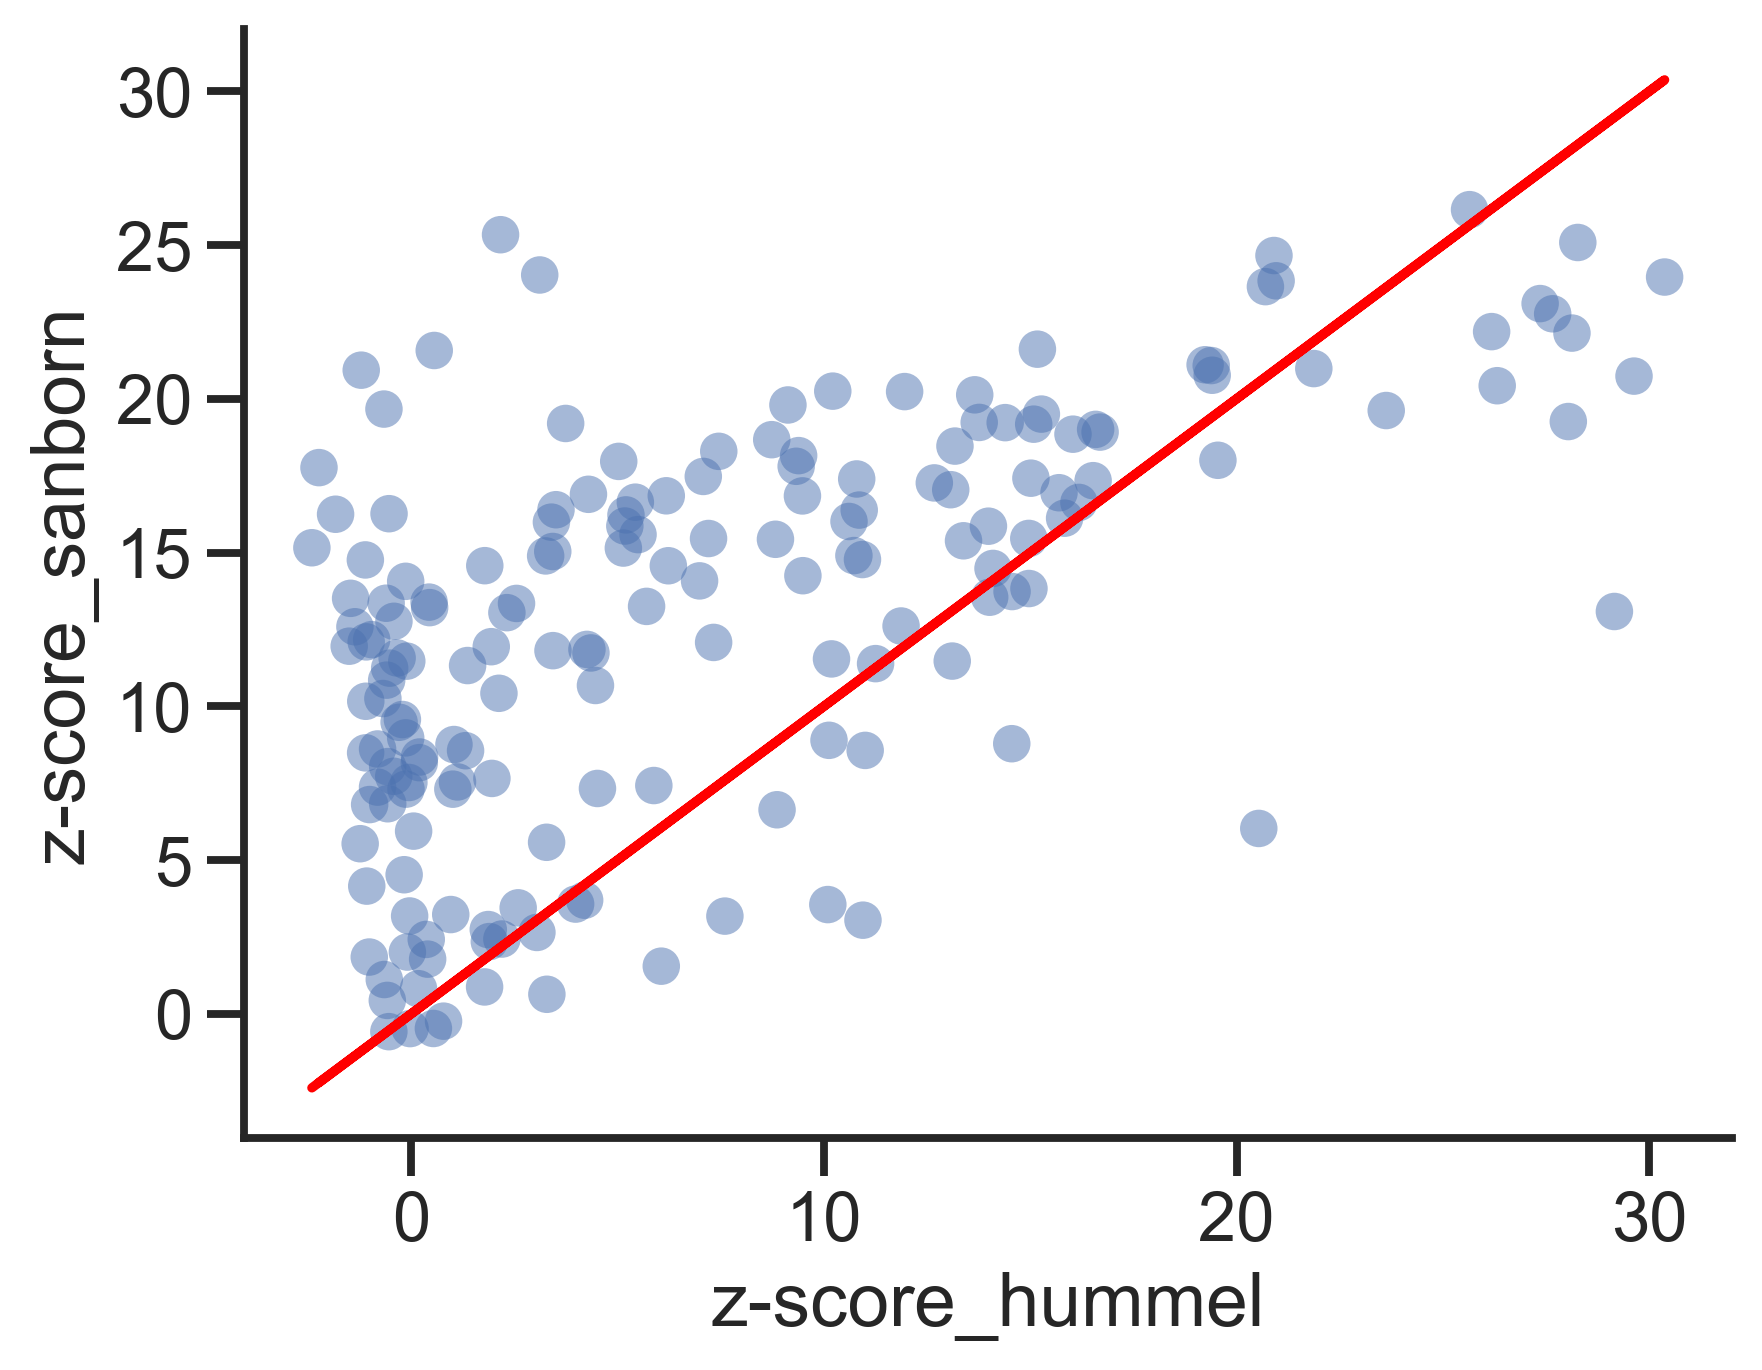

In [ ]:
sns.set_context('talk')
plt.figure(dpi = 300)
hummel_sanborn = pd.merge(hummel, sanborn, on = "seq", suffixes = ("_hummel", "_sanborn"))
sns.scatterplot(data = hummel_sanborn, x = "z-score_hummel", y = "z-score_sanborn", alpha = 0.5, edgecolor = 'none')
plt.plot(hummel_sanborn["z-score_hummel"], hummel_sanborn["z-score_hummel"], color='red', linestyle='solid')

# # Calculate correlation
# correlation, _ = pearsonr(hummel_sanborn["z-score_hummel"], hummel_sanborn["z-score_sanborn"])

# # Add correlation as text
# plt.text(0.05, 0.95, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes, 
#          fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

            
sns.despine()

In [ ]:
combined_53_mers = pd.concat([hummel, sanborn])
combined_53_mers

seq        score   screen  \
1     DELSPEQVNDVKDFLDDYVERNQDDFDEFSDVDELYSTLPLDEVEG...   338.000000   hummel   
6     RAKKRAKTTKAQASEPEYFEEKRNLEDLWKATFSVGTEWDQQDALN...  1458.000000   hummel   
8     LGSGEAKDEDEFEDEFDEWDIDNVENFEDENYVKEMAQFDNIENLE...  1458.000000   hummel   
11    EEFEDGLATNESIIVDLLETVDKSDLKEAWQFHVEDLTELNGTTKW...  1458.000000   hummel   
17    DASGNSNNMNEGELMFDYEDMEFEPQTYFSLTELLTTDDSGQCDGY...  1247.101665   hummel   
...                                                 ...          ...      ...   
2066  LLGAPWGCGADIWSTACLIFELITGDFLFEPDEGHSYTKDDDHIAQ...    -0.200263  sanborn   
2067  QVLRLFIWIESKVDTLPVESLVSIFENSQFSGSEEIDSVDNIKIDT...    -0.219305  sanborn   
2068  QRDPVYLGHLLYELTMHMEDFYALLIKLENDDDDDHDTASKALPSV...    -0.223576  sanborn   
2069  EYCIGTTLNHPNIIETIEIVYENDRILQVMEYCEYDLFAIVMSNKM...    -0.285937  sanborn   
2070  CLQDPVHEVRQSCFALLGDIVYFFNSELVIGNLEDFLKLIGTEIMH...    -0.611351  sanborn   

       z-score  
1    -3.518246  
6     0.377062  
8     0.377062  
11    0.377062  
17   -0.356433  
...        ...  
2066 -0.885835  
2067 -0.957820  
2068 -0.973965  
2069 -1.209707  
2070 -2.439855  

[31940 rows x 4 columns]

Text(0.5, 1.02, '53-mer GFP8 Sort Screens')

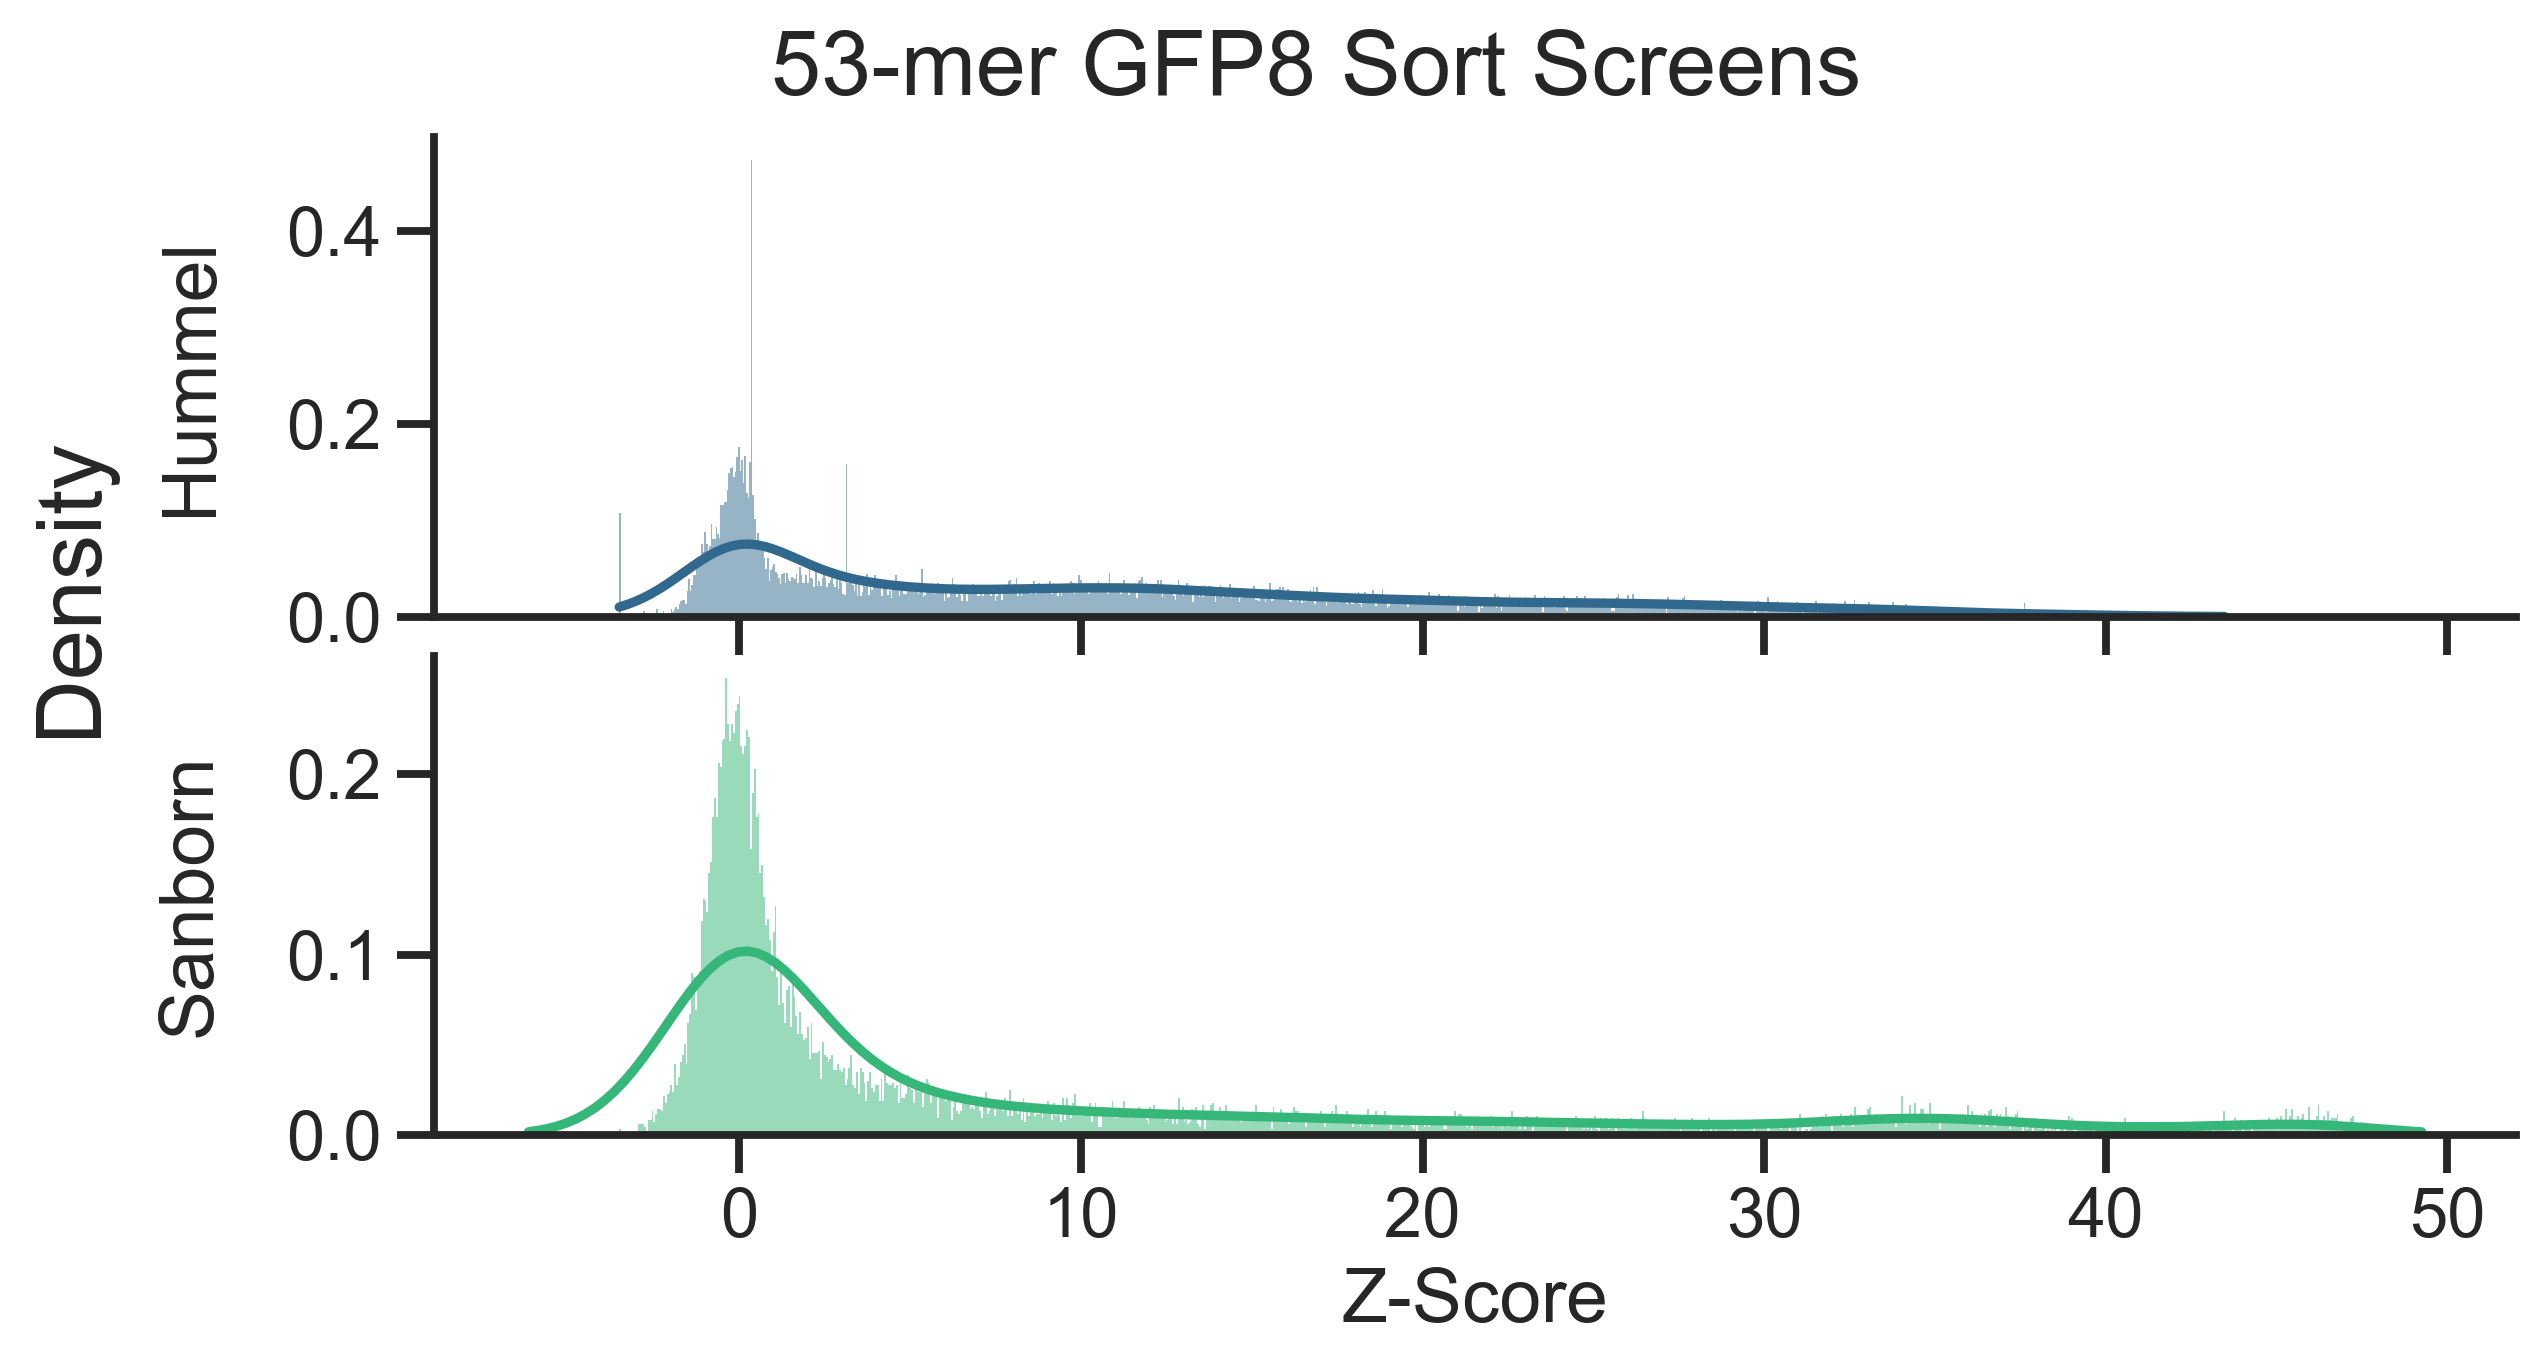

In [ ]:
sns.set_context('talk')
sns.set_style('ticks')

fig, axs = plt.subplots(2, 1, sharex = True, figsize = (8, 4), dpi = 300)
sns.histplot(hummel["z-score"], ax = axs[0], stat = 'density', bins = 1000, edgecolor = 'none', kde = True, color = sns.color_palette('viridis', 2)[0])
sns.histplot(sanborn["z-score"], ax = axs[1], stat = 'density', bins = 1000, edgecolor = 'none', kde = True, color = sns.color_palette('viridis', 2)[1])

axs[0].set_ylabel("Hummel")
axs[1].set_ylabel("Sanborn")

fig.supylabel("Density", ha = 'right', va = 'bottom', x = -0.001)

sns.despine()
fig.tight_layout(pad = 0)

for ax in axs:
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.set_xlabel("")

axs[1].set_xlabel("Z-Score")
fig.suptitle("53-mer GFP8 Sort Screens", va = 'bottom', y = 1.02)

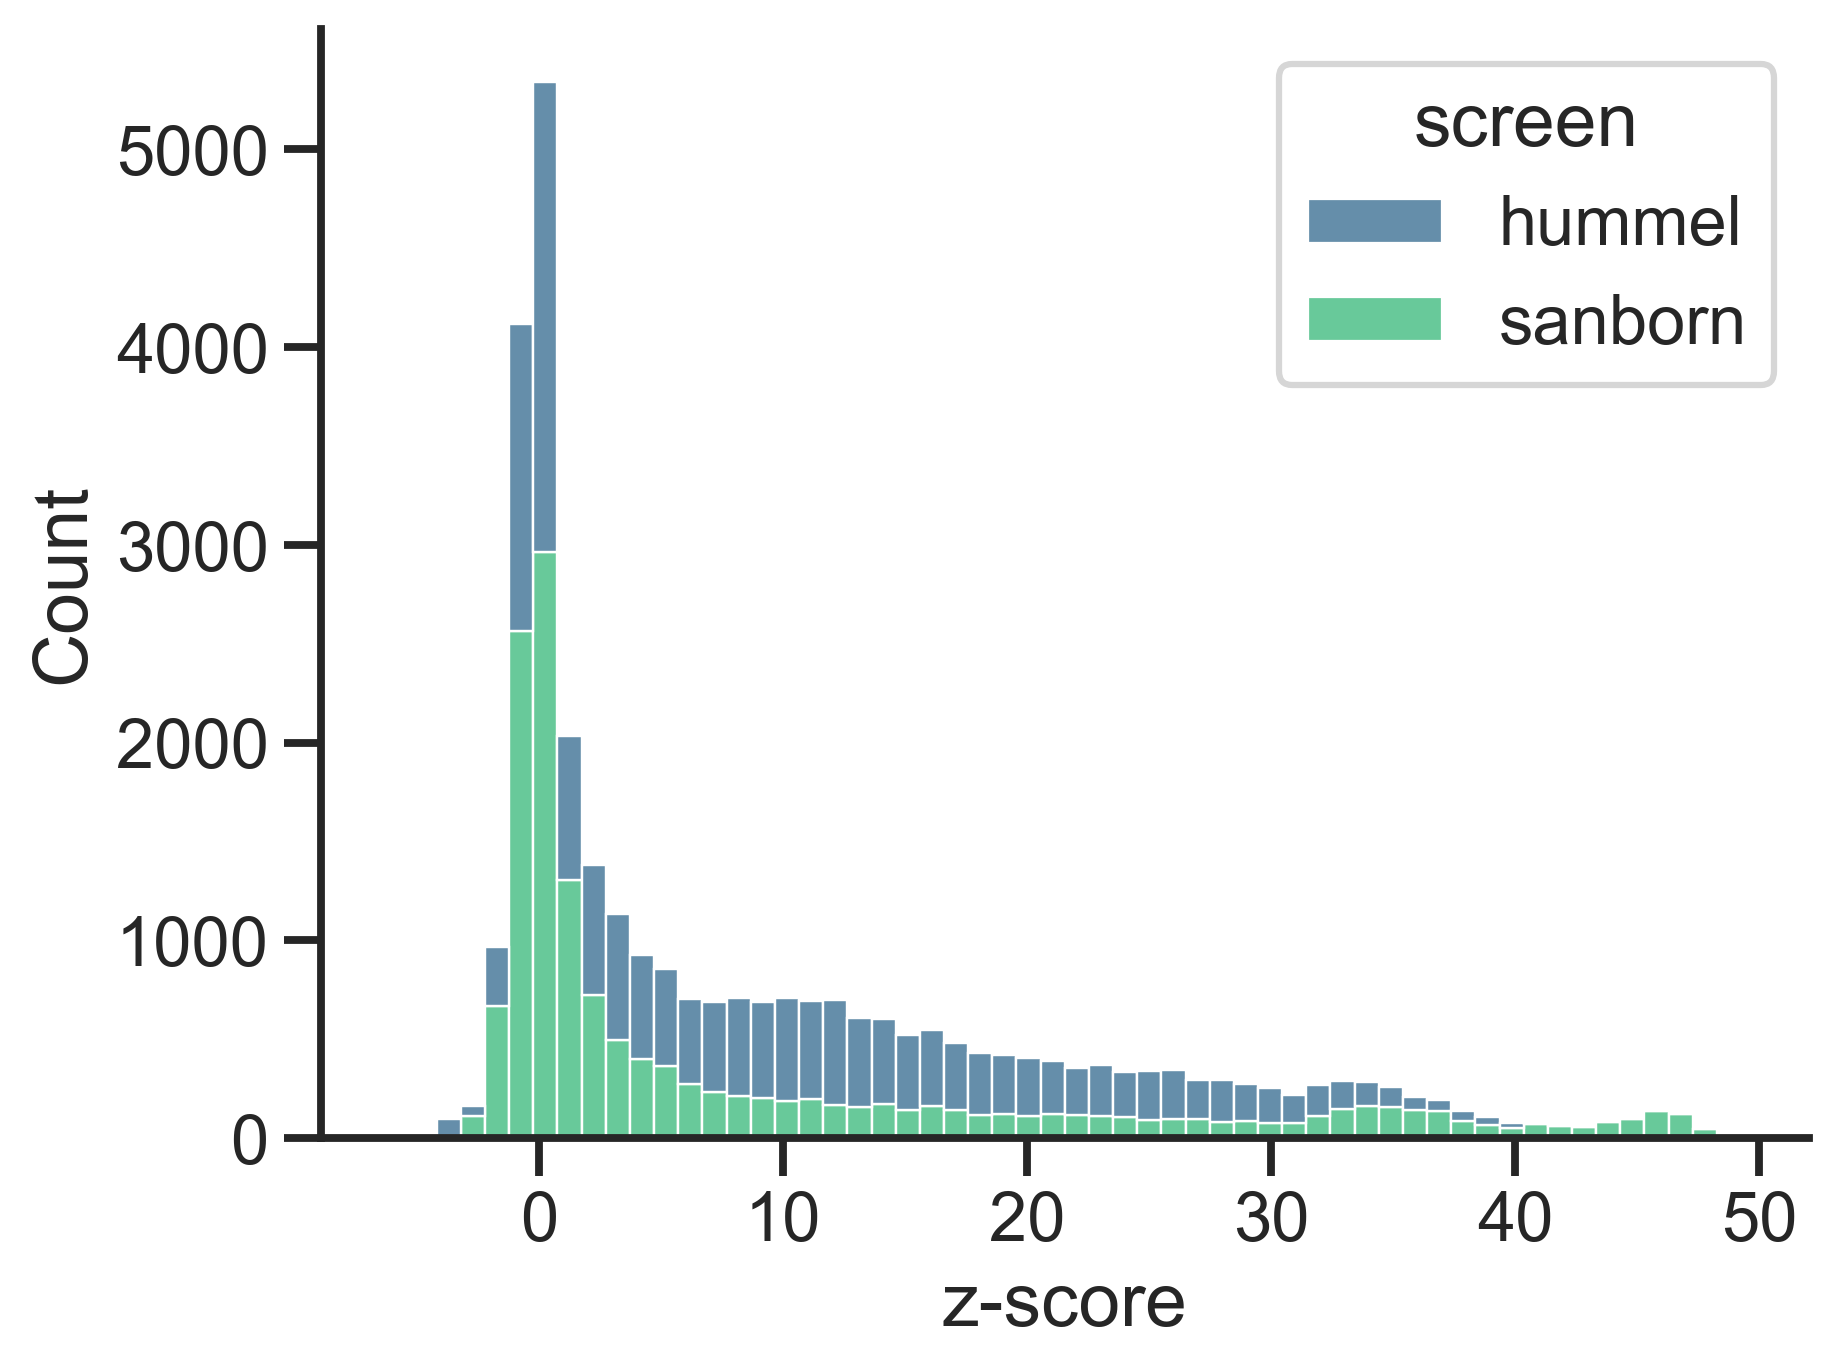

In [ ]:
plt.figure(dpi = 300)
sns.histplot(data = combined_53_mers, x = "z-score", hue = "screen", multiple = "stack", palette = "viridis")
sns.despine()

In [ ]:
all_combined = pd.concat([combined, combined_53_mers])
all_combined

seq     score   screen  \
0              MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV  1.004699     padi   
1              PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL  0.575876     padi   
2              LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD -0.300407     padi   
3              RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE  0.105372     padi   
4              NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT -0.167147     padi   
...                                                 ...       ...      ...   
2066  LLGAPWGCGADIWSTACLIFELITGDFLFEPDEGHSYTKDDDHIAQ... -0.200263  sanborn   
2067  QVLRLFIWIESKVDTLPVESLVSIFENSQFSGSEEIDSVDNIKIDT... -0.219305  sanborn   
2068  QRDPVYLGHLLYELTMHMEDFYALLIKLENDDDDDHDTASKALPSV... -0.223576  sanborn   
2069  EYCIGTTLNHPNIIETIEIVYENDRILQVMEYCEYDLFAIVMSNKM... -0.285937  sanborn   
2070  CLQDPVHEVRQSCFALLGDIVYFFNSELVIGNLEDFLKLIGTEIMH... -0.611351  sanborn   

       z-score  
0     5.472638  
1     3.722339  
2     0.145664  
3     1.801910  
4     0.689584  
...        ...  
2066 -0.885835  
2067 -0.957820  
2068 -0.973965  
2069 -1.209707  
2070 -2.439855  

[136612 rows x 4 columns]

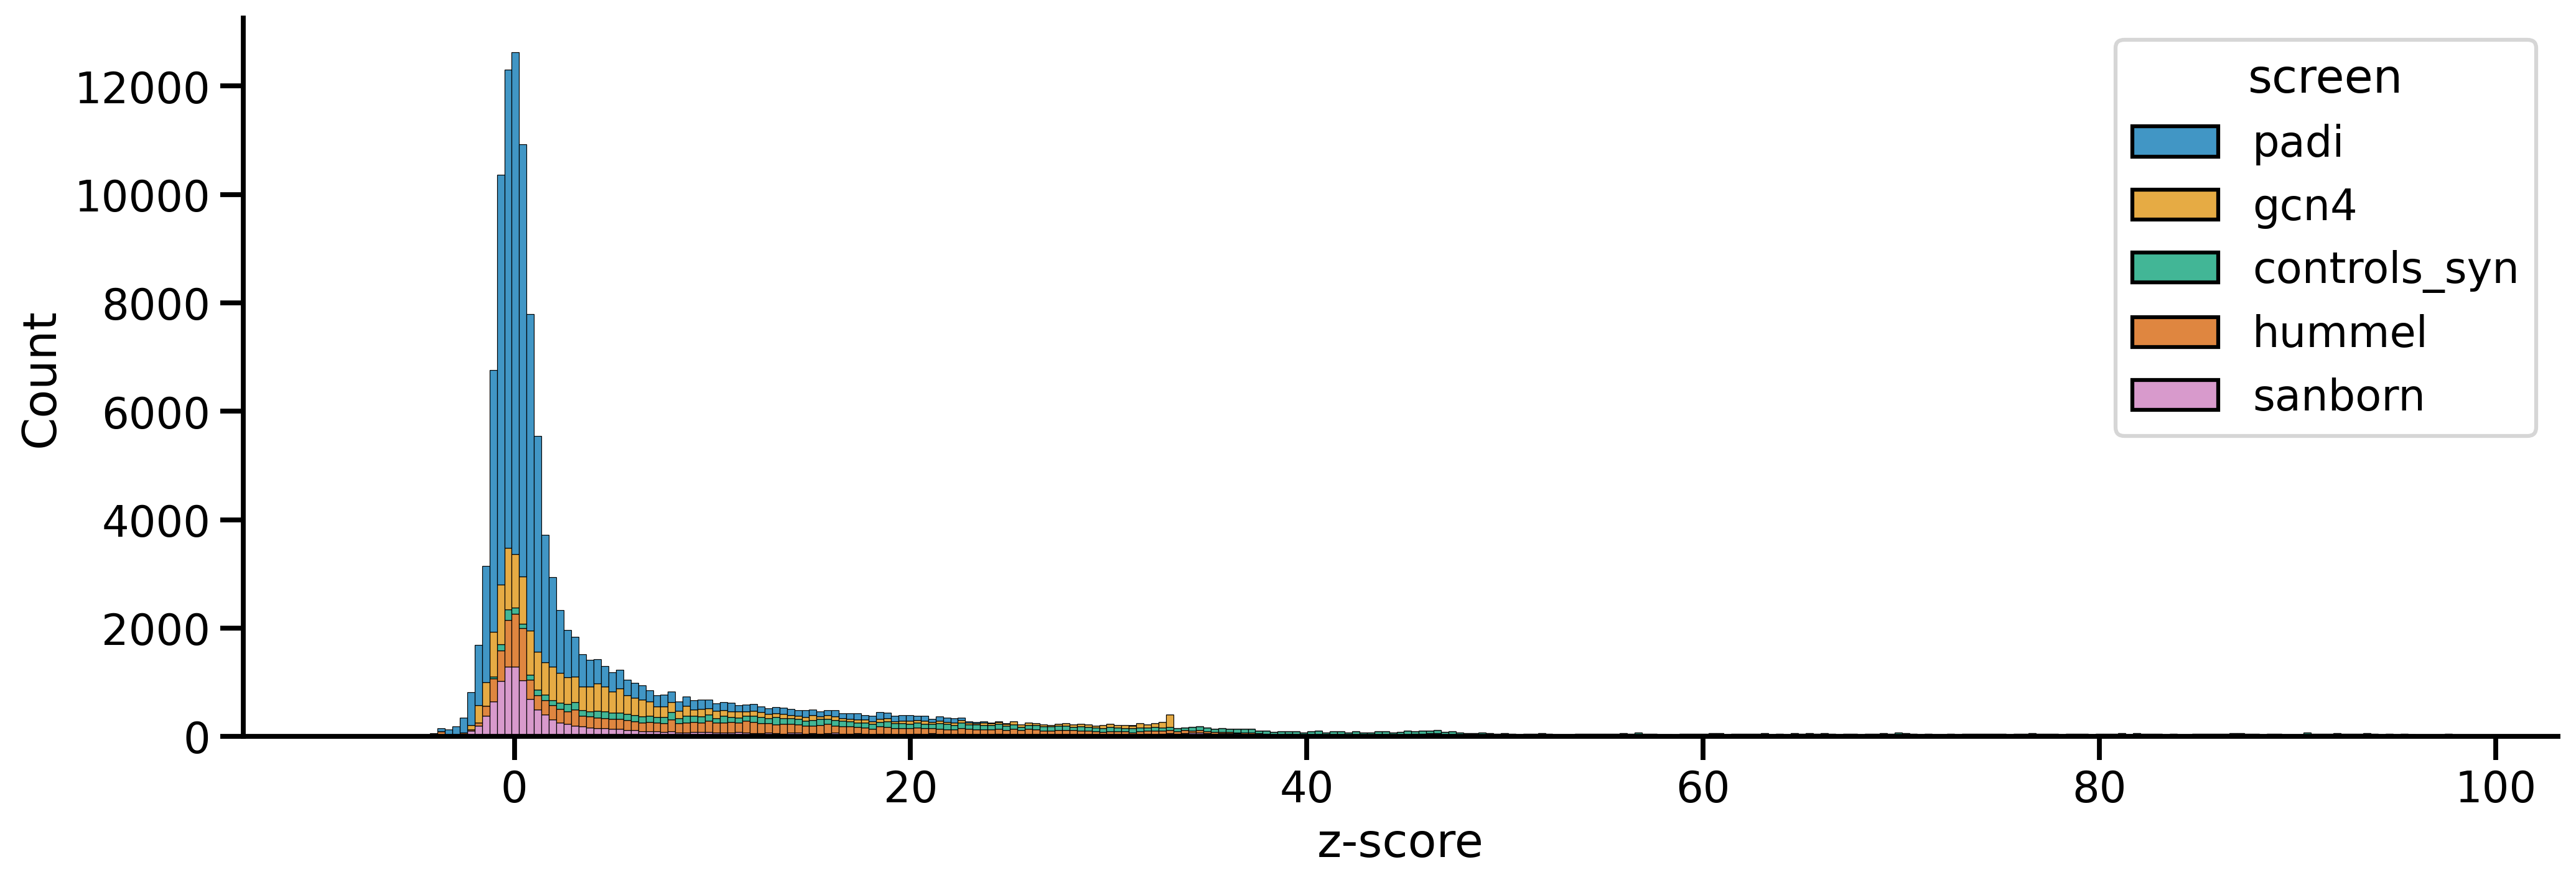

In [ ]:
plt.figure(figsize = (16, 5), dpi = 300)
sns.histplot(data = all_combined, x = "z-score", hue = "screen", multiple = "stack", palette = "colorblind")
sns.despine()

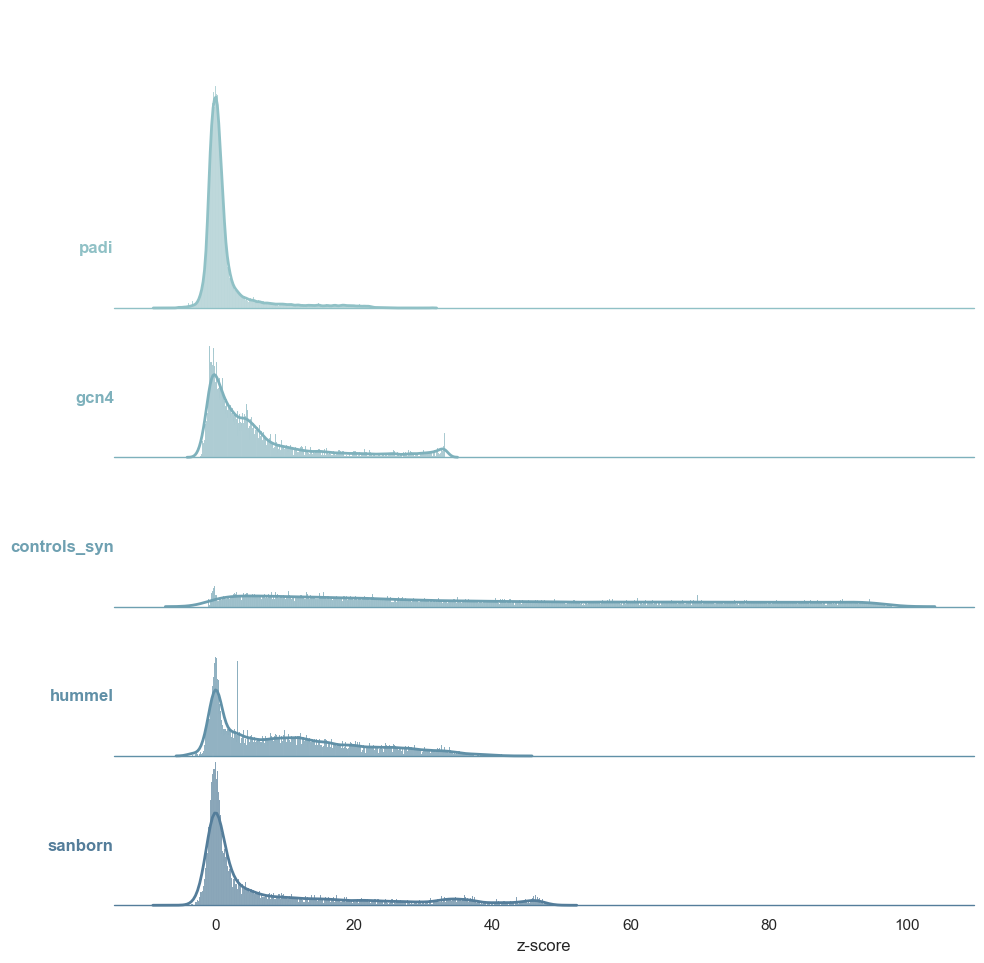

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# # Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(all_combined, row="screen", hue="screen", aspect=5, height=2, palette=pal)

# Draw the densities in a few steps
g.map(sns.histplot, "z-score", bins=1000, stat = 'density')
    #   bw_adjust=.5, clip_on=False,
    #   fill=True, alpha=1, linewidth=0)
g.map(sns.kdeplot, "z-score", clip_on=False, lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=1, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="right", va="center", transform=ax.transAxes)


g.map(label, "z-score")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.5)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)


In [ ]:
lucas = pd.read_csv("../data/lucas_harmonized_dataset.csv")
lucas["seq"] = lucas["AAseq"]
lucas["score"] = lucas["linear_harmonized_activity"]
lucas["screen"] = "lucas"
lucas

dataset   subset                                              AAseq  \
0      Mycocosm     test  KKKKRKKKTPSKGESEEKGDDEDDEDEKKQTPKANTGAKKTKATGK...   
1      Mycocosm     test  KKKRDNRREKPRKSRKGRSDDEIREGEEGESRRRKRKEGGGRARAA...   
2      Mycocosm     test  KKKEEGKKRKRKRGKGRGRREKEERRKRGKEKGRRKERGKGKKKKE...   
3      Mycocosm     test  KKKAAAEEDDEDDDEKVPAKKPAKRGRKKAADDEADEPQPPAKKAK...   
4      Mycocosm     test  KKKSKKRKEKKEKKRRSKSKKKGKKKRRSRSNSGSSSDSSSEDSSS...   
...         ...      ...                                                ...   
25655    Hummel  initial  ILSLVRNSDLEDIISSIQQLEEEYNKNFGYPYTFLNDEEFTDEFKD...   
25656    Hummel  initial  DLWKVAFPVGTEWDQLDALYEFNWDFQNLEEALEEGGKLYGKKVYV...   
25657    Hummel  initial  NDHTHLDSEGIQLIERNVEDYQELLDTNNNVLEDVSIGSILKEVSS...   
25658    Hummel  initial  PQALNLDEFDLEDDTLDMEFDNHTRSEEDITLTDQIPTGIDPYVAV...   
25659    Hummel  initial  PVGTEWDQLDALYEFNWDFQNLEEALEEGGKLYGKKVYVFGCTEPQ...   

       linear_harmonized_activity  linear_harmonized_activity_scaled  \
0                    51493.505796                           0.175769   
1                    32804.881470                           0.102644   
2                    42003.370327                           0.138636   
3                    55762.057591                           0.192471   
4                    50473.592674                           0.171778   
...                           ...                                ...   
25655               138021.960352                           0.514338   
25656               173095.788716                           0.651575   
25657               174087.682873                           0.655457   
25658               191969.000000                           0.725423   
25659               191969.000000                           0.725423   

                                                     seq          score screen  
0      KKKKRKKKTPSKGESEEKGDDEDDEDEKKQTPKANTGAKKTKATGK...   51493.505796  lucas  
1      KKKRDNRREKPRKSRKGRSDDEIREGEEGESRRRKRKEGGGRARAA...   32804.881470  lucas  
2      KKKEEGKKRKRKRGKGRGRREKEERRKRGKEKGRRKERGKGKKKKE...   42003.370327  lucas  
3      KKKAAAEEDDEDDDEKVPAKKPAKRGRKKAADDEADEPQPPAKKAK...   55762.057591  lucas  
4      KKKSKKRKEKKEKKRRSKSKKKGKKKRRSRSNSGSSSDSSSEDSSS...   50473.592674  lucas  
...                                                  ...            ...    ...  
25655  ILSLVRNSDLEDIISSIQQLEEEYNKNFGYPYTFLNDEEFTDEFKD...  138021.960352  lucas  
25656  DLWKVAFPVGTEWDQLDALYEFNWDFQNLEEALEEGGKLYGKKVYV...  173095.788716  lucas  
25657  NDHTHLDSEGIQLIERNVEDYQELLDTNNNVLEDVSIGSILKEVSS...  174087.682873  lucas  
25658  PQALNLDEFDLEDDTLDMEFDNHTRSEEDITLTDQIPTGIDPYVAV...  191969.000000  lucas  
25659  PVGTEWDQLDALYEFNWDFQNLEEALEEGGKLYGKKVYVFGCTEPQ...  191969.000000  lucas  

[25660 rows x 8 columns]

In [ ]:
lucas["dataset"].value_counts()

dataset
Hummel      17533
Mycocosm     7747
Sanborn       380
Name: count, dtype: int64

In [ ]:
lucas[lucas["dataset"] == "Hummel"]

dataset   subset                                              AAseq  \
8127   Hummel  initial  QLFGDVQKVHRFGSDQVYFGGEEDMSSVSNFVDIEWLSSENPCENA...   
8128   Hummel  initial  TECDNEEFLLCNETQAVDLGFETGEEVLVEGKQLLEASDGLATQVL...   
8129   Hummel  initial  LKEEISNVQESKIEQIKAEIQETGHNFAERQDLINELYLEATGDIE...   
8130   Hummel  initial  MGTSEQVEEETKKLKASGCFDRSLHDFDEIQHMDDMFFSILEDVPG...   
8131   Hummel  initial  VMEDEPREATIKPSYWLDACEDISCDLIDDLVSEFDPSSVAVNEST...   
...       ...      ...                                                ...   
25655  Hummel  initial  ILSLVRNSDLEDIISSIQQLEEEYNKNFGYPYTFLNDEEFTDEFKD...   
25656  Hummel  initial  DLWKVAFPVGTEWDQLDALYEFNWDFQNLEEALEEGGKLYGKKVYV...   
25657  Hummel  initial  NDHTHLDSEGIQLIERNVEDYQELLDTNNNVLEDVSIGSILKEVSS...   
25658  Hummel  initial  PQALNLDEFDLEDDTLDMEFDNHTRSEEDITLTDQIPTGIDPYVAV...   
25659  Hummel  initial  PVGTEWDQLDALYEFNWDFQNLEEALEEGGKLYGKKVYVFGCTEPQ...   

       linear_harmonized_activity  linear_harmonized_activity_scaled  \
8127                 92529.828859                           0.336336   
8128                 52081.241616                           0.178069   
8129                 81551.315892                           0.293380   
8130                168393.842186                           0.633178   
8131                 69086.246710                           0.244606   
...                           ...                                ...   
25655               138021.960352                           0.514338   
25656               173095.788716                           0.651575   
25657               174087.682873                           0.655457   
25658               191969.000000                           0.725423   
25659               191969.000000                           0.725423   

                                                     seq          score screen  
8127   QLFGDVQKVHRFGSDQVYFGGEEDMSSVSNFVDIEWLSSENPCENA...   92529.828859  lucas  
8128   TECDNEEFLLCNETQAVDLGFETGEEVLVEGKQLLEASDGLATQVL...   52081.241616  lucas  
8129   LKEEISNVQESKIEQIKAEIQETGHNFAERQDLINELYLEATGDIE...   81551.315892  lucas  
8130   MGTSEQVEEETKKLKASGCFDRSLHDFDEIQHMDDMFFSILEDVPG...  168393.842186  lucas  
8131   VMEDEPREATIKPSYWLDACEDISCDLIDDLVSEFDPSSVAVNEST...   69086.246710  lucas  
...                                                  ...            ...    ...  
25655  ILSLVRNSDLEDIISSIQQLEEEYNKNFGYPYTFLNDEEFTDEFKD...  138021.960352  lucas  
25656  DLWKVAFPVGTEWDQLDALYEFNWDFQNLEEALEEGGKLYGKKVYV...  173095.788716  lucas  
25657  NDHTHLDSEGIQLIERNVEDYQELLDTNNNVLEDVSIGSILKEVSS...  174087.682873  lucas  
25658  PQALNLDEFDLEDDTLDMEFDNHTRSEEDITLTDQIPTGIDPYVAV...  191969.000000  lucas  
25659  PVGTEWDQLDALYEFNWDFQNLEEALEEGGKLYGKKVYVFGCTEPQ...  191969.000000  lucas  

[17533 rows x 8 columns]

Text(0.5, 1.0, 'Mycocosm Subset, Lucas Harmonized Activity')

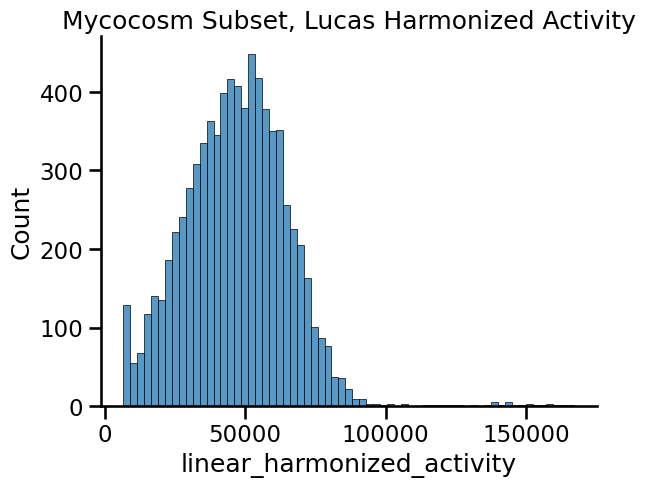

In [ ]:
sns.histplot(lucas[lucas["dataset"] == "Mycocosm"]["linear_harmonized_activity"])
sns.despine()
plt.title("Mycocosm Subset, Lucas Harmonized Activity")

Text(0.5, 1.0, 'Sanborn Subset, Lucas Harmonized Activity')

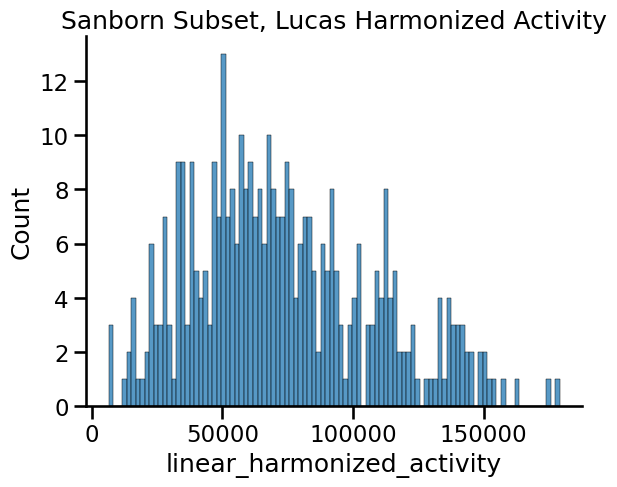

In [ ]:
sns.histplot(lucas[lucas["dataset"] == "Sanborn"]["linear_harmonized_activity"], bins = 100)
sns.despine()
plt.title("Sanborn Subset, Lucas Harmonized Activity")

Text(0.5, 1.0, 'Hummel Subset, Lucas Harmonized Activity')

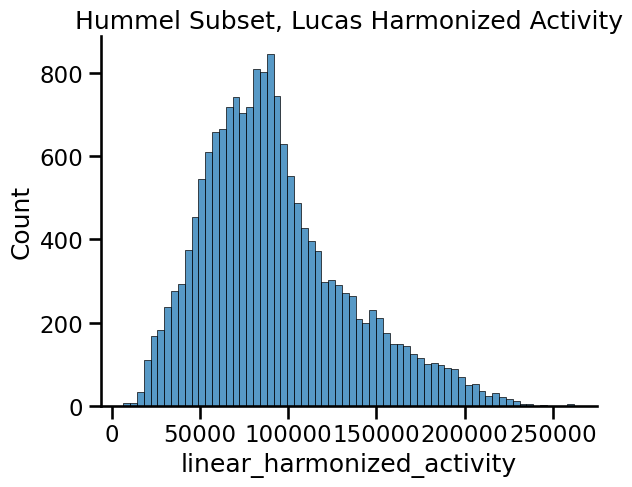

In [ ]:
sns.histplot(lucas[lucas["dataset"] == "Hummel"]["linear_harmonized_activity"])
sns.despine()
plt.title("Hummel Subset, Lucas Harmonized Activity")

In [ ]:
from itertools import combinations

# Create a dictionary of datasets
datasets = {"sanborn": sanborn, "lucas": lucas, "hummel": hummel}

# Generate all combinations of 2 datasets
combos = combinations(datasets.keys(), 2)

# Find overlaps for each combination
overlaps = {}
for combo in combos:
    set1, set2 = combo
    overlap = pd.merge(datasets[set1], datasets[set2], on="seq", suffixes=(f"_{set1}", f"_{set2}"))
    overlaps[combo] = overlap

# Display overlaps as a formatted table with separate columns for combinations
overlap_table = pd.DataFrame([
    {"Dataset 1": combo[0], "Dataset 2": combo[1], "Overlap Count": len(overlap)}
    for combo, overlap in overlaps.items()
])

# Set a multi-index on the overlap table using 'Dataset 1' and 'Dataset 2'
overlap_table = overlap_table.set_index(["Dataset 1", "Dataset 2"])

# Display the table
display(overlap_table)

NameError: name 'sanborn' is not defined

# Tryign sog 1, sort 2 ratio

In [ ]:
sog1_sort2 = pd.read_csv("../data/Sog1_library1_sort2.csv")
sog1_sort2 = sog1_sort2.rename(columns = {"AAseq" : "seq"})
sog1_sort2["seq"] = sog1_sort2["seq"].str.strip().str.upper()
sog1_sort2["screen"] = "sog1_sort2"
sog1_sort2 = sog1_sort2.drop_duplicates(subset = "seq")
sog1_sort2ratio = sog1_sort2.rename(columns = {"Activity_ratio2" : "score"})
sog1_sort2ratio = sog1_sort2ratio[["seq", "score"]]
sog1_sort2ratio

seq          score
0     EDPTWFDSGSQFILNSQQLVEALSLCDDAAGSQDREENTN   37675.082479
1     EALSLCDDLLGDQDREENDNDGDLKDKQPCIADYAHLGPE   41200.368672
2     DLAEDDEVMCMEDEVQSIQPNHERPDDGPELEHGLENGAK   30737.744889
3     GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK   50192.512730
4     SELTSTLGISHRLPQSLTPCVKTGSLQSGGLVQSVPFEEL   60000.227476
...                                        ...            ...
1107  HFNPHTDYFYTFDEYLLSTPPAIFPDLKLTSQEASEVMRS  174246.501323
1108  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGSQDREENTN  243705.211234
1109  EDPTWFDSGDQAIANDQQLVEALSLCDDLLGDQDREENTN  112896.558185
1110  EDPTADAAIQQLWNQGFLFVESLSLCDDLLGAQDREENTN  230752.268974
1111  EDPTWFSLGQVNQADEFIALQALSLCDDLLGAQDREENTN  161014.942320

[1112 rows x 2 columns]

34996.87266031322 7235.940917938821
New threshold:
2.073417612143862


/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_7815/1993253185.py:73: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(x, norm.pdf(x, mu, sigma), 'r-', label=f'Gaussian Fit\nμ={mu:.2f}, σ={sigma:.2f}', color = 'red')


seq          score    z-score
0     EDPTWFDSGSQFILNSQQLVEALSLCDDAAGSQDREENTN   37675.082479   0.370126
1     EALSLCDDLLGDQDREENDNDGDLKDKQPCIADYAHLGPE   41200.368672   0.857317
2     DLAEDDEVMCMEDEVQSIQPNHERPDDGPELEHGLENGAK   30737.744889  -0.588607
3     GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK   50192.512730   2.100023
4     SELTSTLGISHRLPQSLTPCVKTGSLQSGGLVQSVPFEEL   60000.227476   3.455439
...                                        ...            ...        ...
1107  HFNPHTDYFYTFDEYLLSTPPAIFPDLKLTSQEASEVMRS  174246.501323  19.244163
1108  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGSQDREENTN  243705.211234  28.843289
1109  EDPTWFDSGDQAIANDQQLVEALSLCDDLLGDQDREENTN  112896.558185  10.765661
1110  EDPTADAAIQQLWNQGFLFVESLSLCDDLLGAQDREENTN  230752.268974  27.053205
1111  EDPTWFSLGQVNQADEFIALQALSLCDDLLGAQDREENTN  161014.942320  17.415575

[1112 rows x 3 columns]

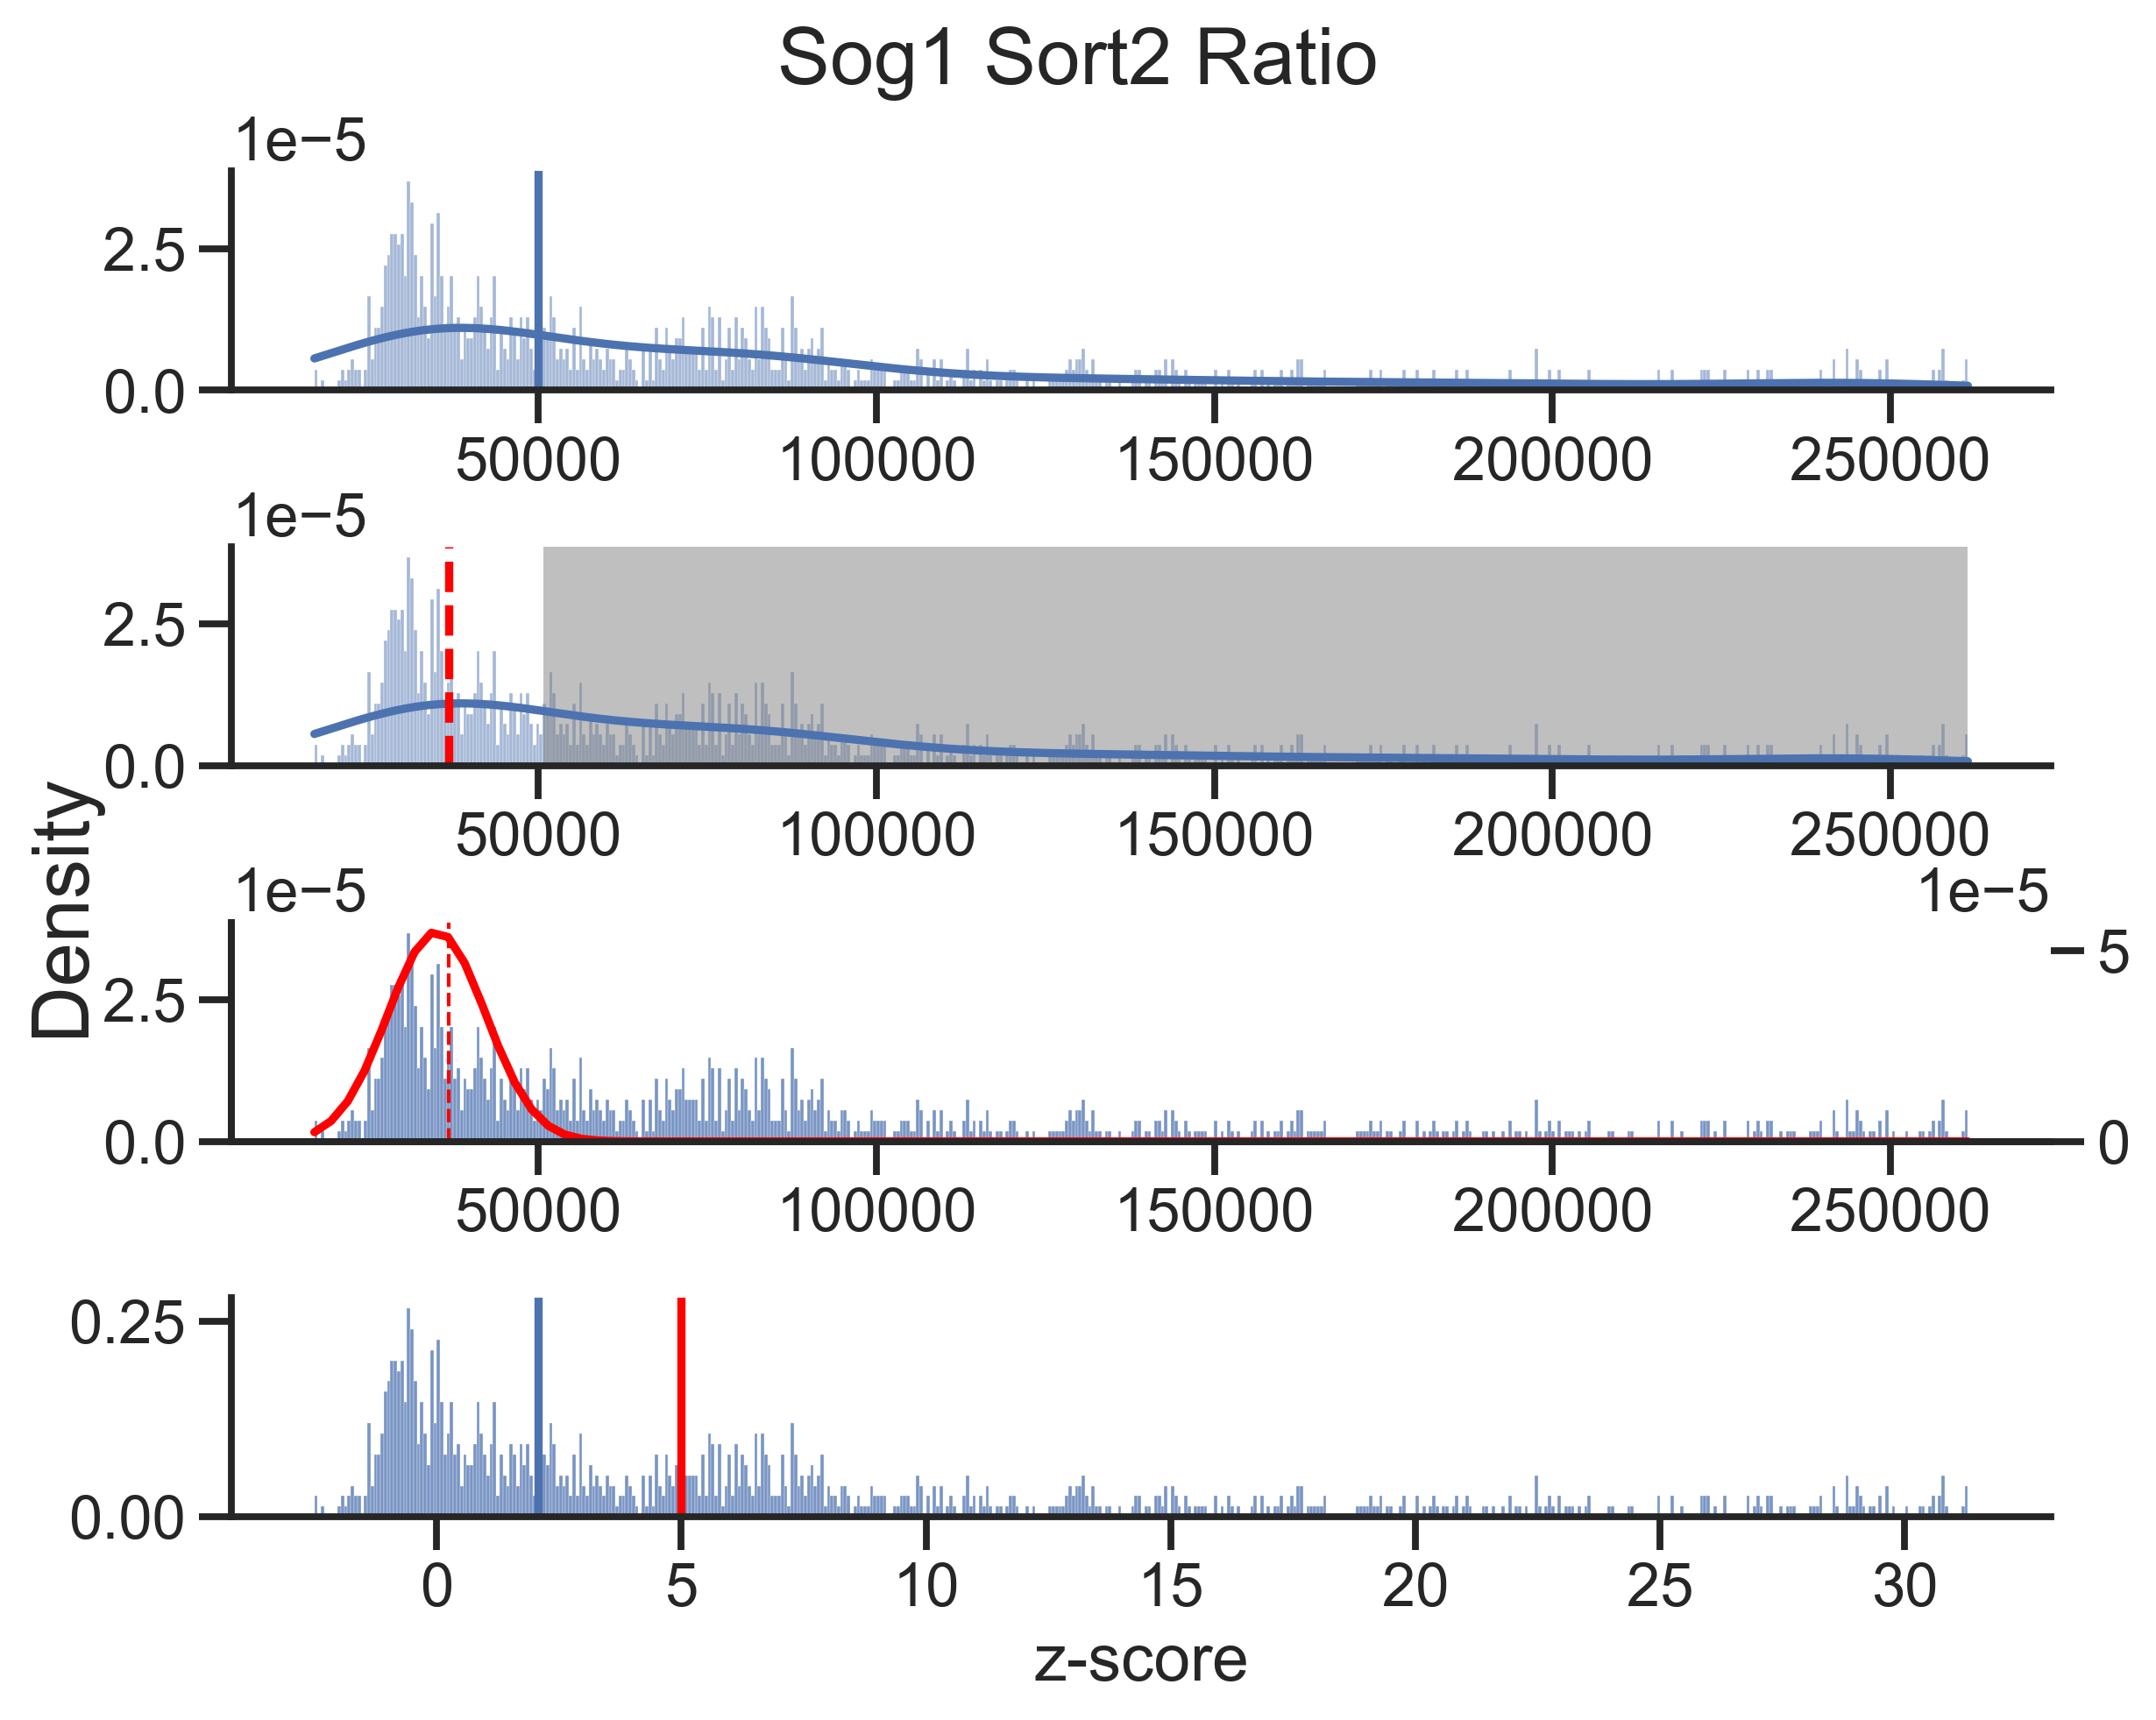

In [ ]:
sog1_sort2ratio, sog1_sort2ratio_threshold = fit_inactive_gaussian_to_all_data(sog1_sort2ratio, active_threshold = 50000, title = "Sog1 Sort2 Ratio")
sog1_sort2ratio

In [ ]:
gcn4_sog1 = pd.merge(gcn4, sog1_sort2ratio, on = "seq", suffixes = ("_gcn4", "_sog1"))
gcn4_sog1

seq    score_gcn4 screen  \
0  STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK  137982.57010   gcn4   
1  STIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPNNNGF  150214.68590   gcn4   
2  STDSTPAAEAENAEDNSKEATSAADNDIPVTTDDVSLADK   18345.73970   gcn4   
3  PSPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI  260331.73400   gcn4   
4  DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP  258453.39020   gcn4   
5  PPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP   16429.97458   gcn4   
6  PPTDVSAGDEAHADGEDVAMAHADAADDFDADMAGDGDSP   17261.58387   gcn4   
7  STDSTPMFEYENLENNSKEWTSLFDNDIPVTTDDVSLADK  122464.99690   gcn4   
8  STDSTPMFEYEGLEDNSKEWTSLFDNDIPVTTDDVSPADK   64997.04148   gcn4   
9  STDSTPMFDYDNLEDNSKDWTSLFDNDIPVTTDDVSLADK  166175.36020   gcn4   

   z-score_gcn4     score_sog1  z-score_sog1  
0     15.931817  178085.368901     19.774691  
1     17.629206  201111.677406     22.956905  
2     -0.669579   27543.557030     -1.030041  
3     32.909591  261419.548044     31.291394  
4     32.648942  254667.274654     30.358236  
5     -0.935420  109363.718111     10.277426  
6     -0.820022   28745.072808     -0.863993  
7     13.778522  162443.439801     17.612992  
8      5.803985  166157.850241     18.126320  
9     19.843988  205281.104307     23.533115

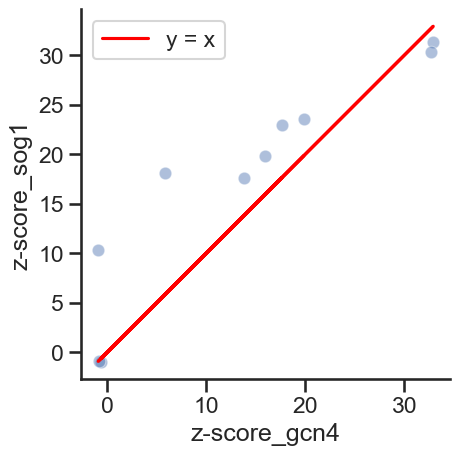

In [ ]:
sns.scatterplot(data = gcn4_sog1, x = "z-score_gcn4", y = "z-score_sog1", alpha = 0.45)
plt.plot(gcn4_sog1["z-score_gcn4"], gcn4_sog1["z-score_gcn4"], color='red', linestyle='solid', label='y = x')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
sns.despine()

In [ ]:
controls_syn_sog1

seq  score_controls_syn        screen  \
0  DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP       158106.387699  controls_syn   
1  PPTDVSAGDEAHADGEDVAMAHADAADDFDADMAGDGDSP         4861.135792  controls_syn   
2  PPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP        15277.058963  controls_syn   
3  PSPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI       220767.013244  controls_syn   
4  STDSTPAAEAENAEDNSKEATSAADNDIPVTTDDVSLADK         4463.296310  controls_syn   
5  STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK        47109.769098  controls_syn   
6  STIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPNNNGF        45422.092004  controls_syn   

   z-score_controls_syn     score_sog1  z-score_sog1  
0             58.054302  254667.274654     53.296873  
1             -0.525794   28745.072808     -0.554397  
2              3.455835  109363.718111     18.662025  
3             82.007184  261419.548044     54.906359  
4             -0.677874   27543.557030     -0.840793  
5             15.624325  178085.368901     35.042656  
6             14.979187  201111.677406     40.531254

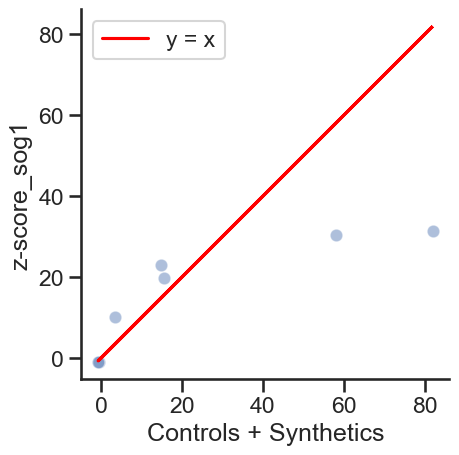

In [ ]:
controls_syn_sog1 = pd.merge(controls_syn, sog1_sort2ratio, on = "seq", suffixes = ("_controls_syn", "_sog1"))
sns.scatterplot(data = controls_syn_sog1, x = "z-score_controls_syn", y = "z-score_sog1", alpha = 0.45)
plt.plot(controls_syn_sog1["z-score_controls_syn"], controls_syn_sog1["z-score_controls_syn"], color='red', linestyle='solid', label='y = x')
plt.legend()
plt.xlabel("Controls + Synthetics")
plt.gca().set_aspect('equal', adjustable='box')
sns.despine()


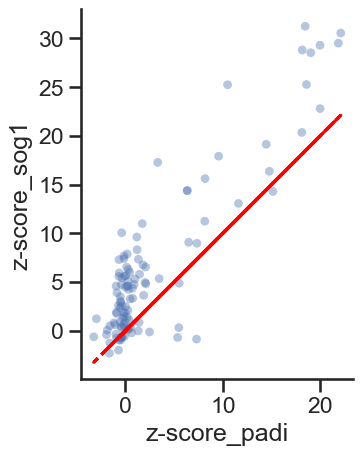

In [ ]:
padi_sog1 = pd.merge(padi, sog1_sort2ratio, on = "seq", suffixes = ("_padi", "_sog1"))
sns.scatterplot(data = padi_sog1, x = "z-score_padi", y = "z-score_sog1", alpha = 0.4, edgecolor = 'none', s =  40)
plt.plot(padi_sog1["z-score_padi"], padi_sog1["z-score_padi"], color='red', linestyle='--', label='y = x')
plt.gca().set_aspect('equal', adjustable='box')
sns.despine()


Text(0.5, 1, 'Scaled Score Comparison')

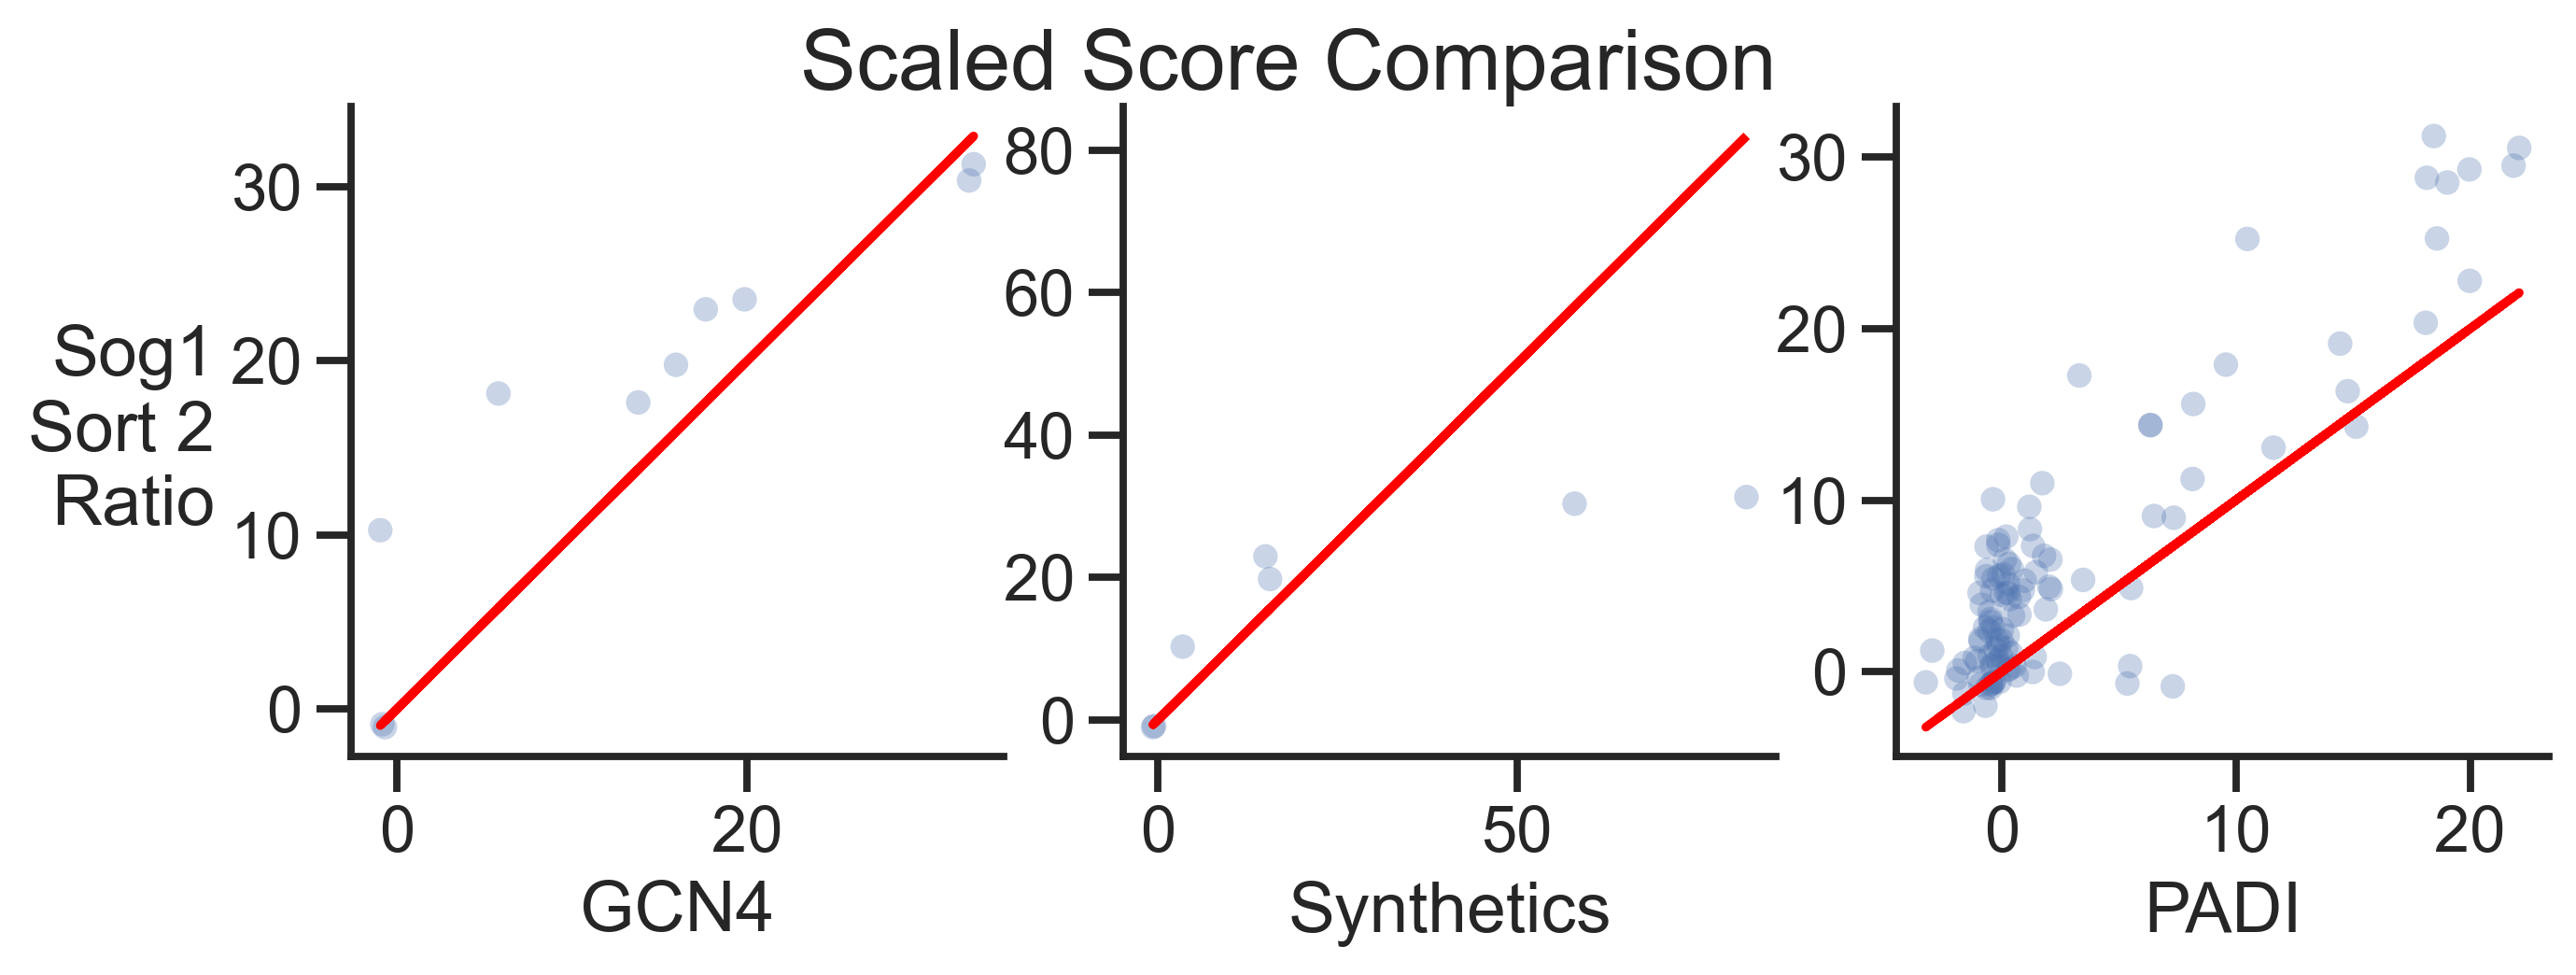

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), dpi=300)

# Plot gcn4_sog1 on the first subplot
sns.scatterplot(data=gcn4_sog1, x="z-score_gcn4", y="z-score_sog1", alpha=0.3, edgecolor='none', s=40, ax=axs[0])
axs[0].plot(gcn4_sog1["z-score_gcn4"], gcn4_sog1["z-score_gcn4"], color='red', linestyle='solid', label='y = x')
sns.despine(ax=axs[0])
axs[0].set_xlabel("GCN4")
axs[0].set_ylabel("Sog1\nSort 2\nRatio", rotation = 0, va = 'center', ha = 'right')

# Plot controls_syn_sog1 on the second subplot
sns.scatterplot(data=controls_syn_sog1, x="z-score_controls_syn", y="z-score_sog1", alpha=0.3, edgecolor='none', s=40, ax=axs[1])
axs[1].plot(controls_syn_sog1["z-score_controls_syn"], controls_syn_sog1["z-score_controls_syn"], color='red', linestyle='solid', label='y = x')
axs[1].set_xlabel("Controls + Synthetics")
sns.despine(ax=axs[1])
axs[1].set_xlabel("Synthetics")
axs[1].set_ylabel("")

# Plot padi_sog1 on the third subplot
sns.scatterplot(data=padi_sog1, x="z-score_padi", y="z-score_sog1", alpha=0.3, edgecolor='none', s=40, ax=axs[2])
axs[2].plot(padi_sog1["z-score_padi"], padi_sog1["z-score_padi"], color='red', linestyle='--', label='y = x')
sns.despine(ax=axs[2])
axs[2].set_xlabel("PADI")
axs[2].set_ylabel("")

fig.tight_layout(pad = 0)
fig.suptitle("Scaled Score Comparison", va = 'bottom', y = 1)

